# Title of Your Group Project

This Python notebook serves as a template for your group project for the course "Modeling in Cognitive Science".

This is the practical part of the group project where you get to implement the computational modeling workflow. In this part, you are expected to:


*   Implement at least two computational models relevant for your hypothesis. *(3 points)*
*   Simulate behavior from the two models. *(3 points)*
*   Implement a procedure for fitting the models to data. *(4 points)*
*   Implement a procedure for parameter recovery. *(5 points)*
*   (Implement a procedure for model recovery.) *(optional; 2 bonus points)*
*   Implement a model comparison. *(5 points)*.

You can gain a total of 20 points for the practical part of the group project.

**Note:** *Some of the exercises below (e.g. Model Simulation) rely on code from previous exercises (e.g., Model Implementation). In such cases, you are encouraged to rely on functions implemented for previous exercises. That is, you don't have to produce redundant code.*



## Model Implementation *(3 points)*

For this exercise you should:

*   Implement and simulate data from two* models that are suitable to test your hypothesis. *(3 points)*

<font size=2>*You may implement more than two models if you wish. However, two models are sufficient for this group project.</font>

Make sure to comment your code and provide an explanation for each code block in a preceding text block.


In [16]:
from simulate import simulate
from behavioral_analysis import calc_plot_stay_probabilities,\
    calc_plot_stay_probabilities_moving_average, calc_plot_stay_probabilities_blocks,\
    calc_plot_running_stay_probabilities, calc_plot_stay_probability_paired_diffs,\
        calc_plot_running_average_cumulative_reward, print_simple_task_summary
from utils import save_simulated_data

In [17]:
# simulate models with default parameters
seed = 0
task_df_mf , agent_mf= simulate(agent_type='model_free', seed=seed)
task_df_mb , agent_mb= simulate(agent_type='model_based', seed=seed)
task_df_hybrid , agent_hybrid= simulate(agent_type='hybrid', seed=seed)
task_df_hybrid_mf , agent_hybrid_mf= simulate(agent_type='hybrid', seed=seed, params={'w':0.0}) # special case of pure model-free from hybrid
task_df_hybrid_mb , agent_hybrid_mb= simulate(agent_type='hybrid', seed=seed, params={'w':1.0}) # special case of pure model-based from hybrid

In [18]:
# # save simulated data
# save_simulated_data(task_df_mf, agent_type='model_free')
# save_simulated_data(task_df_mb, agent_type='model_based')
# save_simulated_data(task_df_hybrid, agent_type='hybrid')
# save_simulated_data(task_df_hybrid_mf, agent_type='hybrid_mf')
# save_simulated_data(task_df_hybrid_mb, agent_type='hybrid_mb')

In [19]:

# print q table and transition matrix
print("q_table model based:\n", agent_mb.q_table)
print("q_table hybrid:\n", agent_hybrid.q_table)
print("q_table hybrid mf:\n", agent_hybrid_mf.q_table)
print("q_table hybrid mb:\n", agent_hybrid_mb.q_table)

if hasattr(agent_mb, 'transition_model'):
    print("transition_matrix model based:\n", agent_mb.transition_model[0])
if hasattr(agent_hybrid, 'transition_model'):
    print("transition_matrix hybrid:\n", agent_hybrid.transition_model[0])
if hasattr(agent_hybrid_mf, 'transition_model'):
    print("transition_matrix hybrid mf:\n", agent_hybrid_mf.transition_model[0], 'NOT USED IN BELIEF UPDATE!')
if hasattr(agent_hybrid_mb, 'transition_model'):
    print("transition_matrix hybrid mb:\n", agent_hybrid_mb.transition_model[0])

# print some summary statistics about the task
full = False
print_simple_task_summary(task_df_mf, title='model_free', full=full)
print_simple_task_summary(task_df_mb, title='model_based', full=full)
print_simple_task_summary(task_df_hybrid, title='hybrid', full=full)
print_simple_task_summary(task_df_hybrid_mf, title='hybrid_mf', full=full)
print_simple_task_summary(task_df_hybrid_mb, title='hybrid_mb', full=full)

q_table model based:
 [[0.51209287 0.46954224]
 [0.64127226 0.57287122]
 [0.46909978 0.48409035]]
q_table hybrid:
 [[0.62297813 0.58984856]
 [0.62589829 0.5813574 ]
 [0.64796417 0.54779762]]
q_table hybrid mf:
 [[0.65656251 0.55910905]
 [0.62589829 0.5813574 ]
 [0.64796417 0.54779762]]
q_table hybrid mb:
 [[0.60774517 0.61396384]
 [0.62589829 0.5813574 ]
 [0.64796417 0.54779762]]
transition_matrix model based:
 [[0.  0.7 0.3]
 [0.  0.3 0.7]]
transition_matrix hybrid:
 [[0.  0.7 0.3]
 [0.  0.3 0.7]]
transition_matrix hybrid mf:
 [[0.  0.7 0.3]
 [0.  0.3 0.7]] NOT USED IN BELIEF UPDATE!
transition_matrix hybrid mb:
 [[0.  0.7 0.3]
 [0.  0.3 0.7]]
### model_free
common transitions percentage: 69.0 %
rewarded trails percentage: 56.00000000000001 %
### model_based
common transitions percentage: 74.0 %
rewarded trails percentage: 50.5 %
### hybrid
common transitions percentage: 74.5 %
rewarded trails percentage: 52.5 %
### hybrid_mf
common transitions percentage: 74.0 %
rewarded trails perce

In [20]:
task_dfs = [task_df_mf, task_df_mb, task_df_hybrid, task_df_hybrid_mf, task_df_hybrid_mb]
model_names = ['model_free', 'model_based', 'hybrid', 'hybrid_mf', 'hybrid_mb']

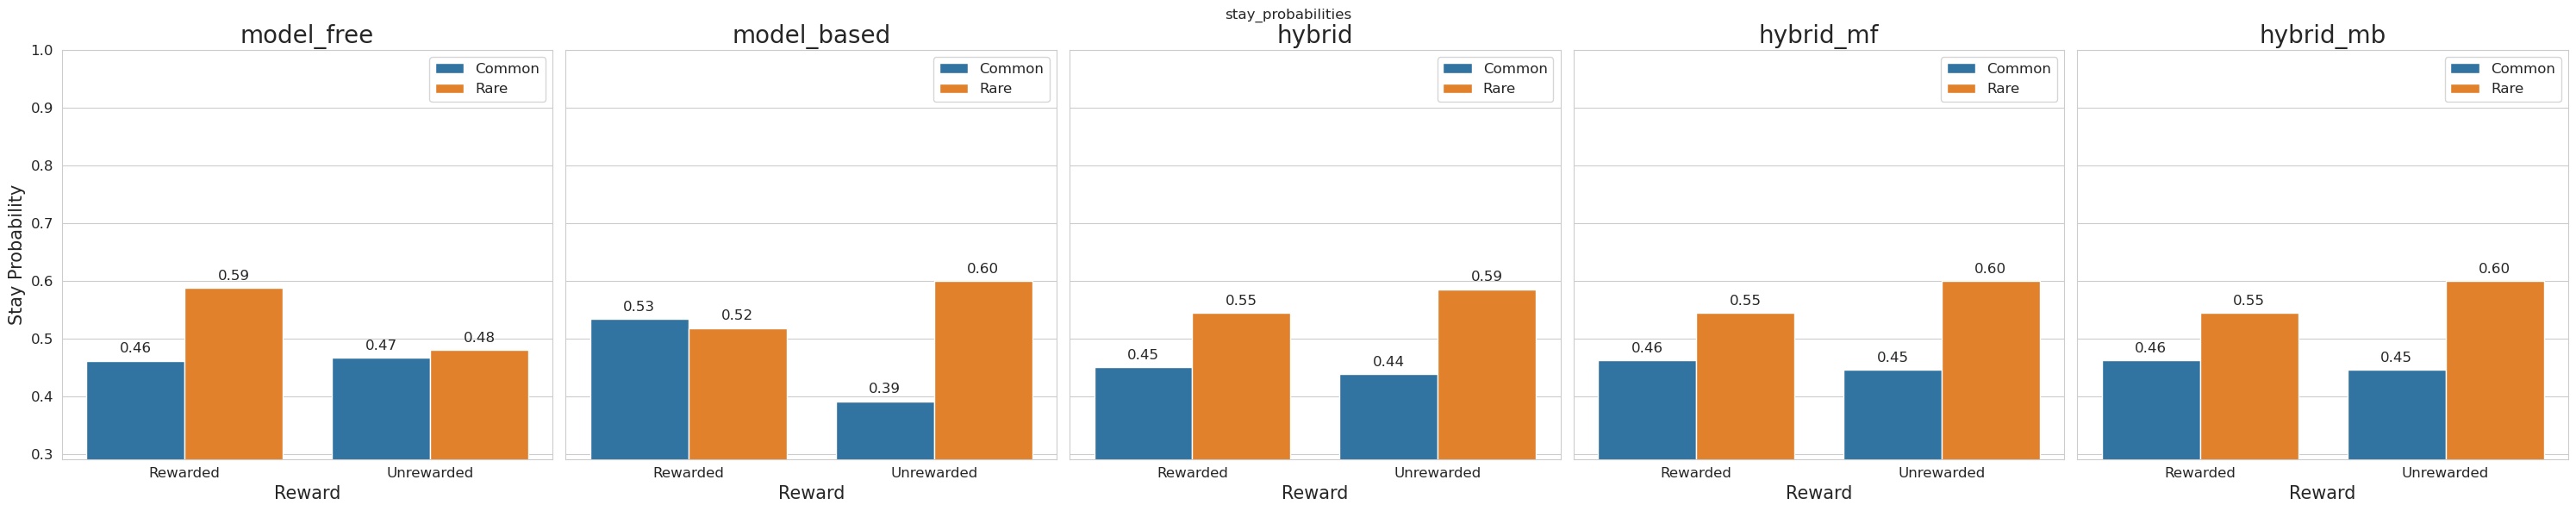

In [21]:
# plot stay probabilities
stay_probabilities = calc_plot_stay_probabilities(dfs=task_dfs, labels=model_names, title='stay_probabilities', max_plots_per_row=5)

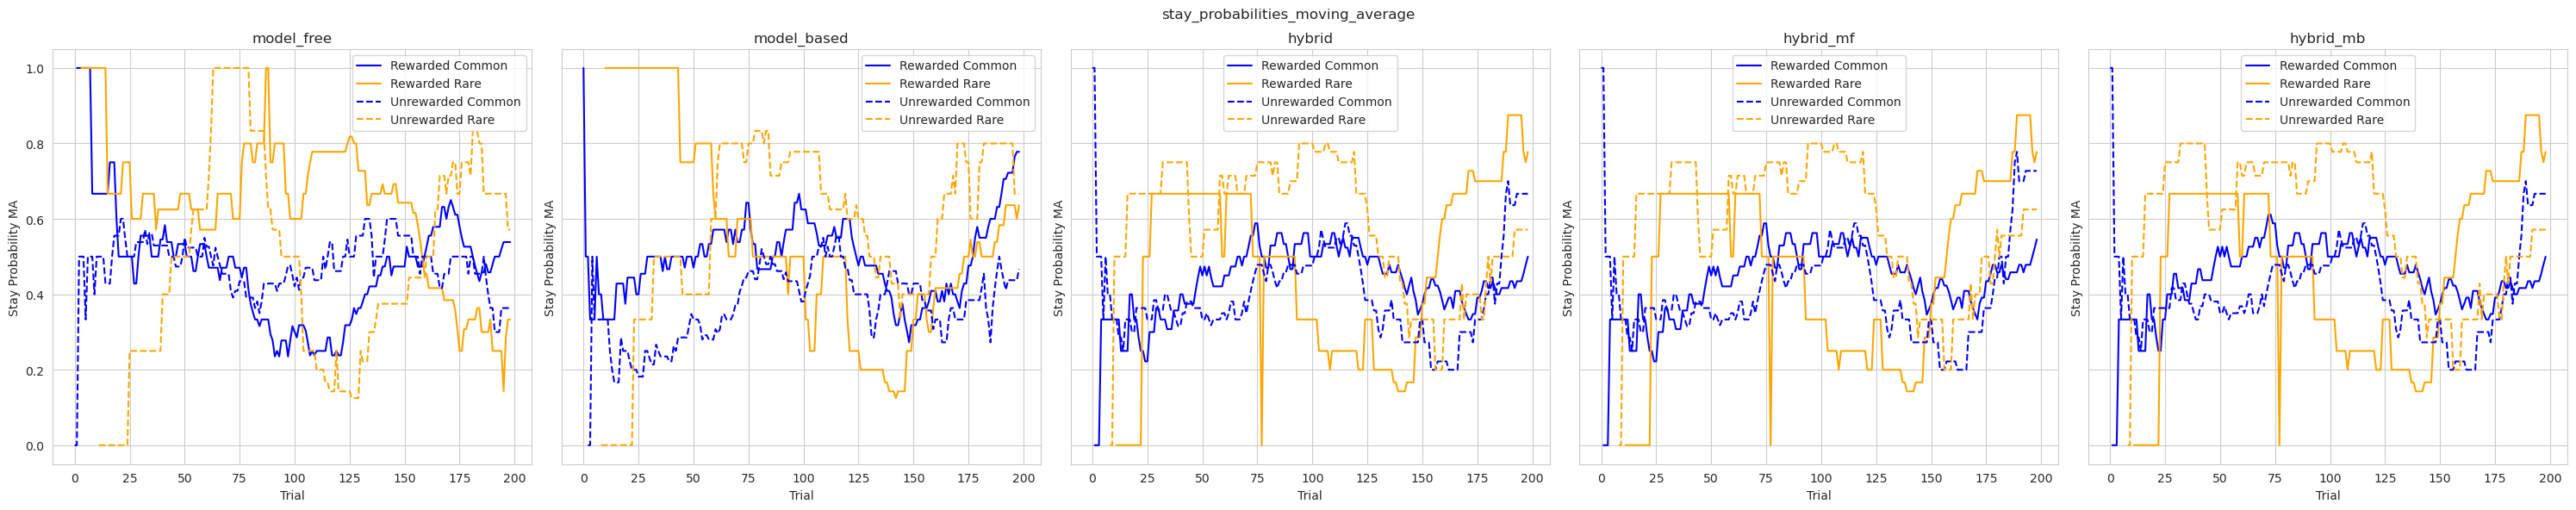

In [22]:
# plot stay probabilities with moving average
window_size = 50
stay_probabilities_moving_average = calc_plot_stay_probabilities_moving_average(dfs=task_dfs, labels=model_names,
                                                                                title='stay_probabilities_moving_average',
                                                                                window_size=window_size, max_plots_per_row=5)

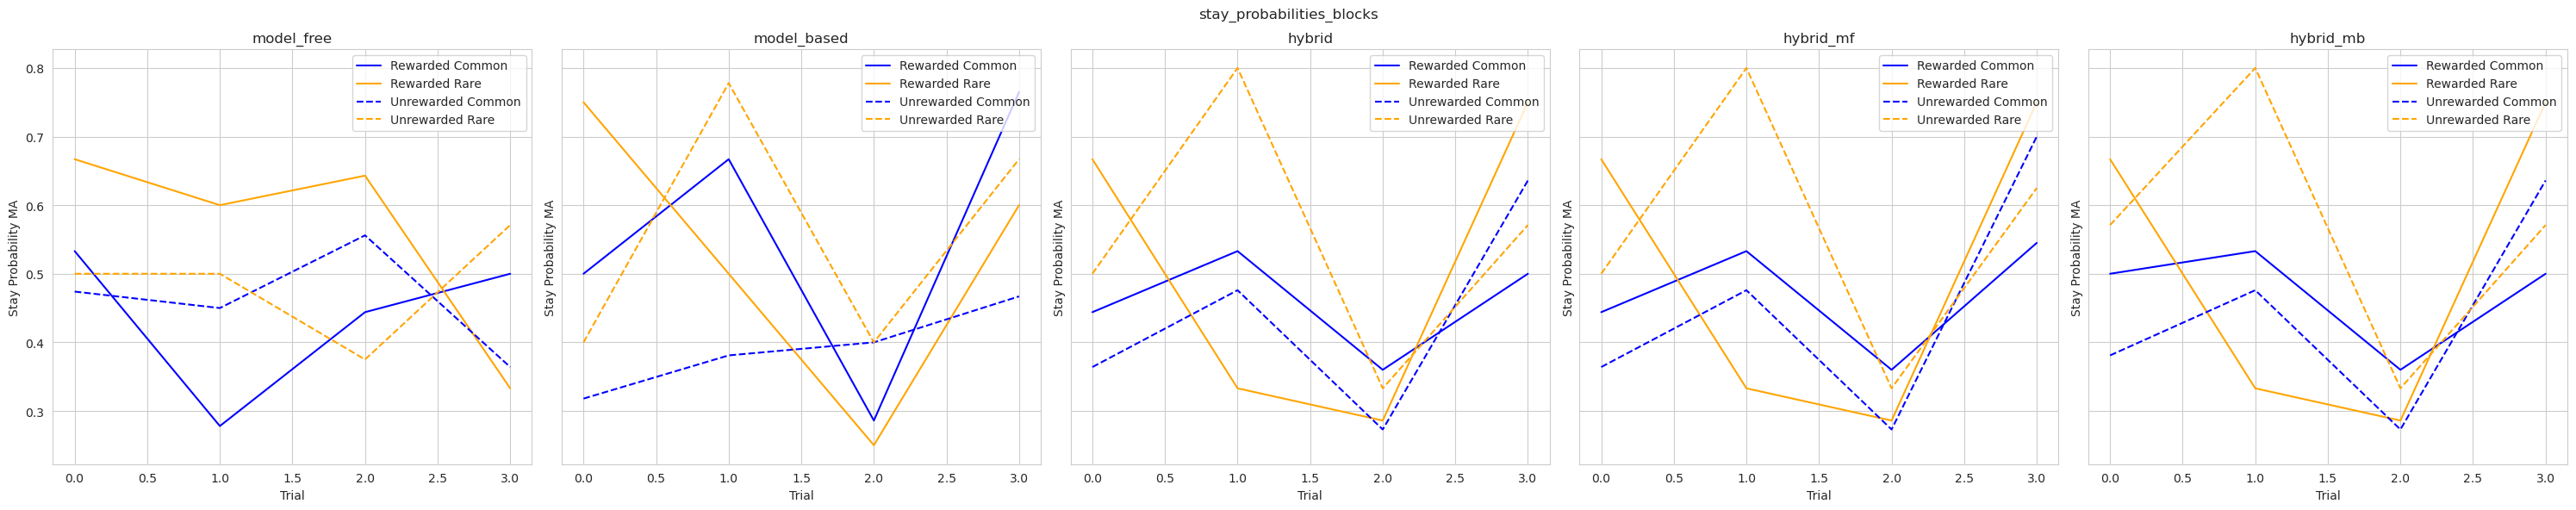

In [23]:
# plot stay probabilities in blocks
num_blocks = 4
stay_probabilities_blocks = calc_plot_stay_probabilities_blocks(dfs=task_dfs, labels=model_names, title='stay_probabilities_blocks',
                                                               num_blocks=num_blocks, max_plots_per_row=5)

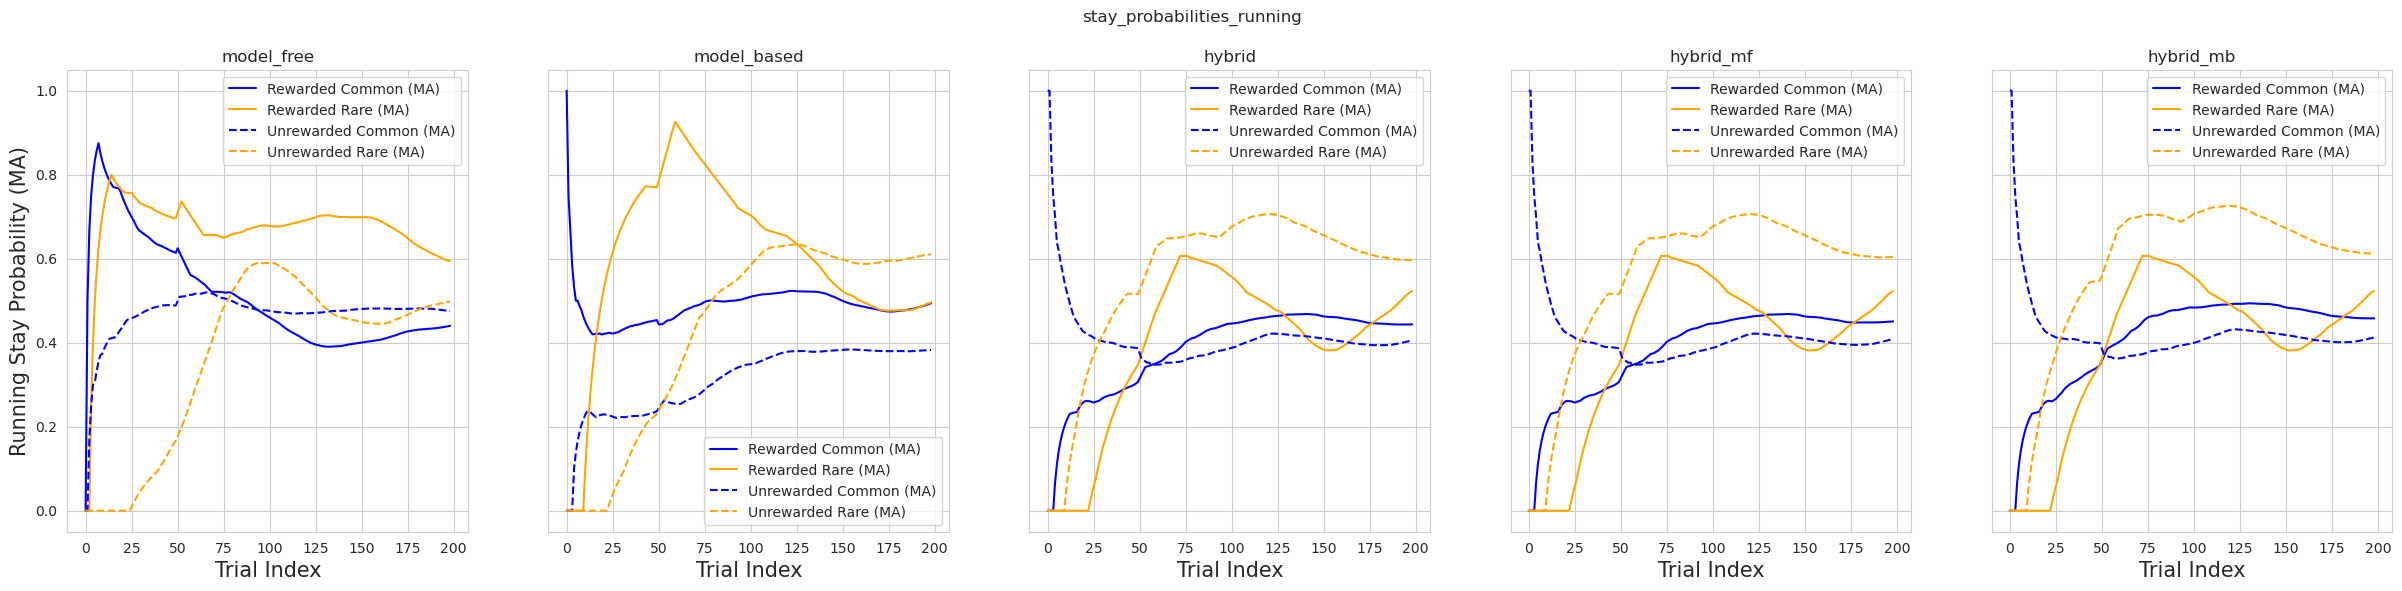

In [24]:
# plot running stay probabilities
window_size = 50
stay_probabilities_smoothed_ma = calc_plot_running_stay_probabilities(dfs=task_dfs, labels=model_names, title='stay_probabilities_running',
                                                                    window_size=window_size, max_plots_per_row=5)

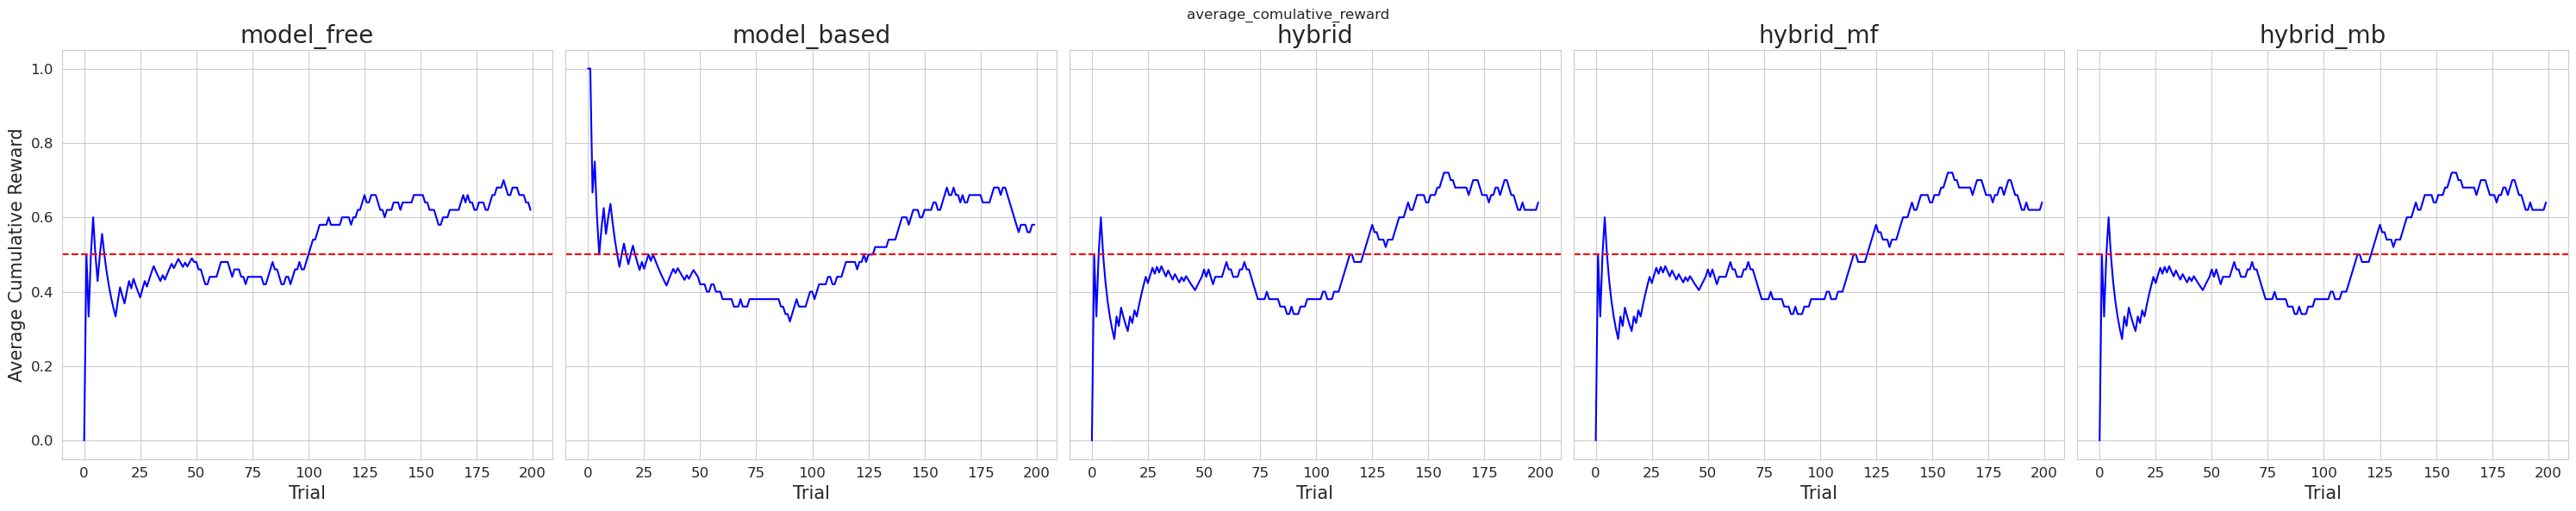

In [25]:
# plot the average comulative reward
window_size = 50
average_comulative_rewards = calc_plot_running_average_cumulative_reward(dfs=task_dfs, labels=model_names, title='average_comulative_reward',
                                                                        window_size=window_size, max_plots_per_row=5)

## Model Simulation *(3 points)*

For this exercise you should:

*   Simulate data from both models for a single set of parameters. The simulation should mimic the experiment you are trying to model. *(2 points)*

*   Plot the simulated behavior of both models. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.


In [26]:
from simulate import simulate
from behavioral_analysis import calc_plot_stay_probabilities,\
    calc_plot_stay_probabilities_moving_average, calc_plot_stay_probabilities_blocks,\
    calc_plot_running_stay_probabilities, calc_plot_stay_probability_paired_diffs,\
        calc_plot_running_average_cumulative_reward, print_simple_task_summary
from utils import preprocess_human_data ,save_simulated_data
import pandas as pd
import os

In [27]:
# parameters
SEED = 0
params_model_free = {'alpha': 0.3,
                      'beta': 5}
params_model_based = {'alpha': 0.2,
                      'beta': 4}
params_hybrid = {'alpha_1': 0.4,
                 'alpha_2': 0.2,
                 'beta_1': 6,
                 'beta_2': 3,
                 '_lambda': 0.5,
                 'w': 0.5,
                 'p': 0.02}
params_hybrid_mf = {'alpha_1': 0.3,
                    'alpha_2': 0.5,
                    'beta_1': 5,
                    'beta_2': 3,
                    '_lambda': 0.7,
                    'w': 0.0,
                    'p': -0.1}
params_hybrid_mb = {'alpha_1': 0.1, # arbitrary value in case of pure model based
                    'alpha_2': 0.3,
                    'beta_1': 3,
                    'beta_2': 5,
                    '_lambda': 0.5, # arbitrary value in case of pure model based
                    'w': 1.0,
                    'p': 0.1}

In [28]:
# load and inspect human data
group = 'group_01'
particepant_data_file = "experiment_data_1.csv"
file_name = os.path.join("data", "participants", group, particepant_data_file)
particepant_data = pd.read_csv(file_name)
# preprocess human data
particepant_data = preprocess_human_data(particepant_data)

# Run simulation and save to csv
task_df_mf, agent_mf = simulate(agent_type='model_free', params=params_model_free, seed=SEED, from_data=particepant_data, use_reward_distribution=True)
task_df_mb, agent_mb = simulate(agent_type='model_based', params=params_model_based, seed=SEED, from_data=particepant_data, use_reward_distribution=True)
task_df_hybrid, agent_hybrid = simulate(agent_type='hybrid', params=params_hybrid, seed=SEED, from_data=particepant_data, use_reward_distribution=True)
task_df_hybrid_mf, agent_hybrid_mf = simulate(agent_type='hybrid', params=params_hybrid_mf, seed=SEED, from_data=particepant_data, use_reward_distribution=True)
task_df_hybrid_mb, agent_hybrid_mb = simulate(agent_type='hybrid', params=params_hybrid_mb, seed=SEED, from_data=particepant_data, use_reward_distribution=True)
# save_simulated_data(task_df_mf, agent_type='model_free')
# save_simulated_data(task_df_mb, agent_type='model_based')
# save_simulated_data(task_df_hybrid, agent_type='hybrid')
# save_simulated_data(task_df_hybrid_mf, agent_type='hybrid_mf')
# save_simulated_data(task_df_hybrid_mb, agent_type='hybrid_mb')

In [29]:
task_dfs = [task_df_mf, task_df_mb, task_df_hybrid, task_df_hybrid_mf, task_df_hybrid_mb, particepant_data]
model_names = ['model_free', 'model_based', 'hybrid', 'hybrid_mf', 'hybrid_mb', 'particepant']

In [30]:
# print some statistics about the task
for task_df, model_name in zip(task_dfs, model_names):
    print_simple_task_summary(task_df, title=model_name)

### model_free
common transitions percentage: 69.0 %
rewarded trails percentage: 51.0 %
### model_based
common transitions percentage: 72.5 %
rewarded trails percentage: 57.99999999999999 %
### hybrid
common transitions percentage: 70.5 %
rewarded trails percentage: 52.0 %
### hybrid_mf
common transitions percentage: 73.0 %
rewarded trails percentage: 53.0 %
### hybrid_mb
common transitions percentage: 72.0 %
rewarded trails percentage: 53.5 %
### particepant
common transitions percentage: 70.5 %
rewarded trails percentage: 56.99999999999999 %


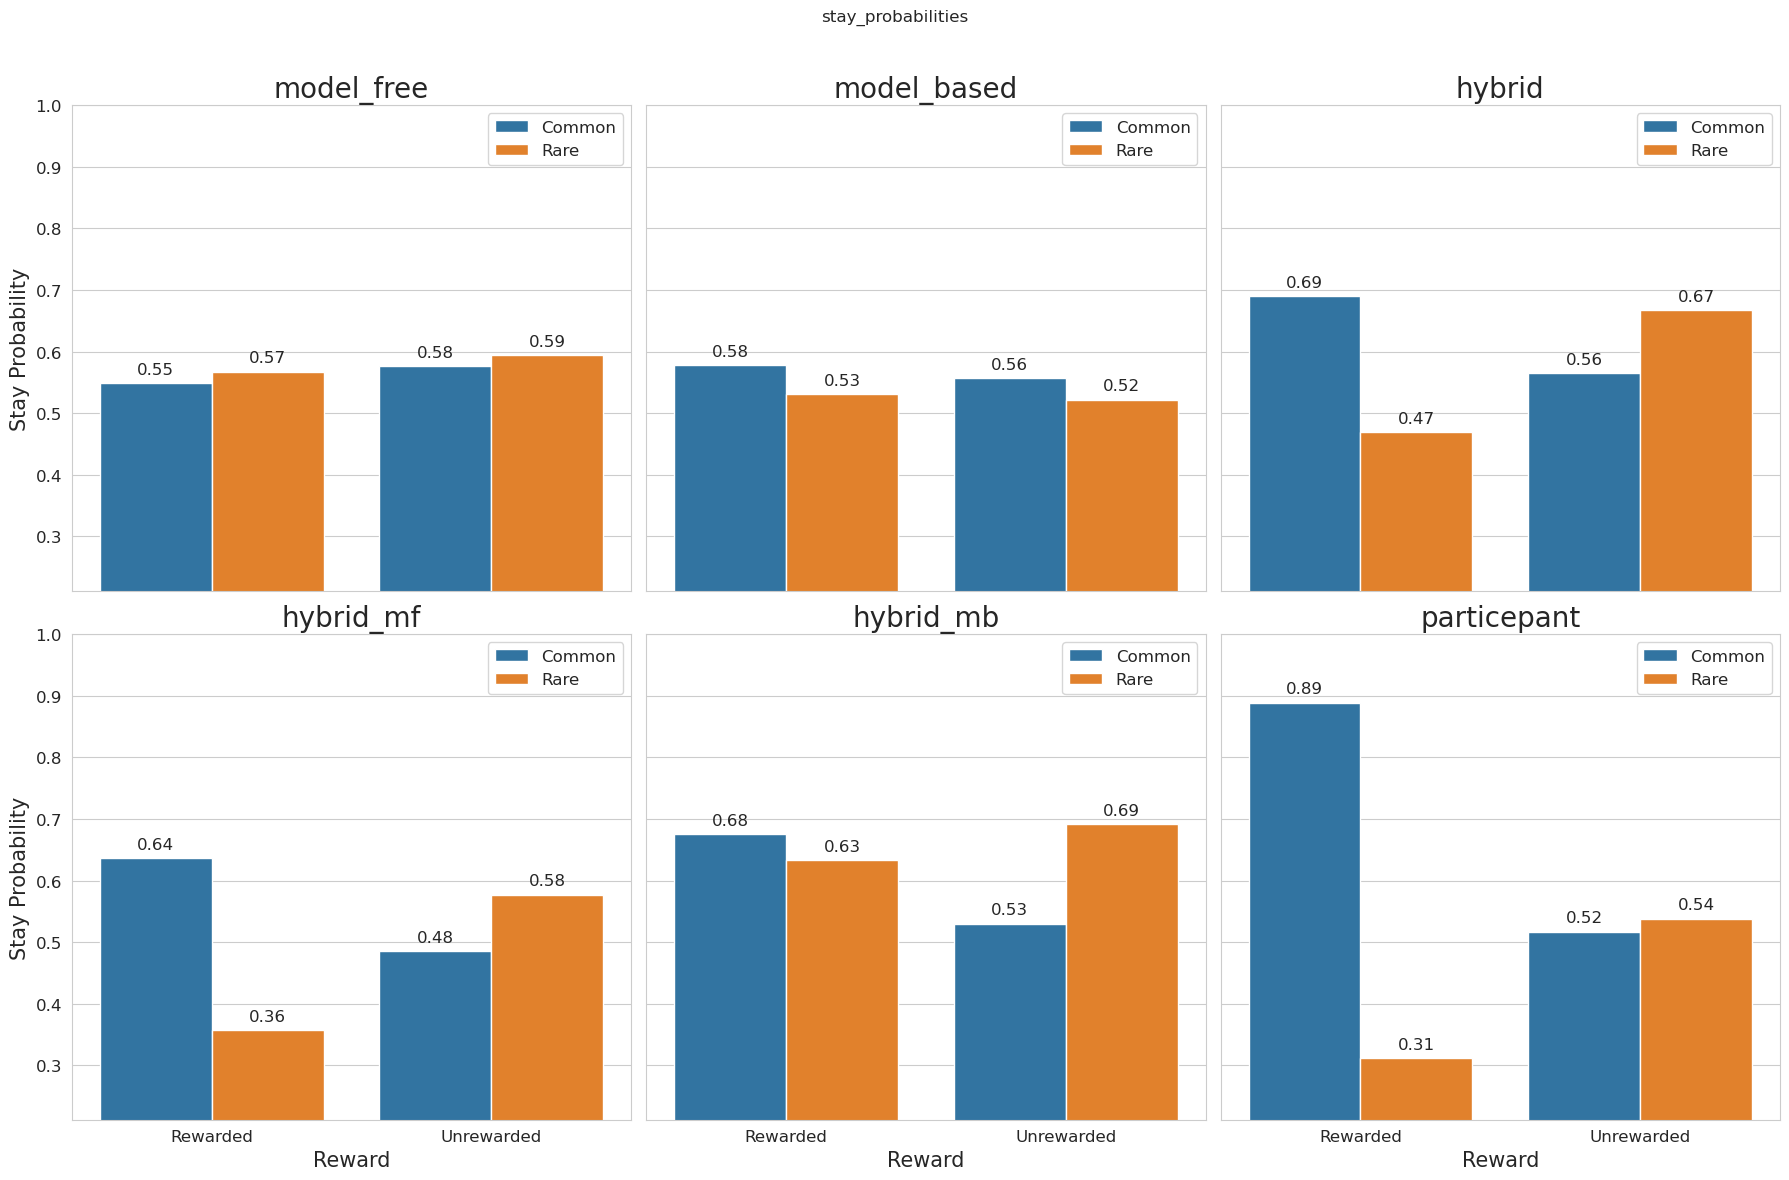

In [31]:
# plot stay probabilities
stay_probabilities = calc_plot_stay_probabilities(dfs=task_dfs, labels=model_names, title='stay_probabilities', max_plots_per_row=3)

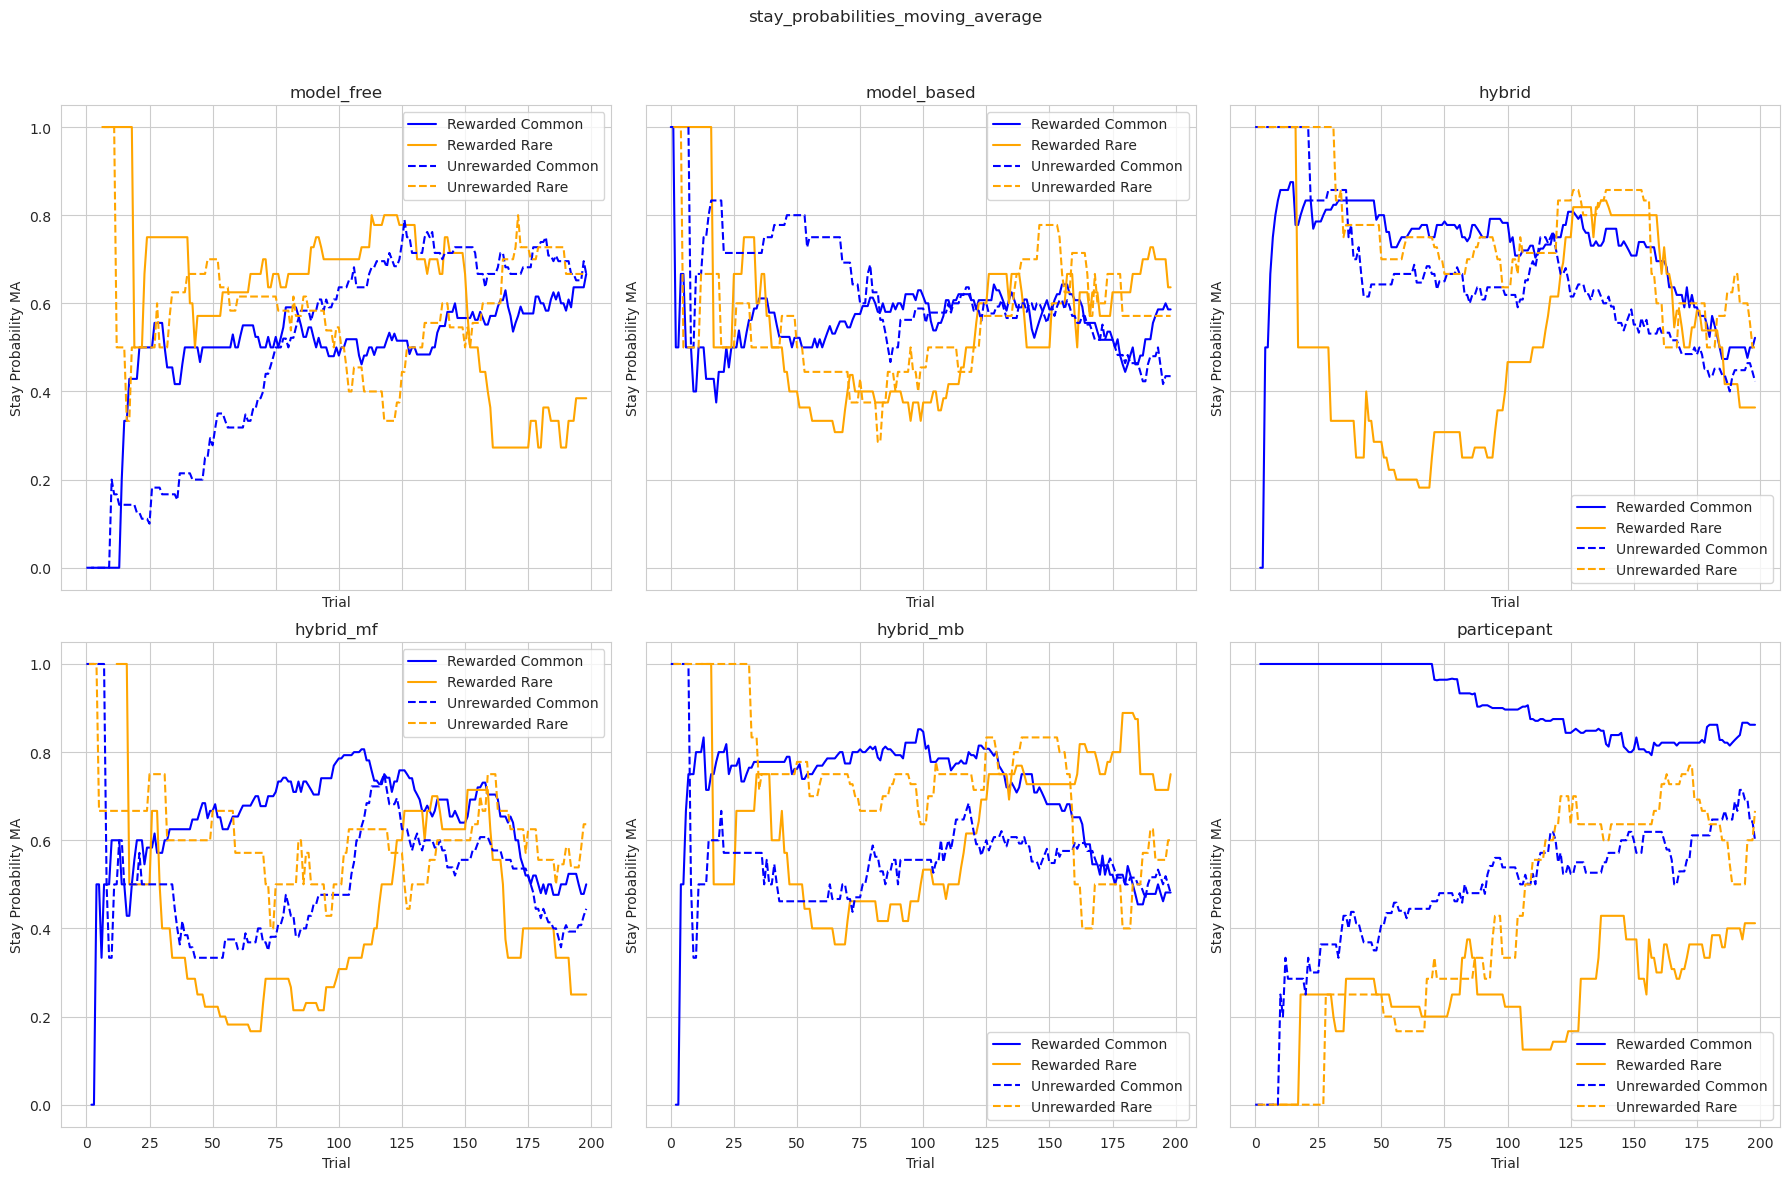

In [32]:
# plot stay probabilities with moving average
window_size = 70
stay_probabilities_moving_average = calc_plot_stay_probabilities_moving_average(dfs=task_dfs, labels=model_names,
                                                                                title='stay_probabilities_moving_average',
                                                                                window_size=window_size, max_plots_per_row=3)

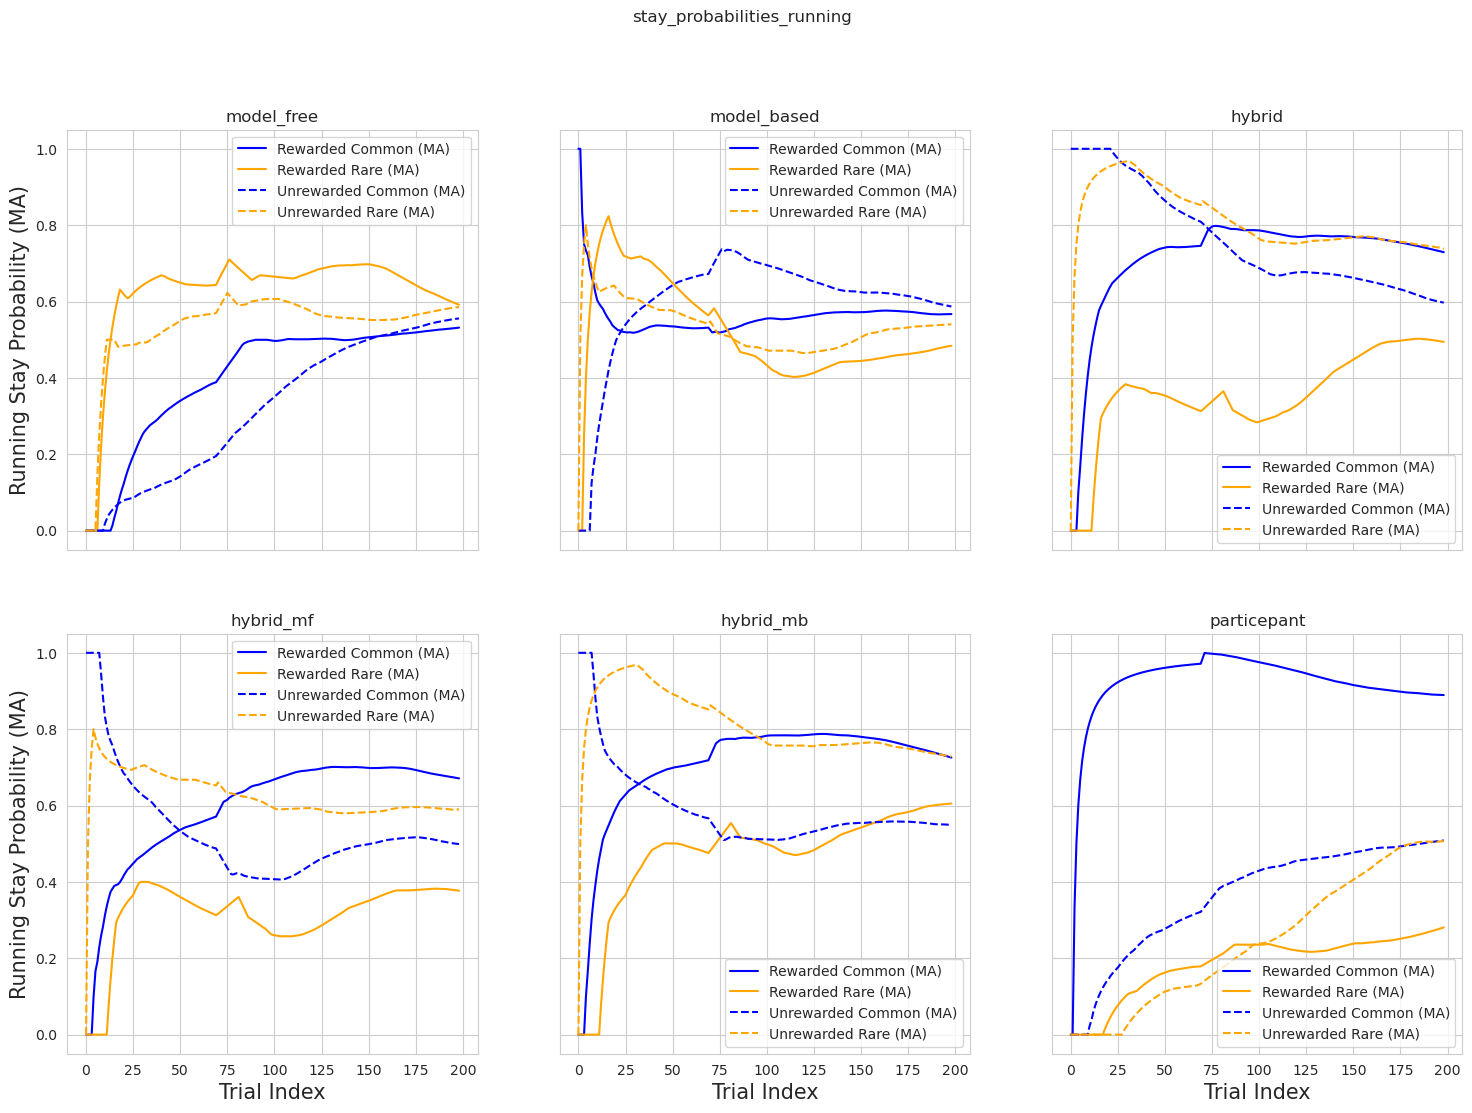

In [33]:
# plot stay probabilities smoothed moving average
window_size = 70
stay_probabilities_smoothed_ma = calc_plot_running_stay_probabilities(dfs=task_dfs, labels=model_names, title='stay_probabilities_running',
                                                                    window_size=window_size, max_plots_per_row=3)


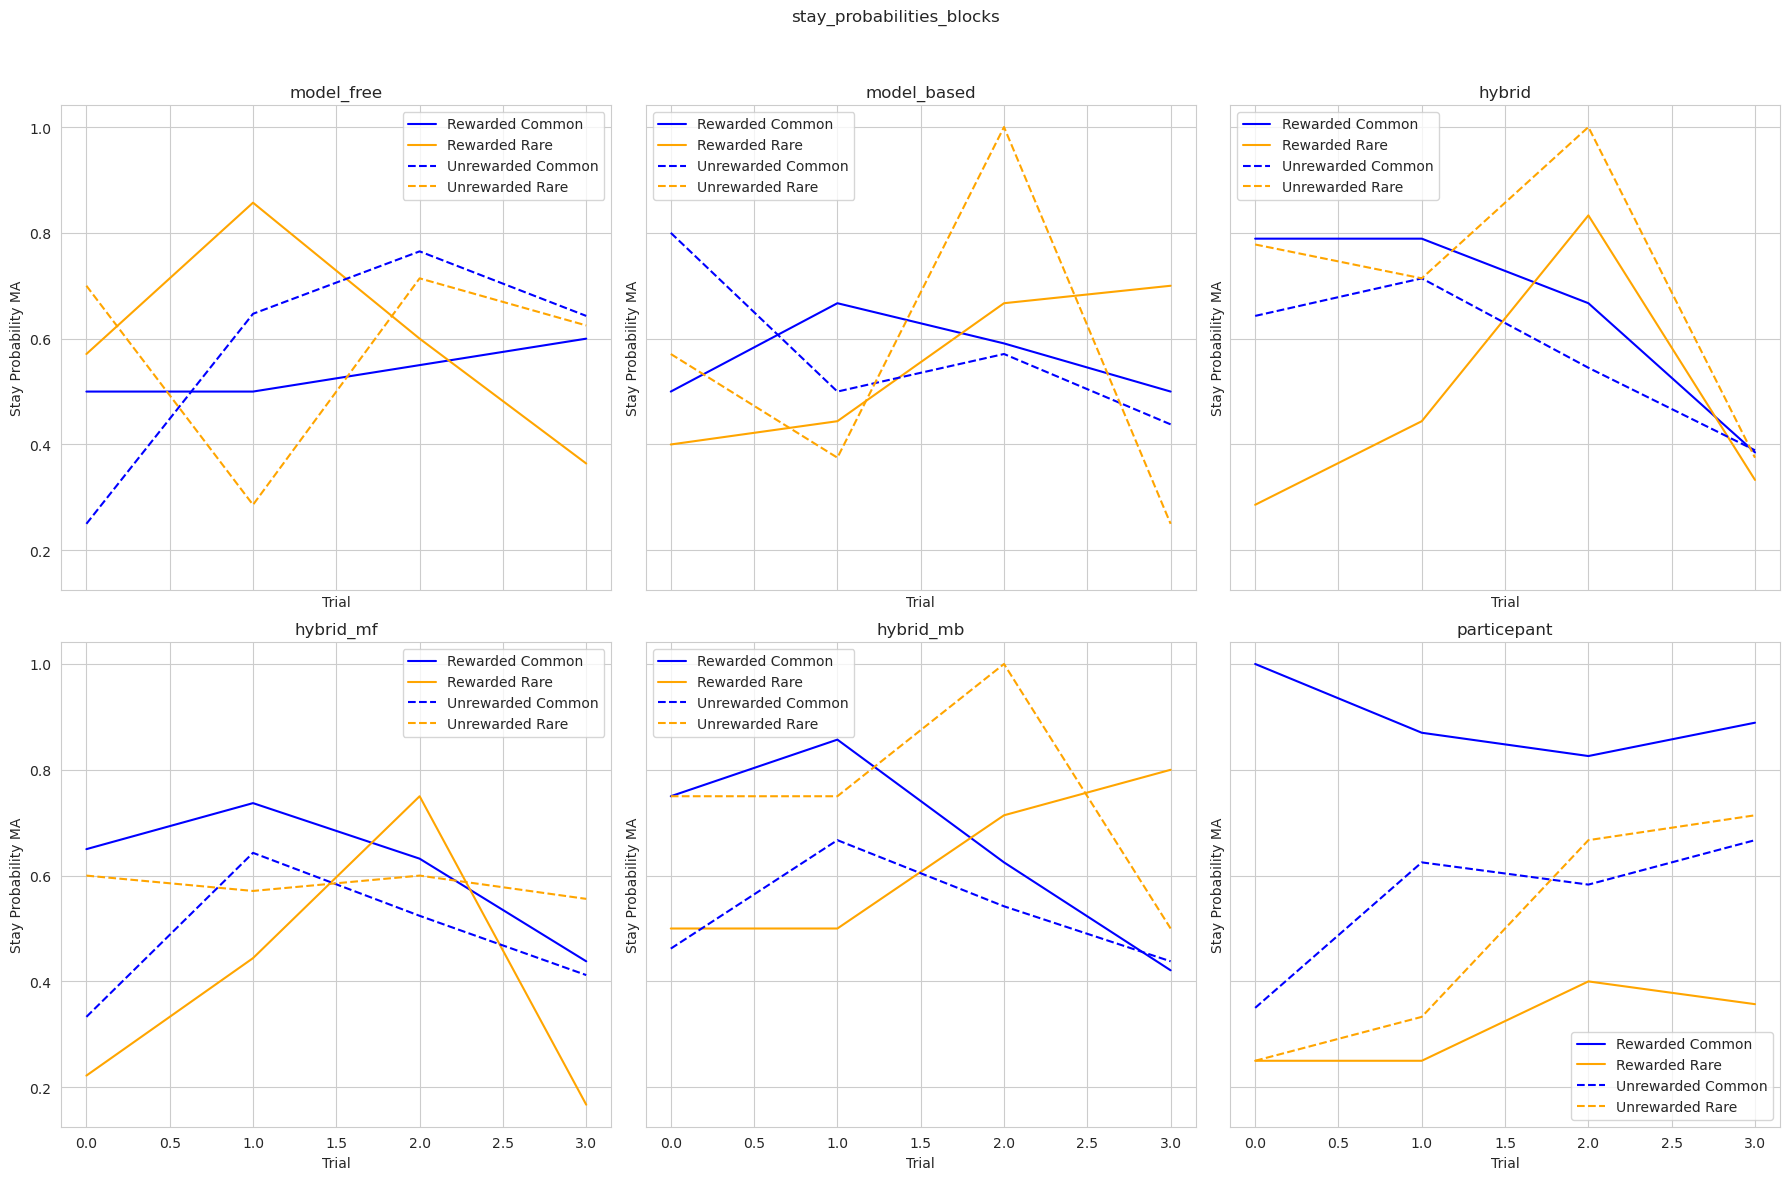

In [34]:
# plot the stay probability in seperate blocks of the experiment
num_blocks = 4
stay_probabilities_blocks = calc_plot_stay_probabilities_blocks(dfs=task_dfs, labels=model_names, title='stay_probabilities_blocks',
                                                               num_blocks=num_blocks, max_plots_per_row=3)

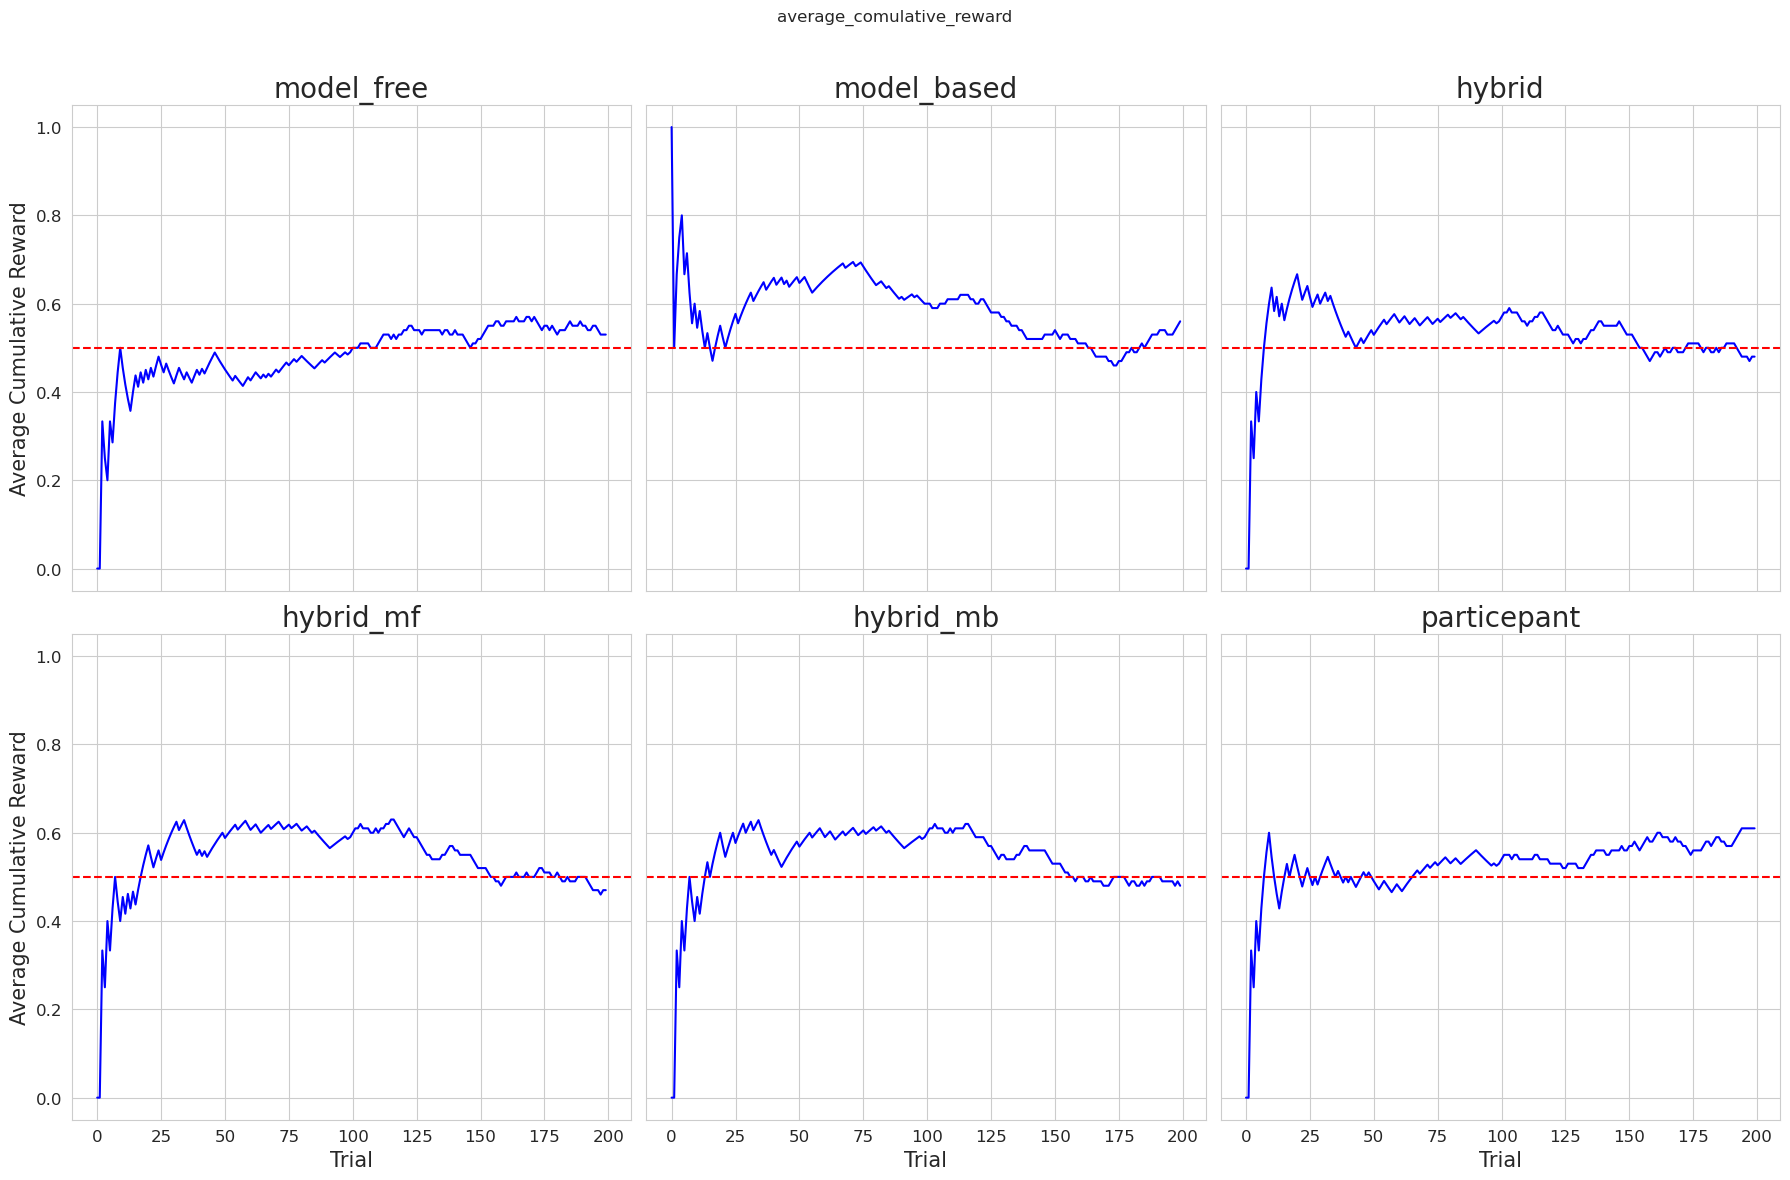

In [35]:
# plot the average comulative rewards
window_size = 100
average_comulative_rewards = calc_plot_running_average_cumulative_reward(dfs=task_dfs, labels=model_names, title='average_comulative_reward',
                                                                        window_size=window_size, max_plots_per_row=3)

## Parameter Fitting *(4 points)*

For this exercise you should:

*   Set up a suitable parameter search space *(1 point)*

*   Implement a procedure to evaluate the fit of a model based on data *(2 points)*

*   Implement a procedure for searching the parameter space. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.



### <spin style="color: green">fitting procedures</spin>
for all the fitting procedures, we are using the (negative) log-likelihood of the data given the model as the objective function
- <spin style="color: blue">minimize search:</spin> 
    - uses a gradient descent algorithm to minimize an objective function
    - expects:
        - a mapping (dictionary) of paramtere -> parameter-search-space-range as a tuple/list/array or a parameter space ( e.g. np.linspace(...) ) from which the range is inferred <br>
        - number of iterations/evaluations for initializing an initial guess and performing an optimization ( minimization ) with e.g. gradient decent, higher number is better for escaping local minima but it can be have computationally expensive  <br>
    - returns:
        - a dictionary of best parameters
        - the corresponding log-likelihood values
        - all evaluated parameter combinations and their log-likelihood values as dataframe ( for inspection and plotting )
- <spin style="color: blue">grid search:</spin>
    - evaluates all possible parameter combinations with an objective function
    - expects:
        - a mapping (dictionary) of paramtere -> parameter space ( e.g. np.linspace(...) ) <br>
    - returns:
        - a dictionary of best parameters
        - the corresponding log-likelihood values
        - all evaluated parameter combinations and their log-likelihood values as a matrix ( for inspection and plotting )
- <spin style="color: blue">random search:</spin>
    - evaluates random parameter combinations within a search space with an objective function
    - expects:
        - a mapping (dictionary) of paramtere -> parameter-search-space-range as a tuple/list/array or a parameter space ( e.g. np.linspace(...) ) from which the range is inferred <br>
        - number of iteration for fitting randomly sampled parameter combinations <br>
    - returns:
        - a dictionary of best parameters
        - the corresponding log-likelihood values
        - all evaluated parameter combinations and their log-likelihood values as dataframe ( for inspection and plotting )


In [90]:
from simulate import simulate
from parameter_fitting import fit_with_grid_search, fit_to_average_cumulative_reward, plot_fit_results,\
    fit_with_random_search, get_best_params_and_ll, fit_with_minimize
from behavioral_analysis import plot_stay_probabilities, calculate_stay_probability,\
    calc_plot_stay_probabilities, calc_plot_stay_probabilities_moving_average, calc_plot_stay_probabilities_blocks,\
    calc_plot_running_stay_probabilities, calc_plot_stay_probability_paired_diffs,\
        calc_plot_running_average_cumulative_reward, print_simple_task_summary
from utils import preprocess_human_data ,save_simulated_data
import numpy as np
import pandas as pd
import os
from scipy.stats import uniform
from IPython.display import display
from tqdm import tqdm

here we use low number of iterations since it's only for demonstration purposes <br>
in last part, we fit all models to all participants with the best suited fitting procedure

In [112]:
# pick a participant to fit the model to
data_index = 6
data = all_particepant_data[data_index]

NUM_ITERATIONS = 1000  # Number of iterations for random search
NUM_INITILIZATIONS = 50  # Number of random initializations for minimize search
CONSIDER_BOTH_STAGES = True
kwargs_for_fitting_functions = {
                                # 'num_iterations': NUM_ITERATIONS,
                                'num_initializations': NUM_INITILIZATIONS,
                                'consider_both_stages': CONSIDER_BOTH_STAGES}

INTERPOLATION_STEPS = 21 # Number of steps for interpolation of the parameter space
# define the parameter space for the simple model free and based
ALPHA_RANGE = (0.05, 0.85)
BETA_RANGE = (-4, 8)
# Define parameter distributions for hybrid model and its tow special cases (model free and model based)
ALPHA_1_RANGE = (0.05, 0.85)
ALPHA_2_RANGE = (0.05, 0.85)
BETA_1_RANGE = (-4, 8)
BETA_2_RANGE = (-4, 8)
LAMBDA_RANGE = (0.1, 0.9)
W_RANGE = (0, 1)
P_RANGE = (-0.5, 0.5)

parammeter_space = {'alpha': np.linspace(*ALPHA_RANGE, INTERPOLATION_STEPS),
                    'beta':  np.linspace(*BETA_RANGE, INTERPOLATION_STEPS)}

param_space_hybrid = {
    'alpha_1': np.linspace(*ALPHA_1_RANGE, INTERPOLATION_STEPS),
    'alpha_2': np.linspace(*ALPHA_2_RANGE, INTERPOLATION_STEPS),
    'beta_1': np.linspace(*BETA_1_RANGE, INTERPOLATION_STEPS),
    'beta_2': np.linspace(*BETA_2_RANGE, INTERPOLATION_STEPS),
    '_lambda': np.linspace(*LAMBDA_RANGE, INTERPOLATION_STEPS),
    'w': np.linspace(*W_RANGE, INTERPOLATION_STEPS),
    'p': np.linspace(*P_RANGE, INTERPOLATION_STEPS),
}

# param space for hybrid special cases
# pure model free from hybrid -> w = 0
param_space_hybrid_mf = param_space_hybrid.copy() 
param_space_hybrid_mf['w'] = np.array([0.0])

# pure model based from hybrid -> w = 1 and alpha_1 and lambda are arbitrary so we fix them as well to avoid wasting time fitting them 
param_space_hybrid_mb = param_space_hybrid.copy()
param_space_hybrid_mb['w'] = np.array([1.0])
param_space_hybrid_mb['alpha_1'] = np.array([1.0])
param_space_hybrid_mb['_lambda'] = np.array([1.0])

In [52]:
gs_fitted_params_mf, gs_fitted_LL_mf, gs_fitted_results_mf = fit_with_grid_search(parammeter_space, data, agent_type='model_free',
                                            consider_both_stages=CONSIDER_BOTH_STAGES)

In [53]:
gs_fitted_params_mb, gs_fitted_LL_mb, gs_fiited_results_mb = fit_with_grid_search(parammeter_space, data, agent_type='model_based',
                                            consider_both_stages=CONSIDER_BOTH_STAGES)

In [46]:
np.random.seed(None)
random_seed = np.random.randint(0, 1000)

rs_fitted_params_hybrid, rs_fitted_LL_hybrid, rs_fitted_results_hybrid = fit_with_random_search(param_space_hybrid, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES, num_iterations=NUM_ITERATIONS, seed=random_seed, show_progress=True)

np.random.seed(None)

random_search::   0%|          | 0/1000 [00:00<?, ?it/s]

In [47]:
np.random.seed(None)
random_seed = np.random.randint(0, 1000)

rs_fitted_params_hybrid_mf, rs_fitted_LL_hybrid_mf, rs_fitted_results_hybrid_mf = fit_with_random_search(param_space_hybrid, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES, num_iterations=NUM_ITERATIONS, seed=random_seed, show_progress=True)

np.random.seed(None)

random_search::   0%|          | 0/1000 [00:00<?, ?it/s]

In [67]:
np.random.seed(None)
random_seed = np.random.randint(0, 1000)

rs_fitted_params_hybrid_mb, rs_fitted_LL_hybrid_mb, rs_fitted_results_hybrid_mb = fit_with_random_search(param_space_hybrid, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES, num_iterations=NUM_ITERATIONS*2, seed=random_seed, show_progress=True)

np.random.seed(None)

random_search::   0%|          | 0/2000 [00:00<?, ?it/s]

In [54]:
ms_fitted_params_mf, ms_fitted_LL_mf, ms_fitted_results_mf = fit_with_minimize(parammeter_space, data, 
                                                        agent_type='model_free', consider_both_stages=CONSIDER_BOTH_STAGES,
                                                        num_initializations=NUM_INITILIZATIONS)

In [55]:
ms_fitted_params_mb, ms_fitted_LL_mb_minimize, ms_fitted_results_mb = fit_with_minimize(parammeter_space, data,
                                                        agent_type='model_based', consider_both_stages=CONSIDER_BOTH_STAGES,
                                                        num_initializations=NUM_INITILIZATIONS)

In [49]:
ms_fitted_params_hybrid, ms_fitted_LL_hybrid, ms_fitted_results_hybrid = fit_with_minimize(param_space_hybrid, data,
                                                         agent_type='hybrid', consider_both_stages=CONSIDER_BOTH_STAGES,
                                                         num_initializations=NUM_INITILIZATIONS, show_progress=True)

initializations::   0%|          | 0/50 [00:00<?, ?it/s]

In [50]:
# model free as special cases of hybrid model

ms_fitted_params_hybrid_mf, ms_fitted_LL_hybrid_mf, ms_fitted_results_hybrid_mf = fit_with_minimize(param_space_hybrid_mf, data,
                                                        agent_type='hybrid', consider_both_stages=CONSIDER_BOTH_STAGES,
                                                        num_initializations=NUM_INITILIZATIONS, show_progress=True)

initializations::   0%|          | 0/50 [00:00<?, ?it/s]

In [51]:
# model based as special cases of hybrid model
ms_fitted_params_hybrid_mb, ms_fitted_LL_hybrid_mb, ms_fitted_results_hybrid_mb = fit_with_minimize(param_space_hybrid_mb, data,
                                                        agent_type='hybrid', consider_both_stages=CONSIDER_BOTH_STAGES,
                                                        num_initializations=NUM_INITILIZATIONS, show_progress=True)

initializations::   0%|          | 0/50 [00:00<?, ?it/s]

In [64]:
mcmc_fitted_params_hybrid, mcmc_fitted_LL_hybrid, mcmc_fitted_results_hybrid = fit_with_MCMC(param_space_hybrid, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES, num_samples=NUM_ITERATIONS*4, num_burn_in=NUM_ITERATIONS, show_progress=True)

MCMC Sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

In [65]:
mcmc_fitted_LL_hybrid_mf, mcmc_fitted_params_hybrid_mf, mcmc_fitted_results_hybrid_mf = fit_with_MCMC(param_space_hybrid_mf, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES, num_samples=NUM_ITERATIONS*2, num_burn_in=NUM_ITERATIONS//2, show_progress=True)

MCMC Sampling:   0%|          | 0/2500 [00:00<?, ?it/s]

In [66]:
mcmc_fitted_LL_hybrid_mb, mcmc_fitted_params_hybrid_mb, mcmc_fitted_results_hybrid_mb = fit_with_MCMC(param_space_hybrid_mb, data, agent_type='hybrid',
                                            consider_both_stages=CONSIDER_BOTH_STAGES, num_samples=NUM_ITERATIONS*2, num_burn_in=NUM_ITERATIONS//2, show_progress=True)

MCMC Sampling:   0%|          | 0/2500 [00:00<?, ?it/s]

In [73]:
# sep = "\n"
# end = "\n" + "-" * 50 + "\n"
# print("### simple model free (grid search):", 'best params:', gs_fitted_params_mf, "best_LL:", gs_fitted_LL_mf, sep=sep, end=end)
# print("### simple model based (grid search):", 'best params:', gs_fitted_params_mb, "best_LL:", gs_fitted_LL_mb, sep=sep, end=end)
# print("### hybrid (random search):", 'best params:', rs_fitted_params_hybrid, "best_LL:", rs_fitted_LL_hybrid, sep=sep, end=end)
# print("### hybrid mf (random search):", 'best params:', rs_fitted_params_hybrid_mf, "best_LL:", rs_fitted_LL_hybrid_mf, sep=sep, end=end)
# print("### hybrid mb (random search):", 'best params:', rs_fitted_params_hybrid_mb, "best_LL:", rs_fitted_LL_hybrid_mb, sep=sep, end=end)
# print("### simple model free (minimize):", 'best params:', ms_fitted_params_mf, "best_LL:", ms_fitted_LL_mf, sep=sep, end=end)
# print("### simple model based (minimize):", 'best params:', ms_fitted_params_mb, "best_LL:", ms_fitted_LL_mb_minimize, sep=sep, end=end)
# print("### hybrid (minimize):", 'best params:', ms_fitted_params_hybrid, "best_LL:", ms_fitted_LL_hybrid, sep=sep, end=end)
# print("### hybrid mf (minimize):", 'best params:', ms_fitted_params_hybrid_mf, "best_LL:", ms_fitted_LL_hybrid_mf, sep=sep, end=end)
# print("### hybrid mb (minimize):", 'best params:', ms_fitted_params_hybrid_mb, "best_LL:", ms_fitted_LL_hybrid_mb, sep=sep, end=end)
# print("### hybrid (MCMC):", 'best params:', mcmc_fitted_params_hybrid, "best_LL:", mcmc_fitted_LL_hybrid, sep=sep, end=end)
# print("### hybrid mf (MCMC):", 'best params:', mcmc_fitted_params_hybrid_mf, "best_LL:", mcmc_fitted_LL_hybrid_mf, sep=sep, end=end)
# print("### hybrid mb (MCMC):", 'best params:', mcmc_fitted_params_hybrid_mb, "best_LL:", mcmc_fitted_LL_hybrid_mb, sep=sep, end=end)

# put all results in a dataframe
all_fitted_params_hybrid = [rs_fitted_params_hybrid, rs_fitted_params_hybrid_mf, rs_fitted_params_hybrid_mb,
                            ms_fitted_params_hybrid, ms_fitted_params_hybrid_mf, ms_fitted_params_hybrid_mb,
                            mcmc_fitted_params_hybrid, mcmc_fitted_params_hybrid_mf, mcmc_fitted_params_hybrid_mb]
all_fitted_LL_hybrid = [rs_fitted_LL_hybrid, rs_fitted_LL_hybrid_mf, rs_fitted_LL_hybrid_mb,
                        ms_fitted_LL_hybrid, ms_fitted_LL_hybrid_mf, ms_fitted_LL_hybrid_mb,
                        mcmc_fitted_LL_hybrid, mcmc_fitted_LL_hybrid_mf, mcmc_fitted_LL_hybrid_mb]
all_model_names_hybrid = ['hybrid', 'hybrid_mf', 'hybrid_mb', 'hybrid', 'hybrid_mf', 'hybrid_mb', 'hybrid', 'hybrid_mf', 'hybrid_mb']
all_fitting_procedures_hybrid = ['random_search', 'random_search', 'random_search', 'minimize', 'minimize', 'minimize', 'MCMC', 'MCMC', 'MCMC']
all_fitted_params_simple = [gs_fitted_params_mf, gs_fitted_params_mb, ms_fitted_params_mf, ms_fitted_params_mb]
all_fitted_LL_simple = [gs_fitted_LL_mf, gs_fitted_LL_mb, ms_fitted_LL_mf, ms_fitted_LL_mb_minimize]
all_names_simple = ['model_free', 'model_based', 'model_free', 'model_based']
all_fitting_procedures_simple = ['grid_search', 'grid_search', 'minimize', 'minimize']

# For simple models
params_df_simple = pd.DataFrame(all_fitted_params_simple)
fit_results_simple_models = pd.DataFrame({
    "Model Type": all_names_simple,
    "Fitting Procedure": all_fitting_procedures_simple,
    "Best LL": all_fitted_LL_simple
})
fit_results_simple_models = pd.concat([fit_results_simple_models, params_df_simple], axis=1)

# For hybrid models
params_df_hybrid = pd.DataFrame(all_fitted_params_hybrid)
fit_results_hybrid_models = pd.DataFrame({
    "Model Type": all_model_names_hybrid,
    "Fitting Procedure": all_fitting_procedures_hybrid,
    "Best LL": all_fitted_LL_hybrid
})
fit_results_hybrid_models = pd.concat([fit_results_hybrid_models, params_df_hybrid], axis=1)

display(fit_results_simple_models)
display(fit_results_hybrid_models)


Model Type Fitting Procedure     Best LL     alpha      beta
0   model_free       grid_search -272.640464  0.365500  1.400000
1  model_based       grid_search -273.333702  0.207500  1.400000
2   model_free          minimize -273.691936  0.190567  1.276874
3  model_based          minimize -273.144315  0.243724  1.125303

Model Type Fitting Procedure     Best LL   _lambda   alpha_1   alpha_2  \
0     hybrid     random_search -274.582188  0.417291  0.356490  0.327590   
1  hybrid_mf     random_search -274.491908  0.909056  0.360893  0.246054   
2  hybrid_mb     random_search -274.751988  0.941777  0.783974  0.282117   
3     hybrid          minimize -281.159988  0.500000  0.405000  0.405000   
4  hybrid_mf          minimize -278.409687  0.279818  0.357482  0.533417   
5  hybrid_mb          minimize -272.612558  1.000000  1.000000  0.191269   
6     hybrid              MCMC -271.923934  0.165542  0.800000  0.176791   
7  hybrid_mf              MCMC -272.012213  0.193190  0.142820  0.308750   
8  hybrid_mb              MCMC -272.874329  1.000000  1.000000  0.225328   

     beta_1    beta_2         p         w  
0  0.078197  0.664790  1.059736  0.641292  
1  0.101524  1.405707 -1.197325  0.968595  
2 -0.157921  1.061154  1.171501  0.480773  
3  1.999997  1.999997 -0.000001  0.500000  
4 -0.009895 -0.128370  0.560739  0.000000  
5  2.307072  1.073254 -0.043348  1.000000  
6  2.648610  1.103429 -0.041687  0.784094  
7  1.313094  1.057360 -0.000702  0.000000  
8  1.316866  0.983735 -0.050098  1.000000

In [ ]:
# plot heatmap slices for the best fitted parameters of hybrid model based



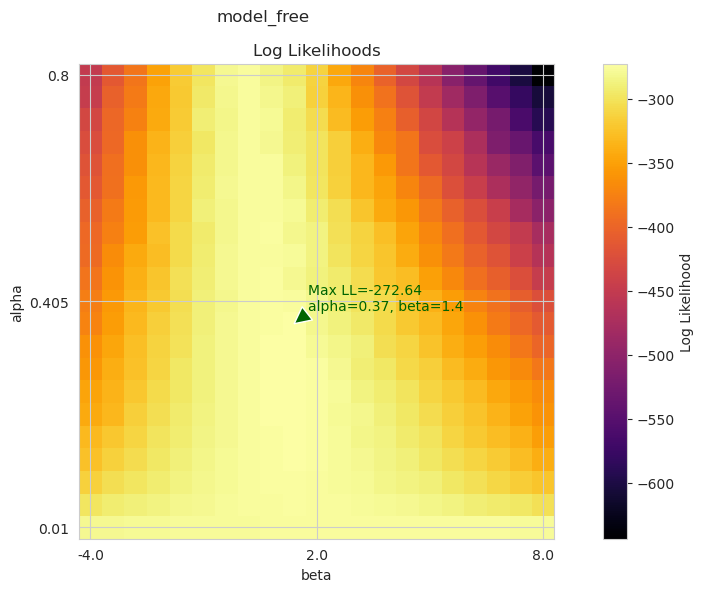

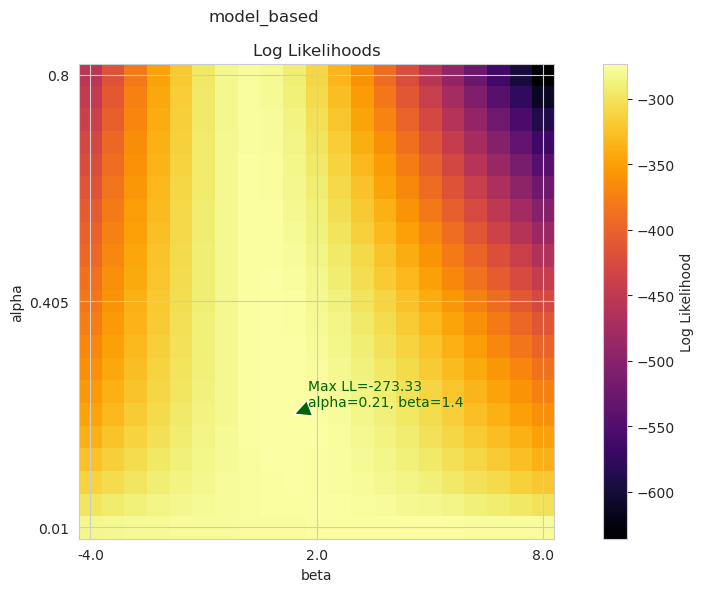

In [72]:
# plot fit results
plot_fit_results(gs_fitted_results_mf, parammeter_space, title='model_free')
plot_fit_results(gs_fiited_results_mb, parammeter_space, title='model_based')

In [77]:
# get the best parameters for each model 
best_simple_models_params =  fit_results_simple_models.groupby('Model Type').apply(lambda x: x.loc[x['Best LL'].idxmax()]).reset_index(drop=True)
display(best_simple_models_params)
best_hybrid_models_params =  fit_results_hybrid_models.groupby('Model Type').apply(lambda x: x.loc[x['Best LL'].idxmax()]).reset_index(drop=True)
display(best_hybrid_models_params)

Model Type Fitting Procedure     Best LL     alpha      beta
0  model_based          minimize -273.144315  0.243724  1.125303
1   model_free       grid_search -272.640464  0.365500  1.400000

Model Type Fitting Procedure     Best LL   _lambda  alpha_1   alpha_2  \
0     hybrid              MCMC -271.923934  0.165542  0.80000  0.176791   
1  hybrid_mb          minimize -272.612558  1.000000  1.00000  0.191269   
2  hybrid_mf              MCMC -272.012213  0.193190  0.14282  0.308750   

     beta_1    beta_2         p         w  
0  2.648610  1.103429 -0.041687  0.784094  
1  2.307072  1.073254 -0.043348  1.000000  
2  1.313094  1.057360 -0.000702  0.000000

In [84]:


sample_size = 100
sampled_data_mf = []
sampled_data_mb = []
sampled_data_hybrid = []
sampled_data_hybrid_mf = []
sampled_data_hybrid_mb = []
random_seeds = np.random.randint(100 + sample_size ** 2, size=sample_size)
print('random_seeds:', random_seeds)
for seed in tqdm(random_seeds, desc='Simulating samples'):

    # simulate models with best parameters
    for i, row in best_simple_models_params.iterrows():
        agent_type = row['Model Type']
        params = row[['alpha', 'beta']].to_dict()
        if agent_type == 'model_free':
            data_best_mf, _ = simulate(agent_type=agent_type, params=params, seed=seed, from_data=particepant_data, use_reward_distribution=True)
        elif agent_type == 'model_based':
            data_best_mb, _ = simulate(agent_type=agent_type, params=params, seed=seed, from_data=particepant_data, use_reward_distribution=True)
    
    for i, row in best_hybrid_models_params.iterrows():
        agent_type = row['Model Type']
        params = row[['alpha_1', 'alpha_2', 'beta_1', 'beta_2', '_lambda', 'w', 'p']].to_dict()
        if agent_type == 'hybrid':
            data_best_hybrid, _ = simulate(agent_type=agent_type, params=params, seed=seed, from_data=particepant_data, use_reward_distribution=True)
        elif agent_type == 'hybrid_mf':
            data_best_hybrid_mf, _ = simulate(agent_type=agent_type, params=params, seed=seed, from_data=particepant_data, use_reward_distribution=True)
        elif agent_type == 'hybrid_mb':
            data_best_hybrid_mb, _ = simulate(agent_type=agent_type, params=params, seed=seed, from_data=particepant_data, use_reward_distribution=True)

    # add to the data
    sampled_data_mf.append(data_best_mf)
    sampled_data_mb.append(data_best_mb)
    sampled_data_hybrid.append(data_best_hybrid)
    sampled_data_hybrid_mf.append(data_best_hybrid_mf)
    sampled_data_hybrid_mb.append(data_best_hybrid_mb)

random_seeds: [ 1936  9056  1989  4747  6454  7264  9411  9751  6310  4757  9448  3684
  6510  9368  9181  1441  2854  7029  6956   979  1788  5574 10022  4099
  6030  7069  7207  3429  1220   138  2066  4950  7445  7955  2740  1520
  1180  6428  4141  6128  2255  5094  3761  6150  4447  8434  2019    51
  7294  3007  3241  2266  6285  9746  5023  8008  8443  8924  8577  2271
  3273  7341  4980  5989  4368  8284  6394  2057  8788  9801  9368  8654
   581  8608  8636  7198  7914  6584  8908  9718  7856  4170  7784  1472
  2561 10099   971  8827  5372   439  8812  6472  3415  1020  7214  6510
  2303  8612  5134   391]


Simulating samples:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating samples: 100%|██████████| 100/100 [00:24<00:00,  4.10it/s]


Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4']


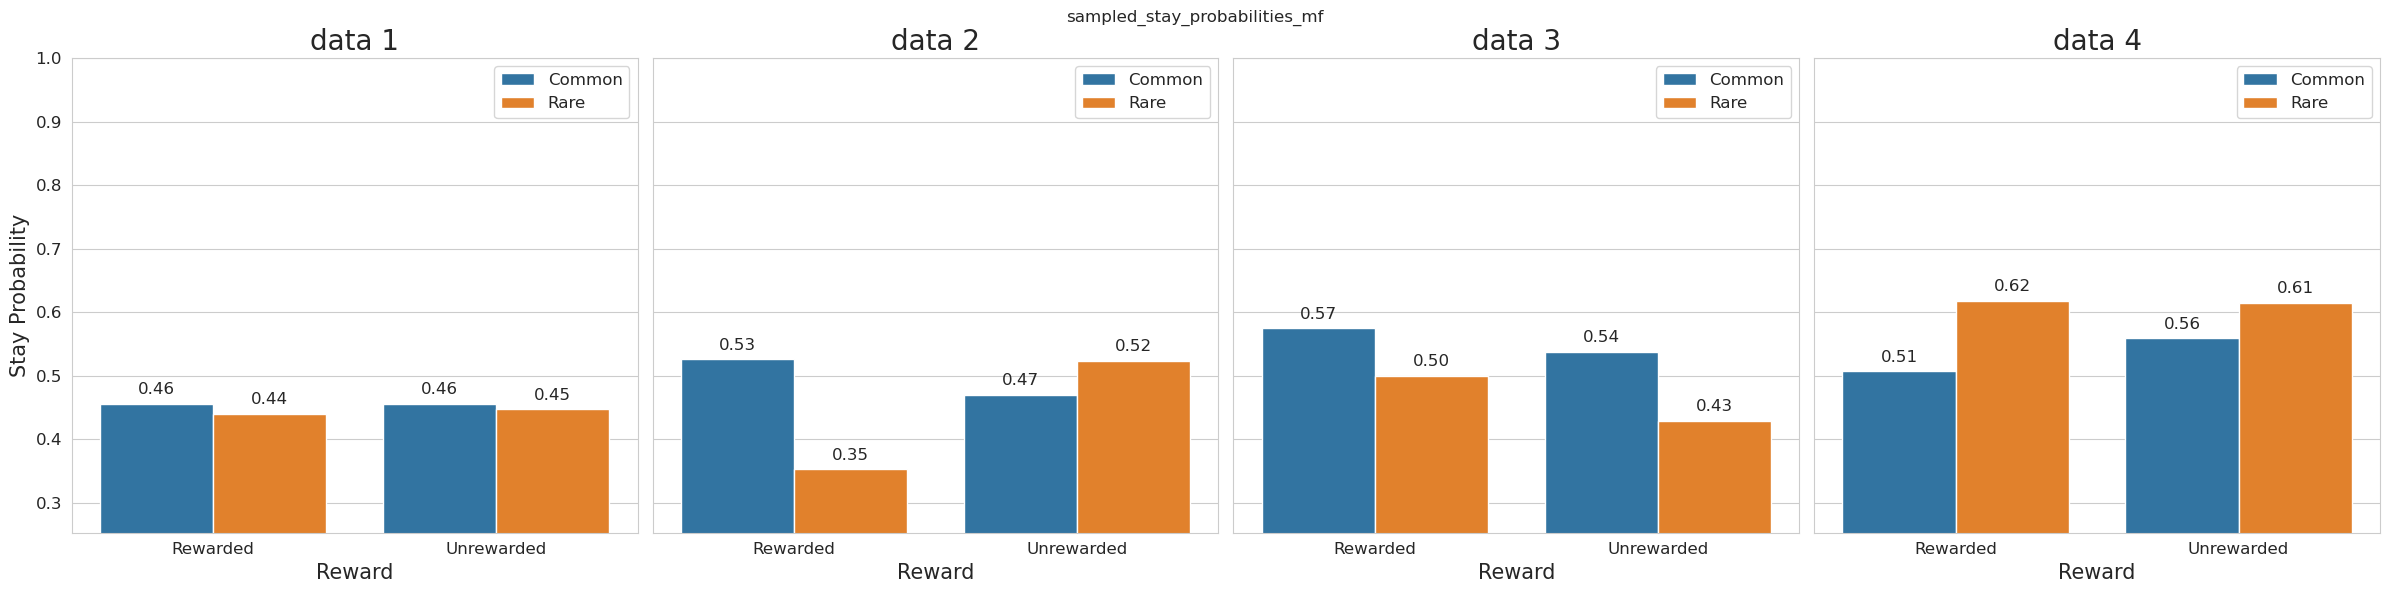

Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4']


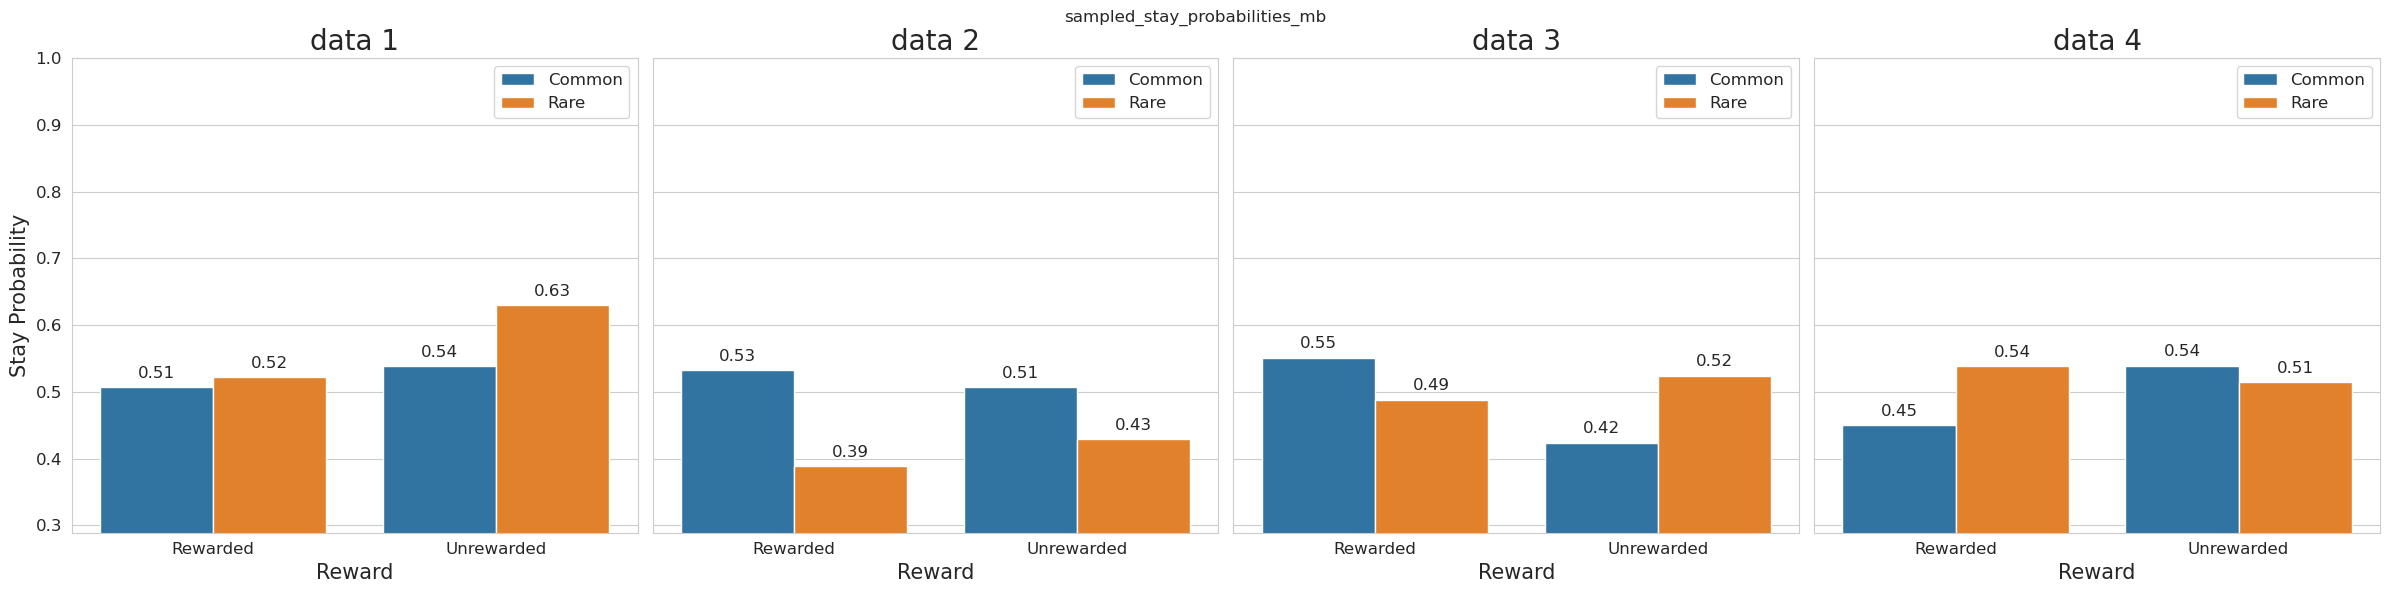

Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4']


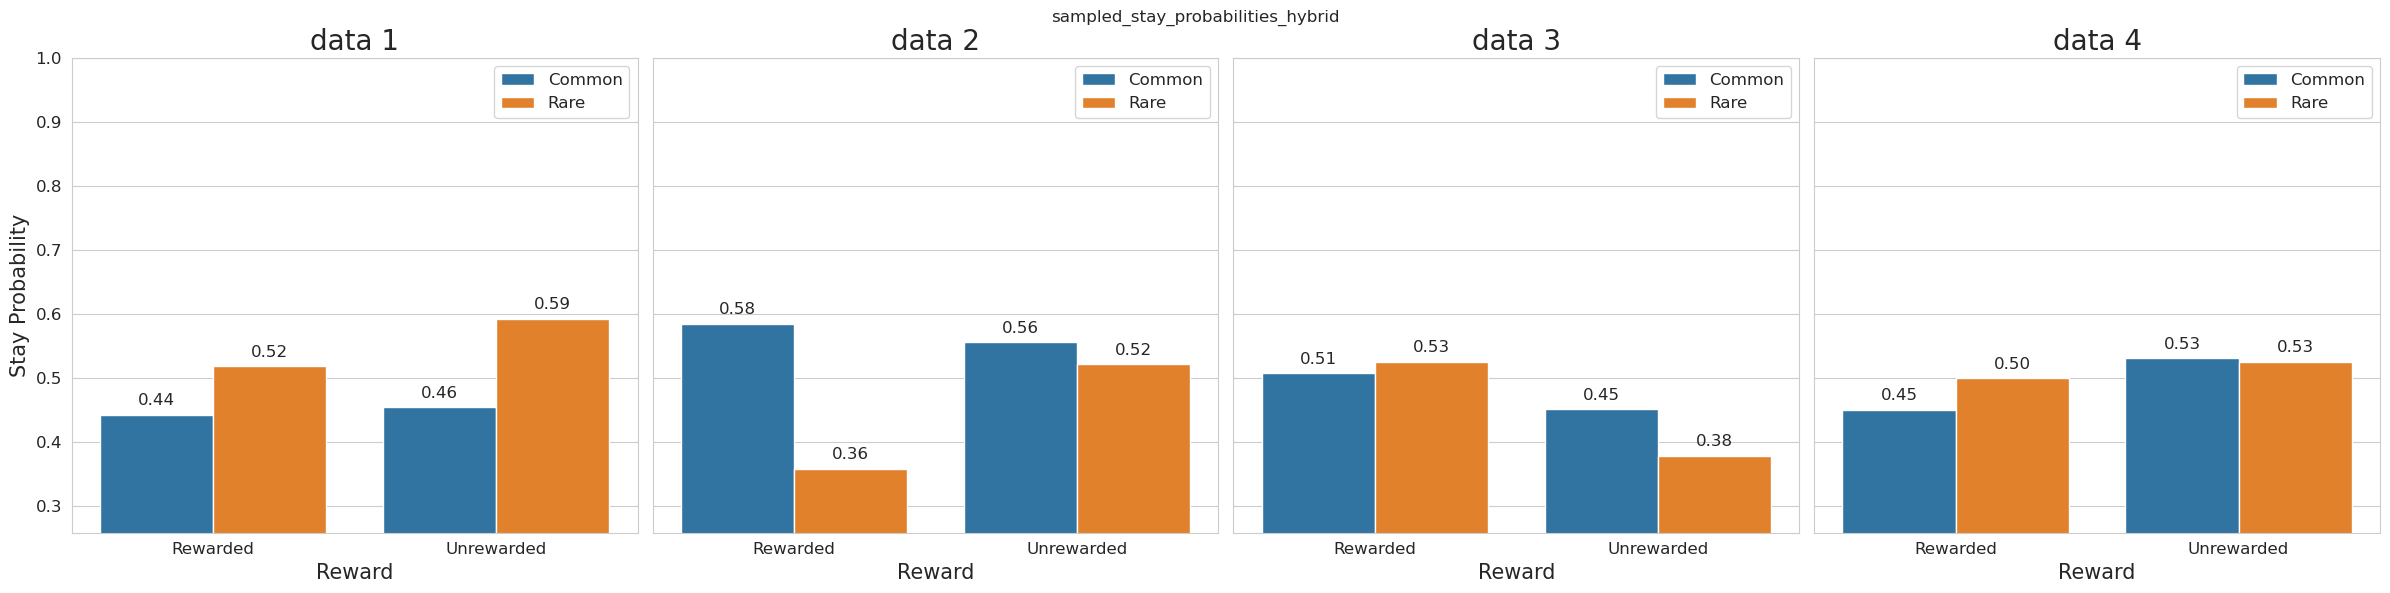

Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4']


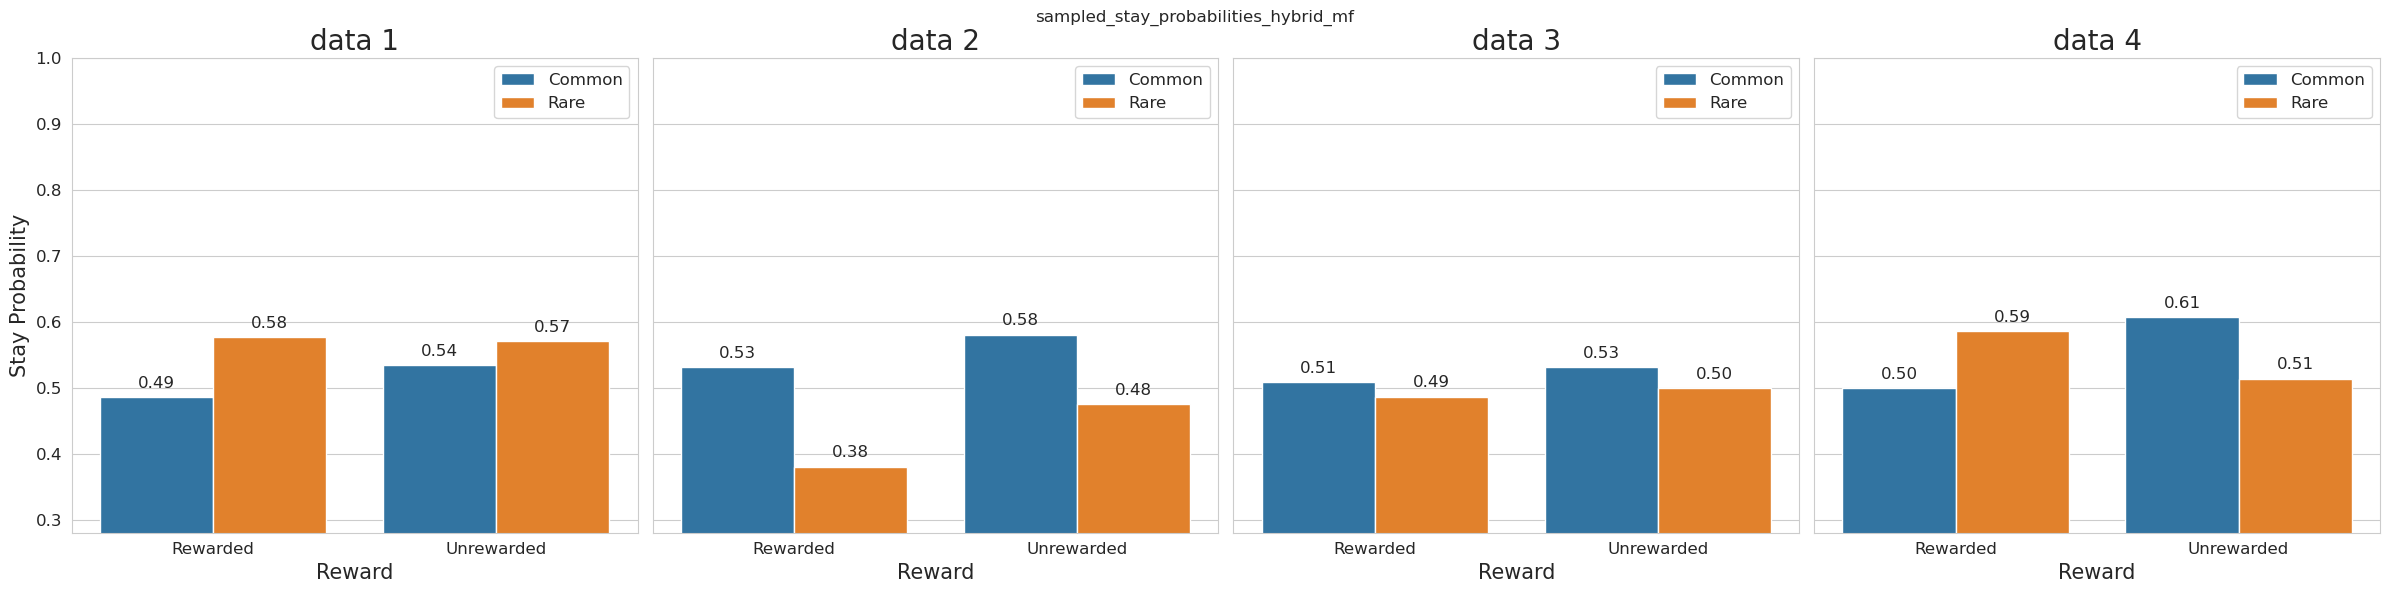

Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4']


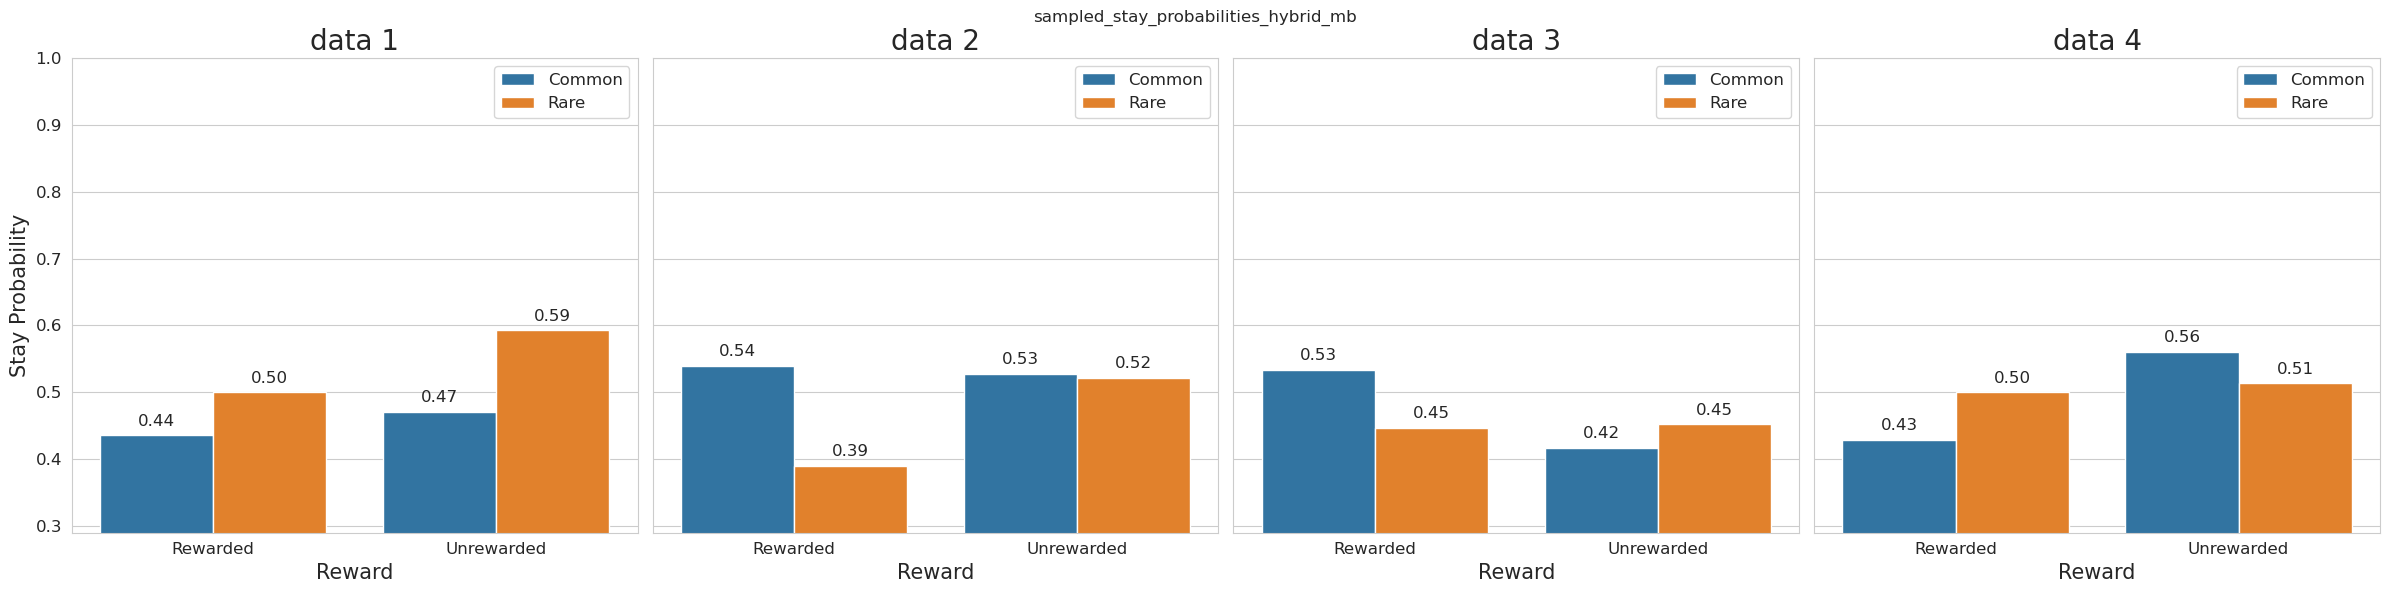

In [87]:
show_n_samples = 4 
sample_stay_prob_mf = calc_plot_stay_probabilities(dfs=sampled_data_mf[::sample_size//show_n_samples], title='sampled_stay_probabilities_mf', max_plots_per_row=4)
sample_stay_prob_mb = calc_plot_stay_probabilities(dfs=sampled_data_mb[::sample_size//show_n_samples], title='sampled_stay_probabilities_mb', max_plots_per_row=4)
sample_stay_prob_hybrid = calc_plot_stay_probabilities(dfs=sampled_data_hybrid[::sample_size//show_n_samples], title='sampled_stay_probabilities_hybrid', max_plots_per_row=4)
sample_stay_prob_hybrid_mf = calc_plot_stay_probabilities(dfs=sampled_data_hybrid_mf[::sample_size//show_n_samples], title='sampled_stay_probabilities_hybrid_mf', max_plots_per_row=4)
sample_stay_prob_hybrid_mb = calc_plot_stay_probabilities(dfs=sampled_data_hybrid_mb[::sample_size//show_n_samples], title='sampled_stay_probabilities_hybrid_mb', max_plots_per_row=4)

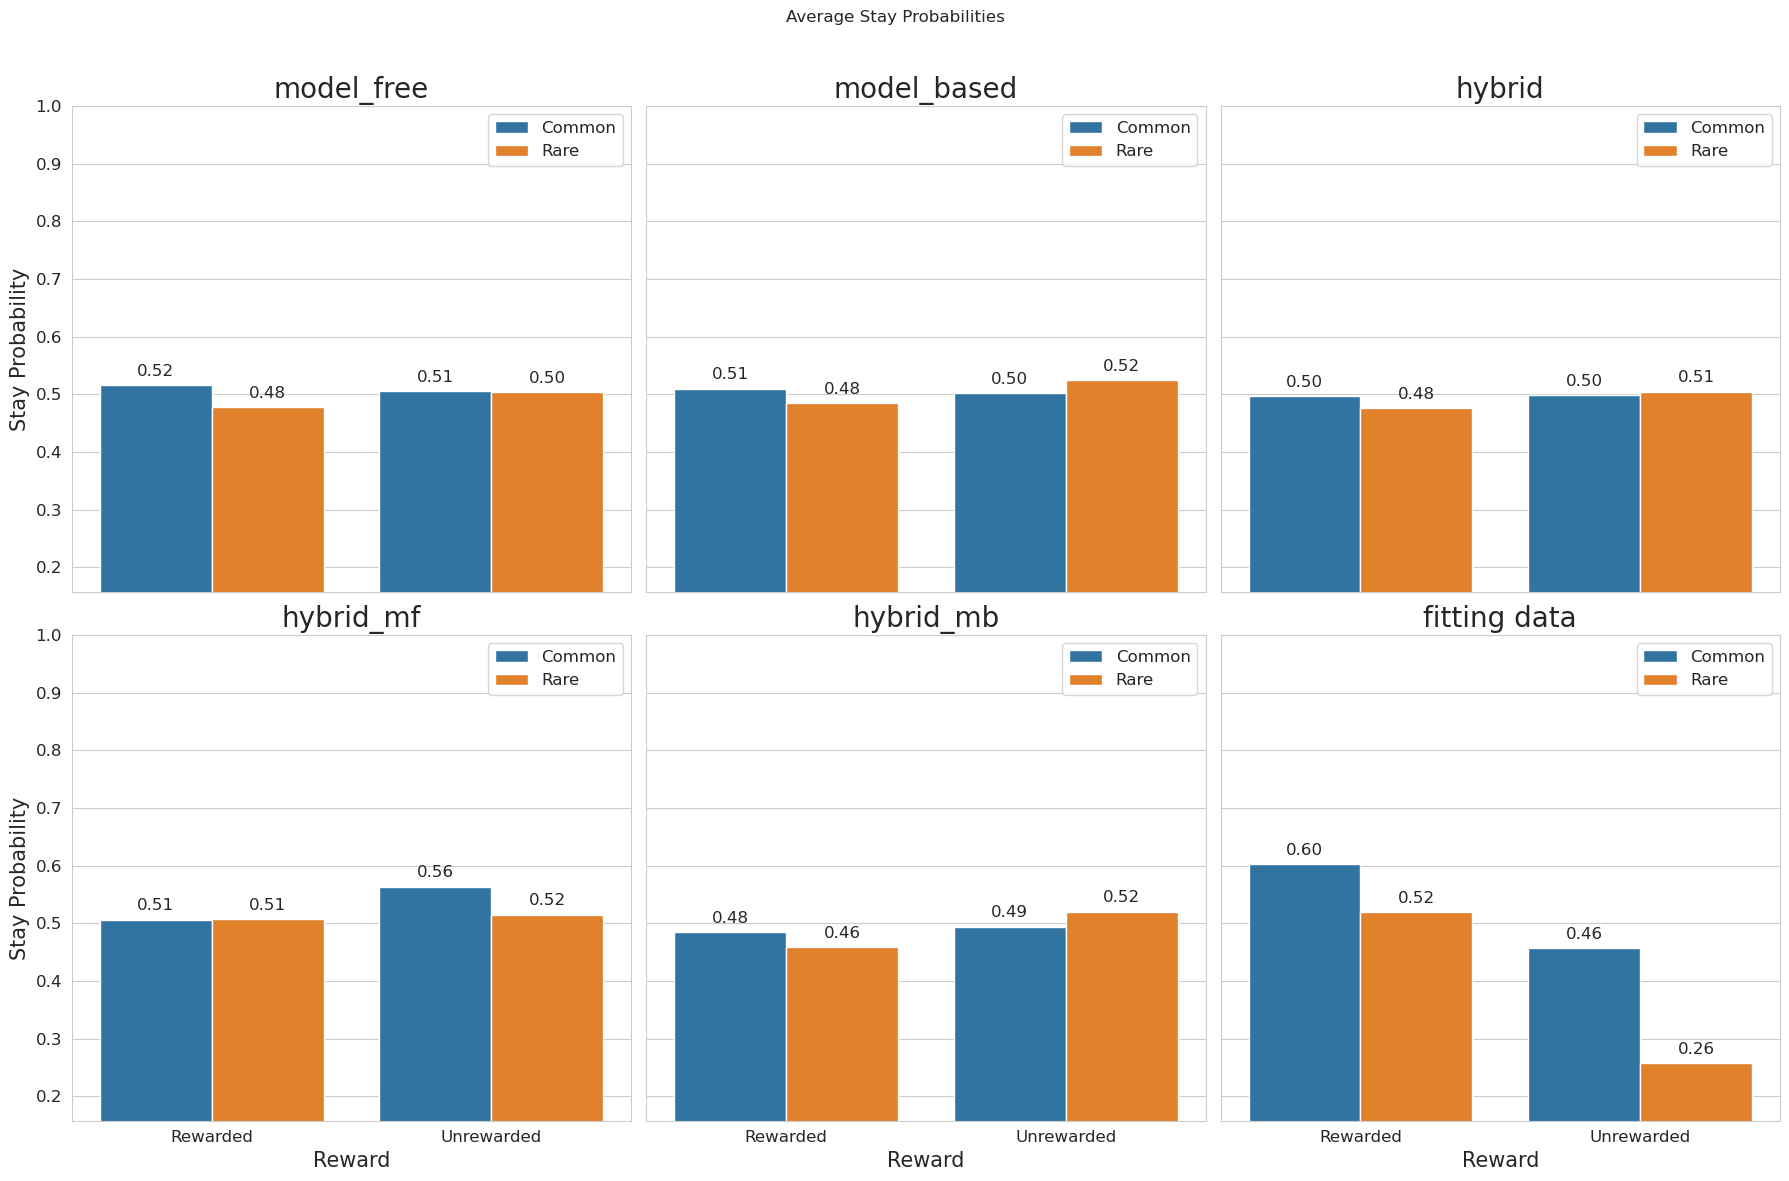

In [91]:
# take the average
all_data_stay_prob_mf_ = pd.concat(sample_stay_prob_mf).reset_index(drop=True)
all_data_stay_prob_mb_ = pd.concat(sample_stay_prob_mb).reset_index(drop=True)
all_data_stay_prob_hybrid_ = pd.concat(sample_stay_prob_hybrid).reset_index(drop=True)
all_data_stay_prob_hybrid_mf_ = pd.concat(sample_stay_prob_hybrid_mf).reset_index(drop=True)
all_data_stay_prob_hybrid_mb_ = pd.concat(sample_stay_prob_hybrid_mb).reset_index(drop=True)
# Compute the average stay probabilities
average_data_mf = all_data_stay_prob_mf_.groupby(['Rewarded', 'Common', 'Condition'])['Stay Probability'].mean().reset_index()
average_data_mb = all_data_stay_prob_mb_.groupby(['Rewarded', 'Common', 'Condition'])['Stay Probability'].mean().reset_index()
average_data_hybrid = all_data_stay_prob_hybrid_.groupby(['Rewarded', 'Common', 'Condition'])['Stay Probability'].mean().reset_index()
average_data_hybrid_mf = all_data_stay_prob_hybrid_mf_.groupby(['Rewarded', 'Common', 'Condition'])['Stay Probability'].mean().reset_index()
average_data_hybrid_mb = all_data_stay_prob_hybrid_mb_.groupby(['Rewarded', 'Common', 'Condition'])['Stay Probability'].mean().reset_index()

# display the average
# display('model_free', average_data_mf)
# display('model_based', average_data_mb)
# display('hybrid', average_data_hybrid)
# display('hybrid_mf', average_data_hybrid_mf)
# display('hybrid_mb', average_data_hybrid_mb)
# plot the average
data_stay_probabilities = calculate_stay_probability(data) 
plot_stay_probabilities(dfs=[average_data_mf, average_data_mb, average_data_hybrid, average_data_hybrid_mf, average_data_hybrid_mb, data_stay_probabilities],
                        labels=['model_free', 'model_based', 'hybrid', 'hybrid_mf', 'hybrid_mb', 'fitting data'],
                        title='Average Stay Probabilities', max_plots_per_row=3)

In [ ]:
# # first take the mean of the differences between rewarded common and rare transitions
# # and unrewarded common and rare transitions
# # then take the mean of the differences between the differences
# sampled_data_lists = [sample_stay_prob_mf, sample_stay_prob_mb, sample_stay_prob_hybrid, sample_stay_prob_hybrid_mf, sample_stay_prob_hybrid_mb]
# model_titles = ['model_free', 'model_based', 'hybrid', 'hybrid_mf', 'hybrid_mb']

# diff = calc_plot_stay_probability_paired_diffs(sampled_data_lists, model_titles)

## Parameter Recovery *(5 points)*

For this exercise you should:

*   Set up a suitable space of parameters relevant for parameter recovery *(1 point)*

*   Use the functions above to generate behavior from a models, for a given set of (randomly sampled) parameters, and then fit the model to its generated data. Make sure to evaluate the parameter fit in a quantiative manner. *(3 points)*

*   Plot the parameter recovery results for both models. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





### <spin style="color: green"> apply parameter recovery on the 5 models </spin>

- parameter recovory of one model -> get result -> plot result -> repeat for all models

In [1]:
from parameter_recovery import param_recovery, plot_param_recovery, plot_param_correlation
import numpy as np
import pandas as pd
from scipy.stats import uniform

In [7]:
# one of "MCMC", "minimize_search", "random_search", "grid_search"
fit_type = "MCMC"
NUM_RUNS = 25
SEED = 0

NUM_SAMPLES= 900 # Number of samples for MCMC
NUM_BURN_IN= 100 # Number of burn in samples for MCMC
NUM_CHAINS = 1 # Number of chains for MCMC
NUM_ITERATIONS = 256  # Number of iterations for random search
NUM_INITILIZATIONS = 5  # Number of random initializations for minimize search
CONSIDER_BOTH_STAGES = True
kwargs_for_fitting_functions = {
                                'num_samples': NUM_SAMPLES,
                                'num_burn_in': NUM_BURN_IN,
                                'num_iterations': NUM_ITERATIONS,
                                'num_initializations': NUM_INITILIZATIONS,
                                'consider_both_stages': CONSIDER_BOTH_STAGES
                                }

INTERPOLATION_STEPS = 21 # Number of steps for interpolation of the parameter space

### PARAMETER SPACE ###

# define the parameter space for the simple model free and based
ALPHA_RANGE = (0.05, 0.85)
BETA_RANGE = (-4, 8)
# Define parameter distributions for hybrid model and its tow special cases (model free and model based)
ALPHA_1_RANGE = (0.05, 0.85)
ALPHA_2_RANGE = (0.05, 0.85)
BETA_1_RANGE = (-4, 8)
BETA_2_RANGE = (-4, 8)
LAMBDA_RANGE = (0.1, 0.9) # we avoide 0 and 1 since we are not aiming at hypothesising about the tow td lamda extremes
W_RANGE = (0.1, 0.9) # this should force the hybrid model to not settle on one of it's sub models 
                            # for the sub models we later fix the the w to either 0 or 1
P_RANGE = (-0.5, 0.5) # we don't want to encourage neither exesive perversion nor it's opposite

param_space = {'alpha': np.linspace(*ALPHA_RANGE, INTERPOLATION_STEPS),
                'beta': np.linspace(*BETA_RANGE, INTERPOLATION_STEPS)}

param_space_hybrid = {
    'alpha_1': np.linspace(*ALPHA_1_RANGE, INTERPOLATION_STEPS),
    'alpha_2': np.linspace(*ALPHA_2_RANGE, INTERPOLATION_STEPS),
    'beta_1': np.linspace(*BETA_1_RANGE, INTERPOLATION_STEPS),
    'beta_2': np.linspace(*BETA_2_RANGE, INTERPOLATION_STEPS),
    '_lambda': np.linspace(*LAMBDA_RANGE, INTERPOLATION_STEPS),
    'w': np.linspace(*W_RANGE, INTERPOLATION_STEPS),
    'p': np.linspace(*P_RANGE, INTERPOLATION_STEPS),
}

param_space_hybrid_mf = param_space_hybrid.copy()
param_space_hybrid_mf['w'] = np.array([0.0])
param_space_hybrid_mb = param_space_hybrid.copy()
param_space_hybrid_mb['w'] = np.array([1.0])
param_space_hybrid_mb['alpha_1'] = np.array([1.0]) # arbitrary value in case of pure model based
param_space_hybrid_mb['_lambda'] = np.array([1.0]) # arbitrary value in case of pure model based

In [11]:
# fit_type = "MCMC"
# NUM_RUNS = 2
# kwargs_for_fitting_functions = {
#                                 'num_samples': 2,
#                                 'num_burn_in': 5,
#                                 'num_iterations': 10,
#                                 'num_initializations': 1,
#                                 'consider_both_stages': CONSIDER_BOTH_STAGES
#                                 }

In [12]:
fitted_params_hybrid, true_params_hybrid, best_ll_hybrid_list = param_recovery(agent_type='hybrid',
                                                                            parameter_space=param_space_hybrid,
                                                                            fit_type='MCMC',
                                                                            num_runs=NUM_RUNS,
                                                                            seed=SEED,
                                                                            **kwargs_for_fitting_functions)

fitting_runs::   0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
# parameter recovery for the model free agent
fitted_params_mf, true_params_mf, best_ll_mf_list = param_recovery(agent_type='model_free',
                                                        parameter_space=param_space,
                                                        fit_type='random_search',
                                                        num_runs=NUM_RUNS,
                                                        seed=SEED,
                                                        **kwargs_for_fitting_functions)

fitting_runs::   0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
# parameter recovery for the hybrid agent 
fitted_params_hybrid, true_params_hybrid, best_ll_hybrid_list = param_recovery(agent_type='hybrid',
                                                        parameter_space=param_space_hybrid,
                                                        fit_type='minimize_search',
                                                        num_runs=NUM_RUNS,
                                                        seed=SEED,
                                                        **kwargs_for_fitting_functions)

fitting_runs::   0%|          | 0/2 [00:00<?, ?it/s]

In [15]:
# parameter recovery for the model based agent
fitted_params_mb, true_params_mb, best_ll_mb_list = param_recovery(agent_type='model_based',
                                                        parameter_space=param_space,
                                                        fit_type='grid_search',
                                                        num_runs=NUM_RUNS,
                                                        seed=SEED,
                                                        **kwargs_for_fitting_functions)

fitting_runs::   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# parameter recovery for the model free as special case of hybrid agent
fitted_params_hybrid_mf, true_params_hybrid_mf, best_ll_hybrid_mf_list = param_recovery(agent_type='hybrid',
                                                        parameter_space=param_space_hybrid_mf,
                                                        fit_type='minimize_search',
                                                        num_runs=NUM_RUNS,
                                                        seed=SEED,
                                                        **kwargs_for_fitting_functions) 

In [ ]:
# parameter recovery for the model based as special case of hybrid agent
fitted_params_hybrid_mb, true_params_hybrid_mb, best_ll_hybrid_mb_list = param_recovery(agent_type='hybrid',
                                                        parameter_space=param_space_hybrid_mb,
                                                        fit_type='minimize_search',
                                                        num_runs=NUM_RUNS,
                                                        seed=SEED,
                                                        **kwargs_for_fitting_functions)

Pearson correlation for alpha: 0.748, p_value: 0.0001472284954367007
Pearson correlation for beta: 0.744, p_value: 0.0001686230245252904


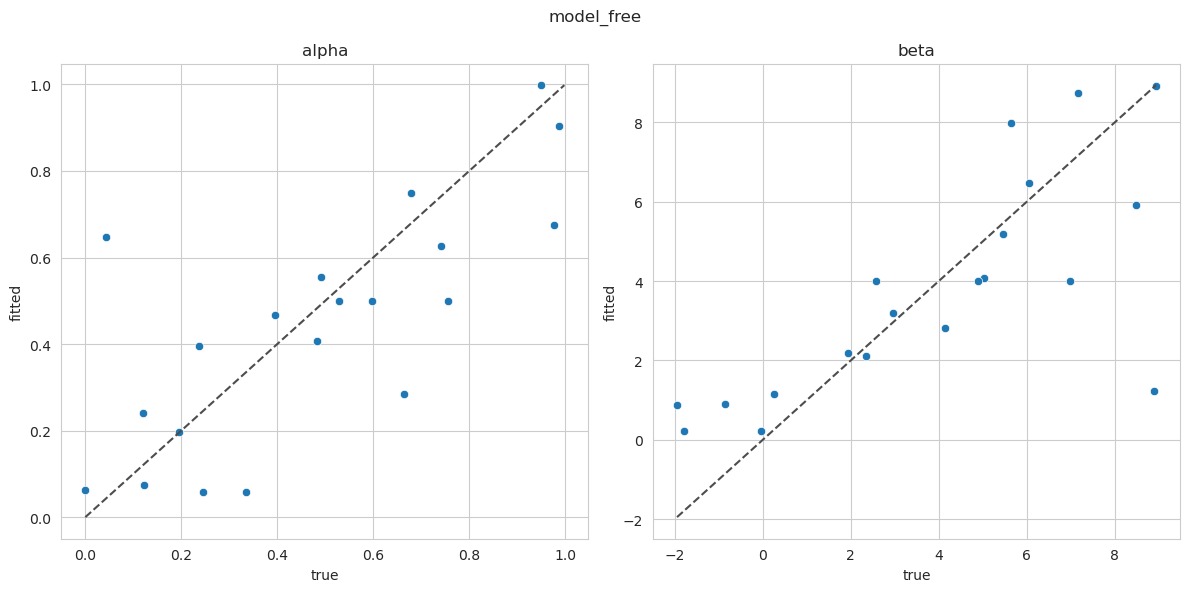

Pearson correlation for alpha: 0.910, p_value: 2.6808557810131345e-08
Pearson correlation for beta: 0.975, p_value: 2.835923207321288e-13


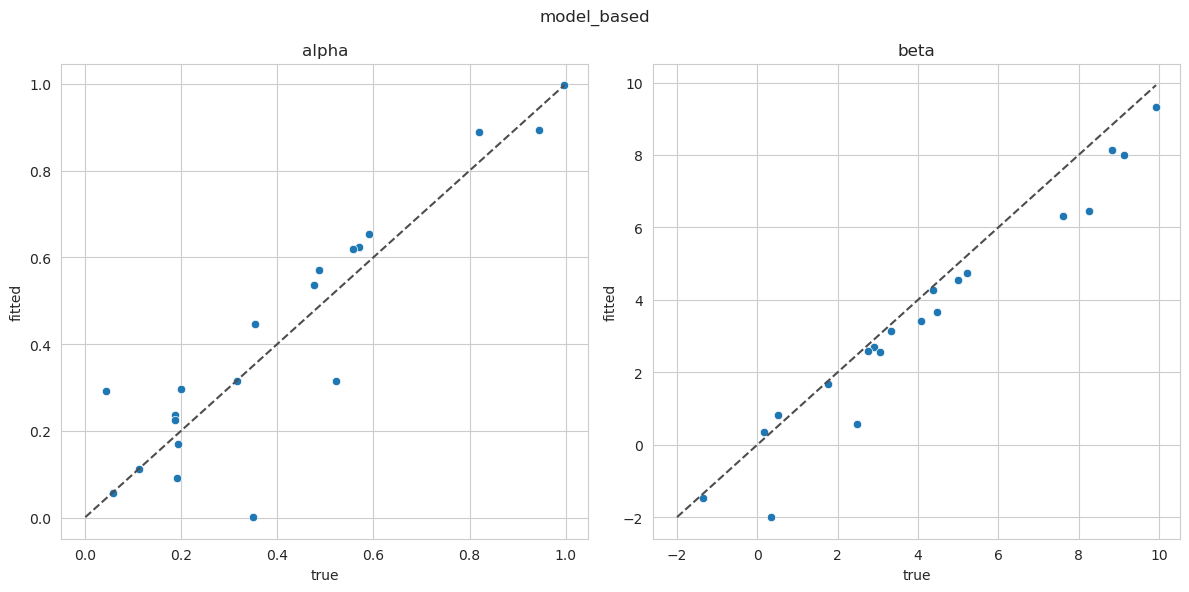

Pearson correlation for alpha_1: 0.138, p_value: 0.5624104633533775
Pearson correlation for alpha_2: 0.357, p_value: 0.12238051627026852
Pearson correlation for beta_1: 0.660, p_value: 0.001535540702216858
Pearson correlation for beta_2: -0.015, p_value: 0.948301497459515
Pearson correlation for _lambda: 0.112, p_value: 0.6392237190928596
Pearson correlation for w: 0.088, p_value: 0.7125441667541301
Pearson correlation for p: 0.259, p_value: 0.27044838933428406


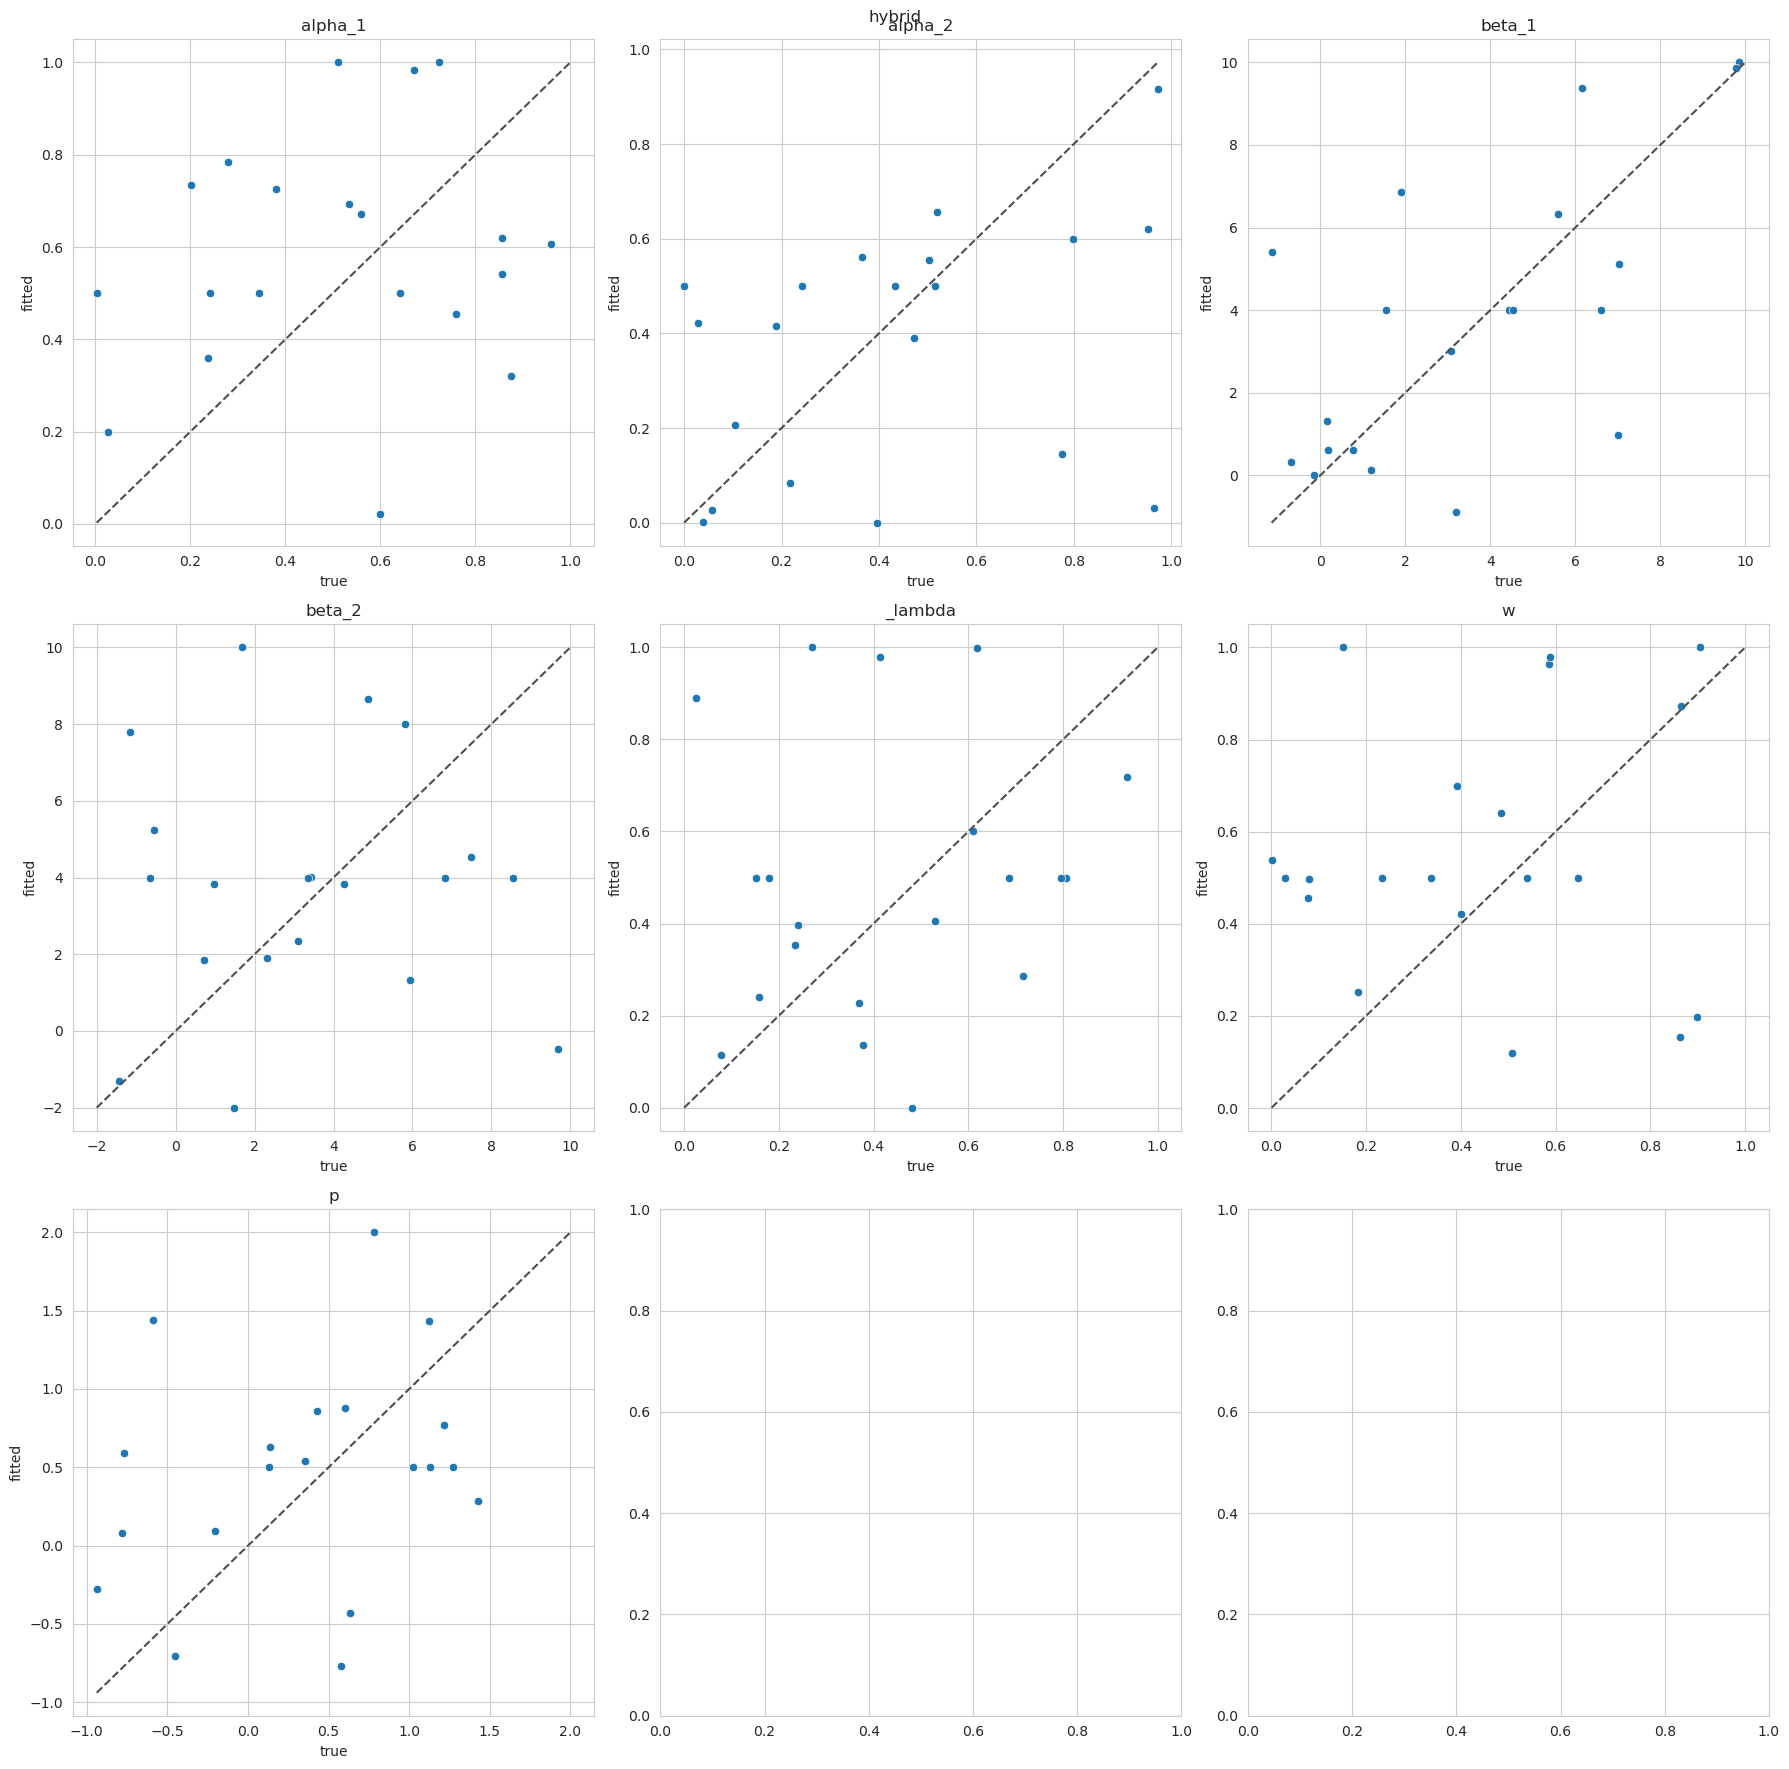

Pearson correlation for alpha_1: 0.093, p_value: 0.6957392603004904
Pearson correlation for alpha_2: 0.126, p_value: 0.5980017646128879
Pearson correlation for beta_1: 0.351, p_value: 0.1296563257646315
Pearson correlation for beta_2: 0.262, p_value: 0.26524148590271984
Pearson correlation for _lambda: 0.017, p_value: 0.9439951581175616
Pearson correlation for w: nan, p_value: nan
Pearson correlation for p: 0.697, p_value: 0.0006380160020752405


/home/martin/miniconda3/envs/m_cs/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


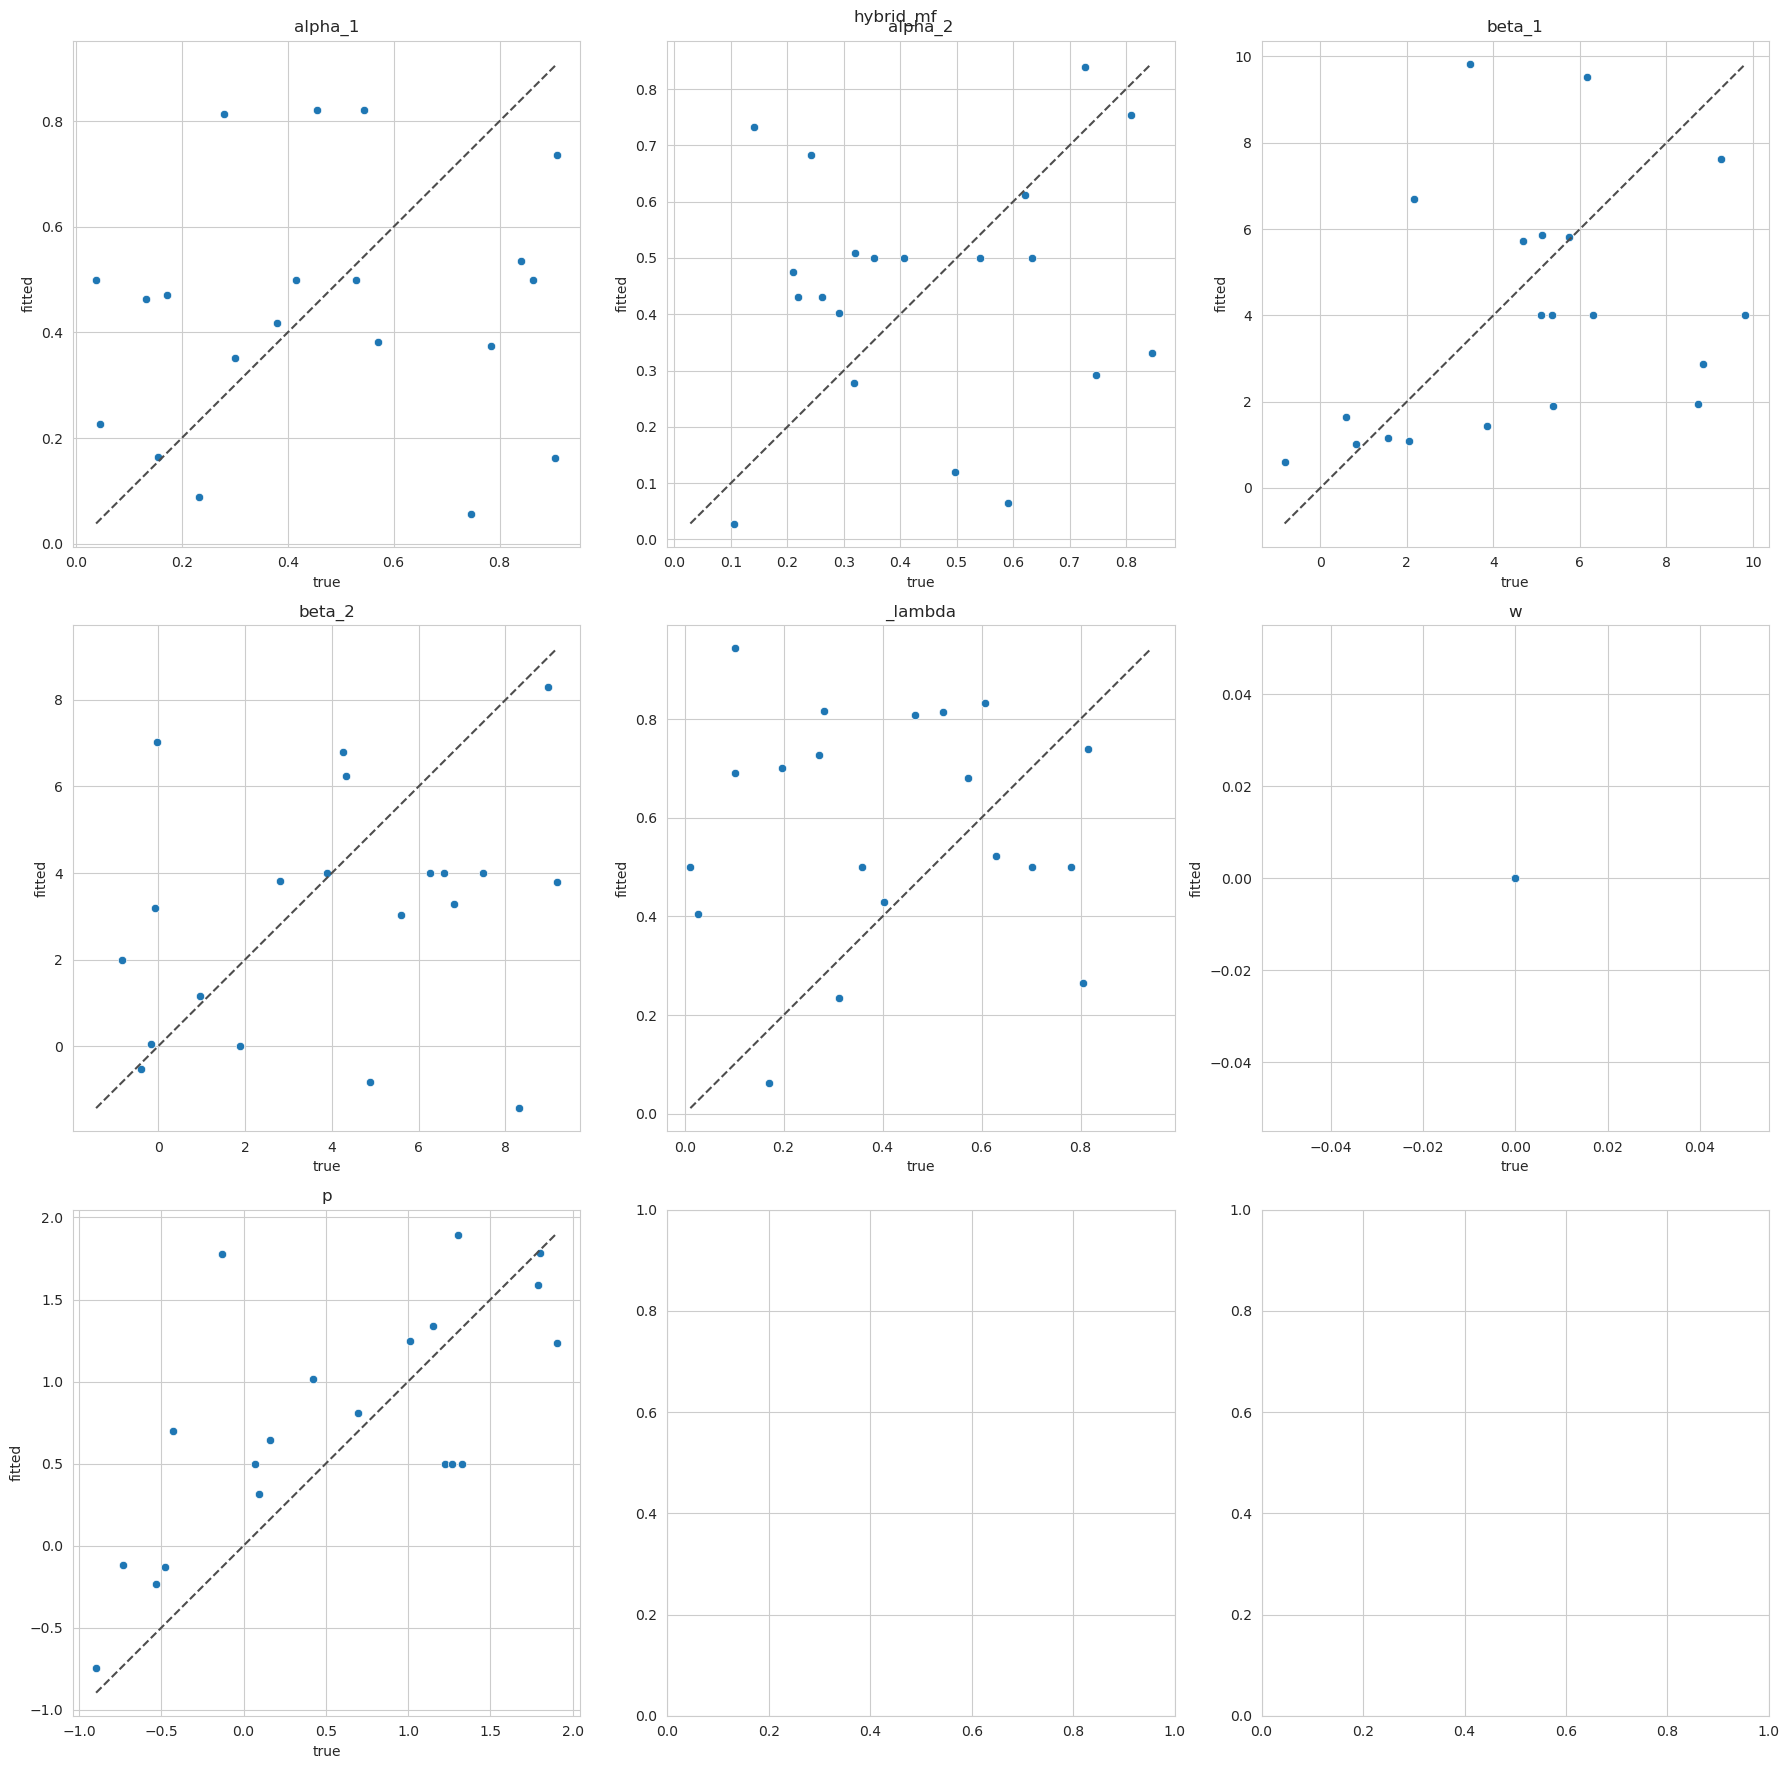

Pearson correlation for alpha_1: 0.038, p_value: 0.8740397579808172
Pearson correlation for alpha_2: 0.970, p_value: 1.8165609825895122e-12
Pearson correlation for beta_1: 0.845, p_value: 2.6988530735382666e-06
Pearson correlation for beta_2: 0.971, p_value: 1.1402548570404103e-12
Pearson correlation for _lambda: 0.084, p_value: 0.7251695028394554
Pearson correlation for w: nan, p_value: nan
Pearson correlation for p: 0.944, p_value: 4.0157861435467826e-10


/home/martin/miniconda3/envs/m_cs/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


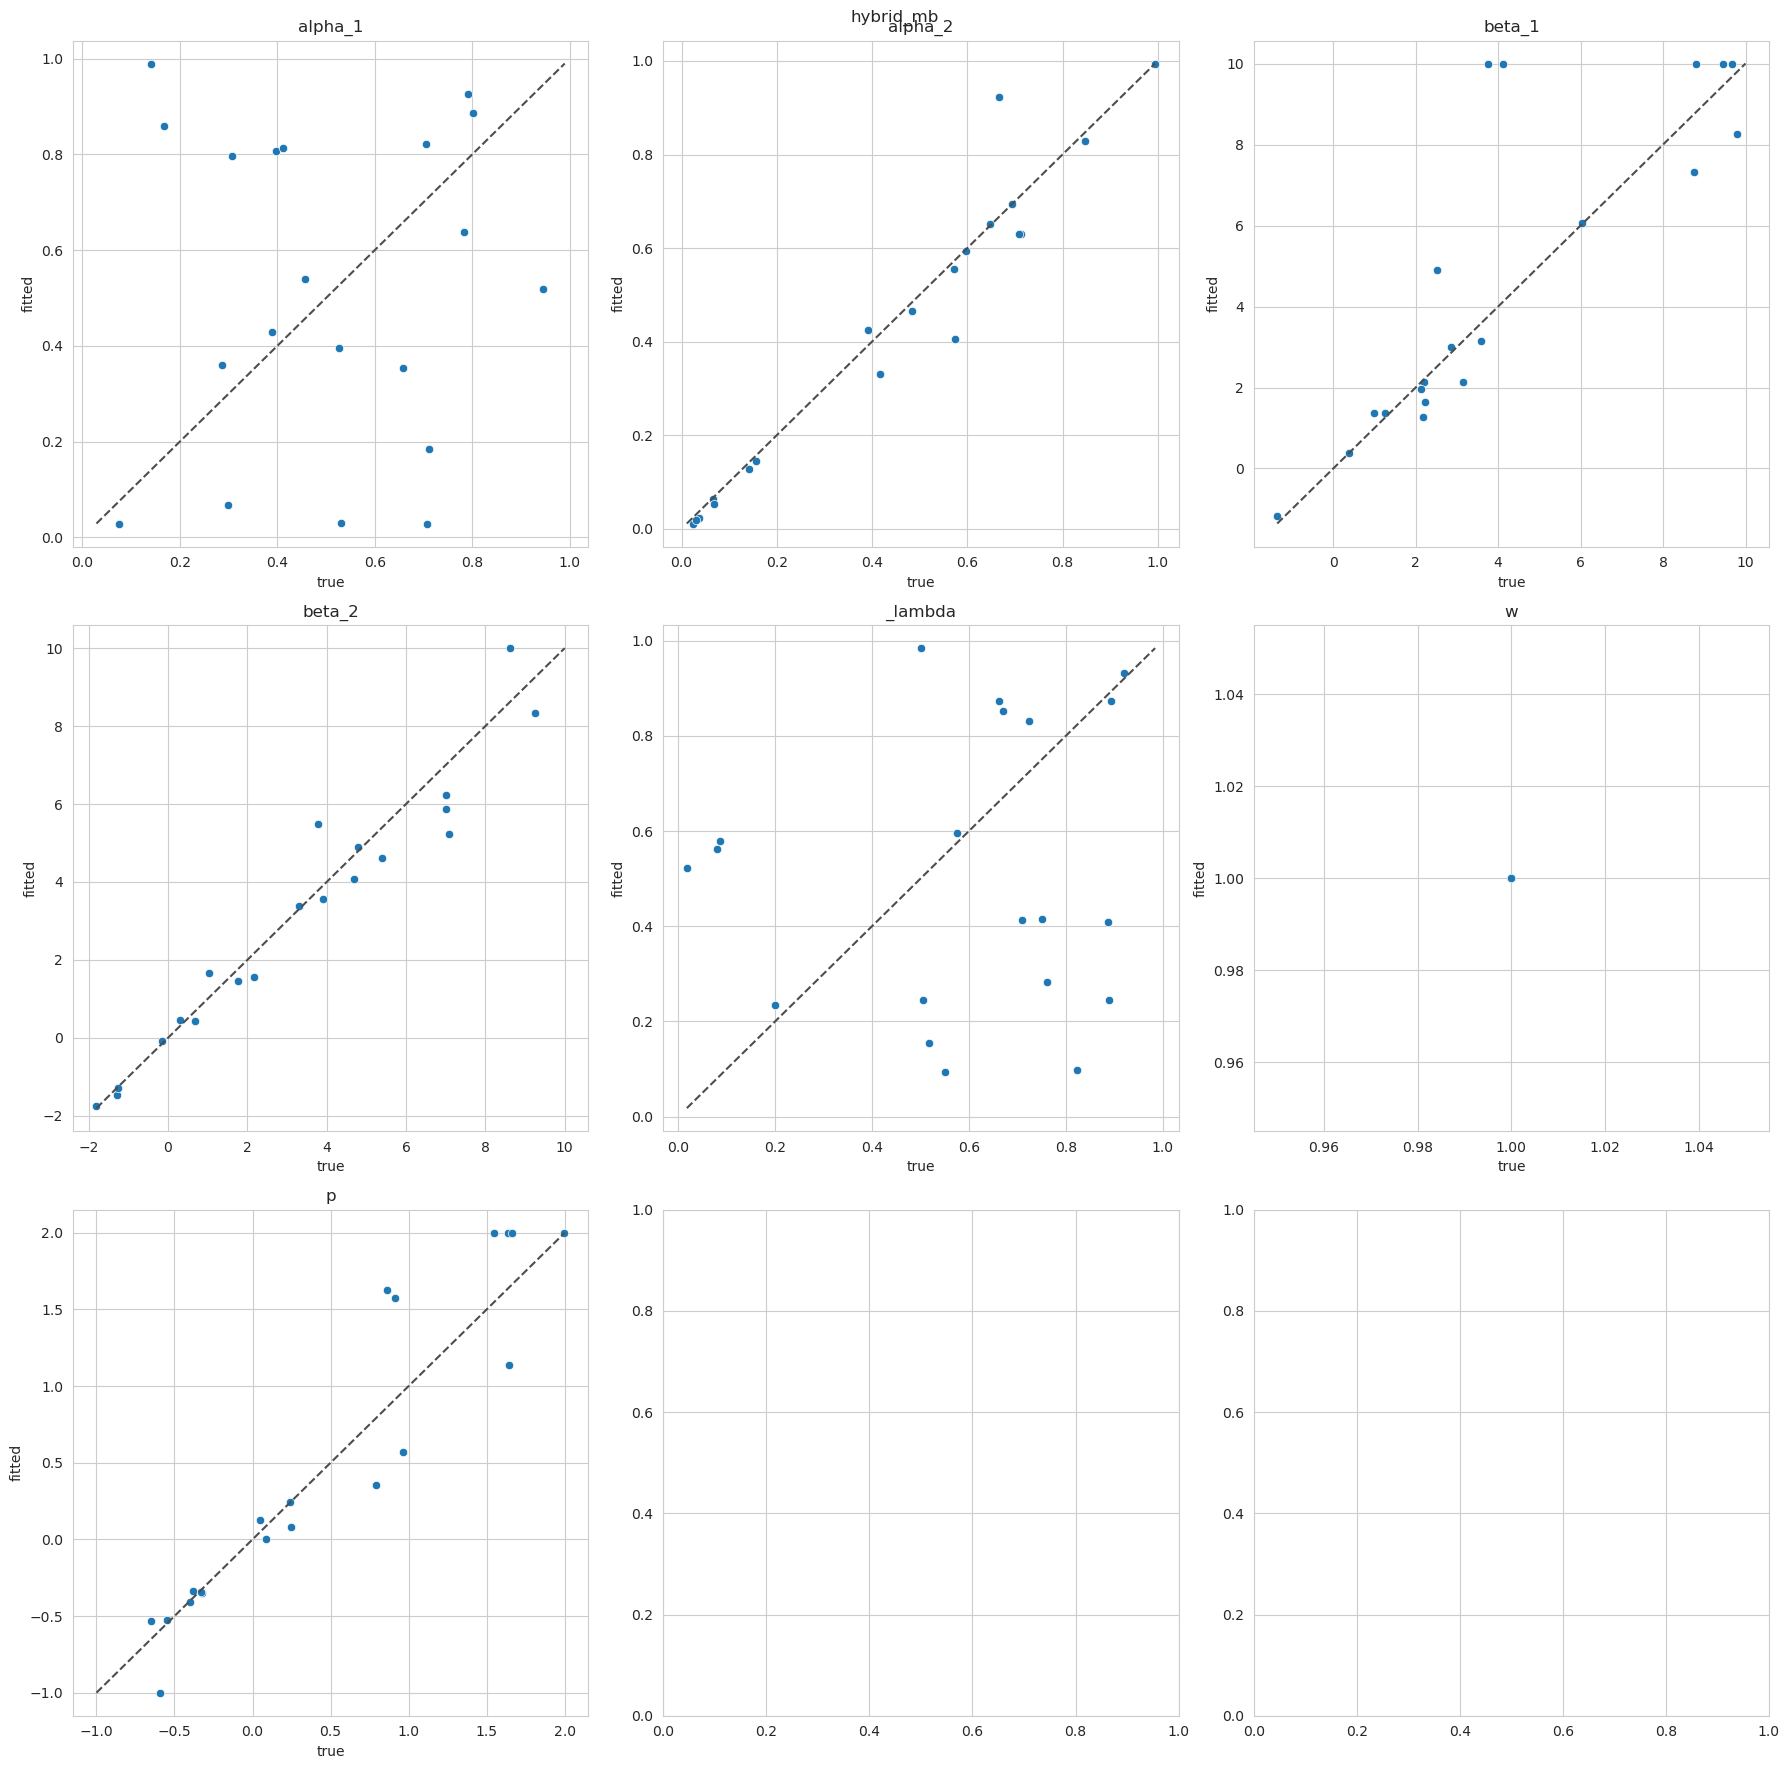

In [60]:
# plot the results
plot_param_recovery(true_params_mf, fitted_params_mf, 'model_free')
plot_param_recovery(true_params_mb, fitted_params_mb, 'model_based')
plot_param_recovery(true_params_hybrid, fitted_params_hybrid, 'hybrid')
plot_param_recovery(true_params_hybrid_mf, fitted_params_hybrid_mf, 'hybrid_mf')
plot_param_recovery(true_params_hybrid_mb, fitted_params_hybrid_mb, 'hybrid_mb')

corr_1: PearsonRResult(statistic=0.15588456920391056, pvalue=0.5116443955481144)


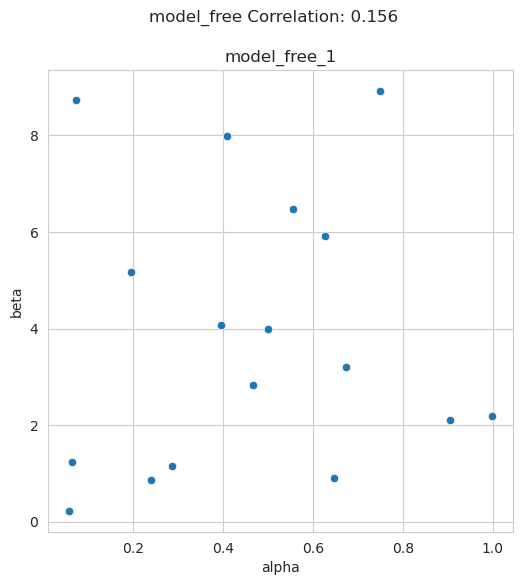

corr_1: PearsonRResult(statistic=0.1592828402273757, pvalue=0.5023667740018745)


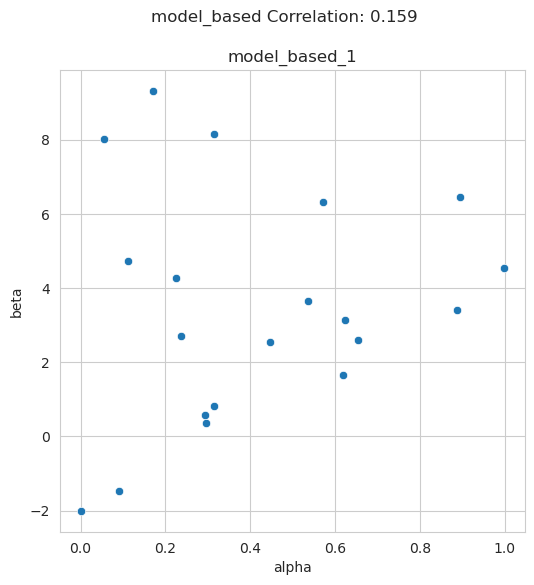

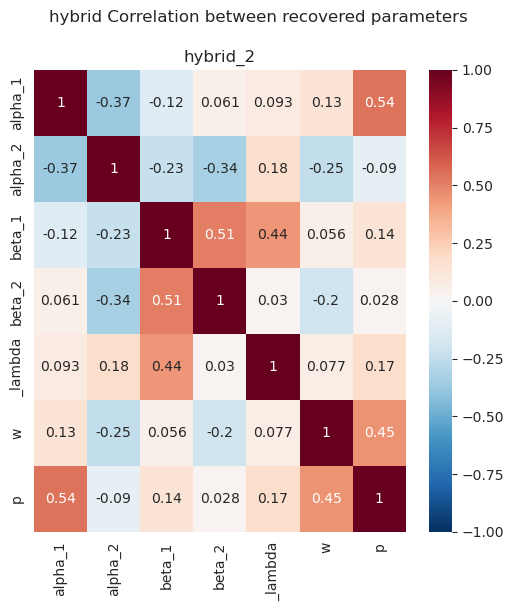

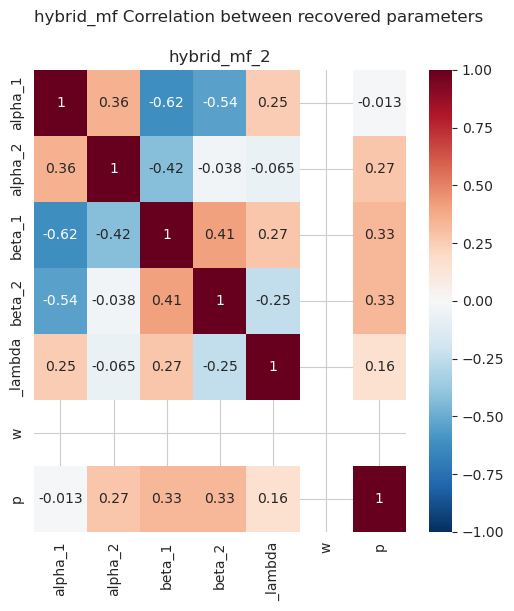

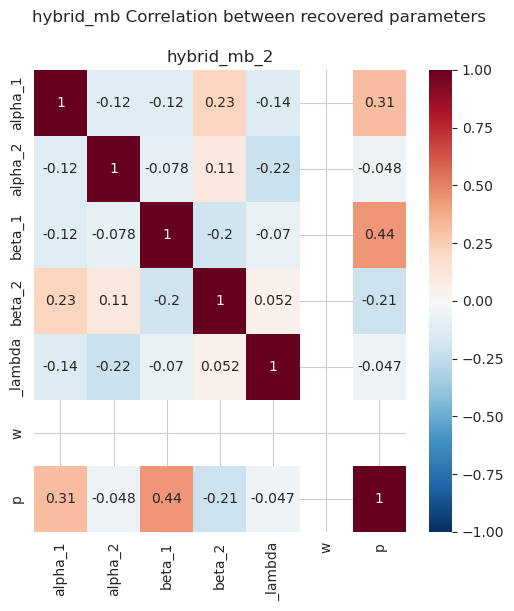

In [72]:
# plot recovered parameters correlation
# low is good
plot_param_correlation(fitted_params_mf, 'model_free')
plot_param_correlation(fitted_params_mb, 'model_based')
plot_param_correlation(fitted_params_hybrid, 'hybrid')
plot_param_correlation(fitted_params_hybrid_mf, 'hybrid_mf')
plot_param_correlation(fitted_params_hybrid_mb, 'hybrid_mb')

## *Optional*: Model Recovery *(2 bonus points)*

In this bonus exercise, you may examine model reovery. The bonus points count towards your total group project points. That is, you may accumlate up to 22 points in the practical part of the group project.

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





In [109]:
from model_recovery import model_recovery, plot_confusion_matrix
from scipy.stats import uniform

plot_cmap = 'viridis'

In [2]:
NUM_RUNS = 10
SEED = 0
# NUM_ITERATIONS = 256  # Number of iterations for random search
NUM_INITILIZATIONS = 1 # Number of random initializations for minimize search
CONSIDER_BOTH_STAGES = True
kwargs_for_fitting_functions = {'num_initializations': NUM_INITILIZATIONS,
                                'consider_both_stages': CONSIDER_BOTH_STAGES}

INTERPOLATION_STEPS = 21 # Number of steps for interpolation of the parameter space
# define the parameter space for the simple model free and based
ALPHA_RANGE = (0.05, 0.85)
BETA_RANGE = (-4, 8)
# Define parameter distributions for hybrid model and its tow special cases (model free and model based)
ALPHA_1_RANGE = (0.05, 0.85)
ALPHA_2_RANGE = (0.05, 0.85)
BETA_1_RANGE = (-4, 8)
BETA_2_RANGE = (-4, 8)
LAMBDA_RANGE = (0.2, 0.8)
W_RANGE = (0.2, 0.8)
P_RANGE = (-1, 1)

# uniform (loc, scale) => uniform (loc, loc + scale)
param_distributions_simple = {'alpha': uniform(ALPHA_RANGE[0], ALPHA_RANGE[1] - ALPHA_RANGE[0]),
                        'beta': uniform(BETA_RANGE[0], BETA_RANGE[1] - BETA_RANGE[0])}

param_distributions_hybrid = {
    'alpha_1': uniform(ALPHA_1_RANGE[0], ALPHA_1_RANGE[1] - ALPHA_1_RANGE[0]),
    'alpha_2': uniform(ALPHA_2_RANGE[0], ALPHA_2_RANGE[1] - ALPHA_2_RANGE[0]),
    'beta_1': uniform(BETA_1_RANGE[0], BETA_1_RANGE[1] - BETA_1_RANGE[0]),
    'beta_2': uniform(BETA_2_RANGE[0], BETA_2_RANGE[1] - BETA_2_RANGE[0]),
    '_lambda': uniform(LAMBDA_RANGE[0], LAMBDA_RANGE[1] - LAMBDA_RANGE[0]),
    'w': uniform(W_RANGE[0], W_RANGE[1] - W_RANGE[0]),
    'p': uniform(P_RANGE[0], P_RANGE[1] - P_RANGE[0]),
}
param_distributions_hybrid_mf = param_distributions_hybrid.copy()
param_distributions_hybrid_mf['w'] = uniform(0, 0)
param_distributions_hybrid_mb = param_distributions_hybrid.copy()
param_distributions_hybrid_mb['w'] = uniform(1, 0)
param_distributions_hybrid_mb['alpha_1'] = uniform(1, 0) # arbitrary value in case of pure model based
param_distributions_hybrid_mb['_lambda'] = uniform(1, 0) # arbitrary value in case of pure model based

In [3]:
models_priors = {
                'model_free': param_distributions_simple,
                 'model_based': param_distributions_simple,
                 'hybrid': param_distributions_hybrid,
                 'hybrid_mf': param_distributions_hybrid_mf,
                 'hybrid_mb': param_distributions_hybrid_mb
                }

In [4]:
conf_matrix_df, inversion_matrix_df = model_recovery(models_priors, num_simulations=NUM_RUNS, seed=SEED, 
                                                     fit_func_kwargs={'num_initializations': NUM_INITILIZATIONS})

models::   0%|          | 0/5 [00:00<?, ?it/s]

simulating model recovery for: model_free:   0%|          | 0/10 [00:00<?, ?it/s]

simulating model recovery for: model_based:   0%|          | 0/10 [00:00<?, ?it/s]

simulating model recovery for: hybrid:   0%|          | 0/10 [00:00<?, ?it/s]

simulating model recovery for: hybrid_mf:   0%|          | 0/10 [00:00<?, ?it/s]

simulating model recovery for: hybrid_mb:   0%|          | 0/10 [00:00<?, ?it/s]

/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/model_recovery.py:77: RuntimeWarning: invalid value encountered in divide
  inversion_matrix = conf_matrix_normalized / conf_matrix_normalized.sum(axis=0)


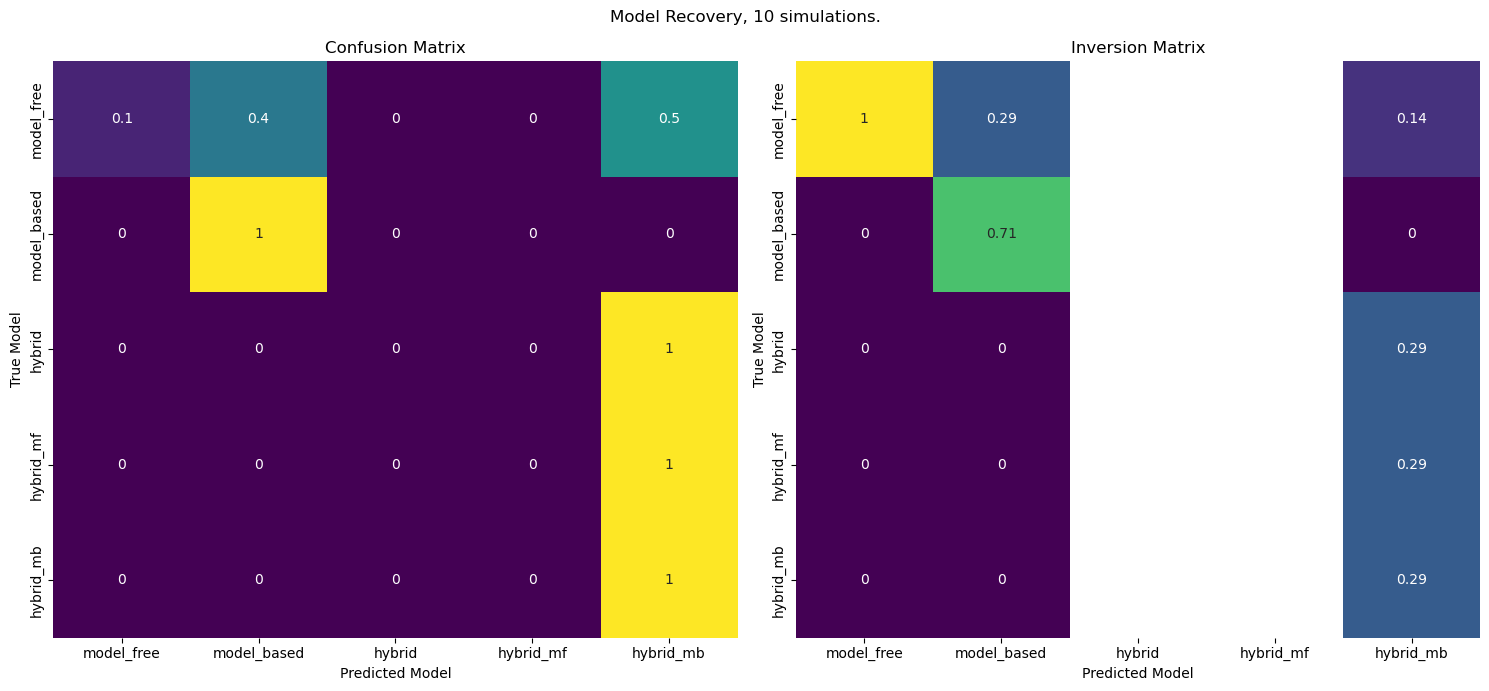

In [5]:
plot_confusion_matrix(conf_matrix_df, inversion_matrix_df,
                      title=f'Model Recovery, {NUM_RUNS} simulations.',
                      cmap=plot_cmap)

In [6]:
models_priors_hybirds = {
                 'hybrid': param_distributions_hybrid,
                 'hybrid_mf': param_distributions_hybrid_mf,
                 'hybrid_mb': param_distributions_hybrid_mb
                }

In [7]:
conf_matrix_df_hybirds, inversion_matrix_df_hybirds = model_recovery(models_priors_hybirds, num_simulations=NUM_RUNS, seed=SEED, 
                                                     fit_func_kwargs={'num_initializations': NUM_INITILIZATIONS})

models::   0%|          | 0/3 [00:00<?, ?it/s]

simulating model recovery for: hybrid:   0%|          | 0/10 [00:00<?, ?it/s]

simulating model recovery for: hybrid_mf:   0%|          | 0/10 [00:00<?, ?it/s]

simulating model recovery for: hybrid_mb:   0%|          | 0/10 [00:00<?, ?it/s]

/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/model_recovery.py:77: RuntimeWarning: invalid value encountered in divide
  inversion_matrix = conf_matrix_normalized / conf_matrix_normalized.sum(axis=0)


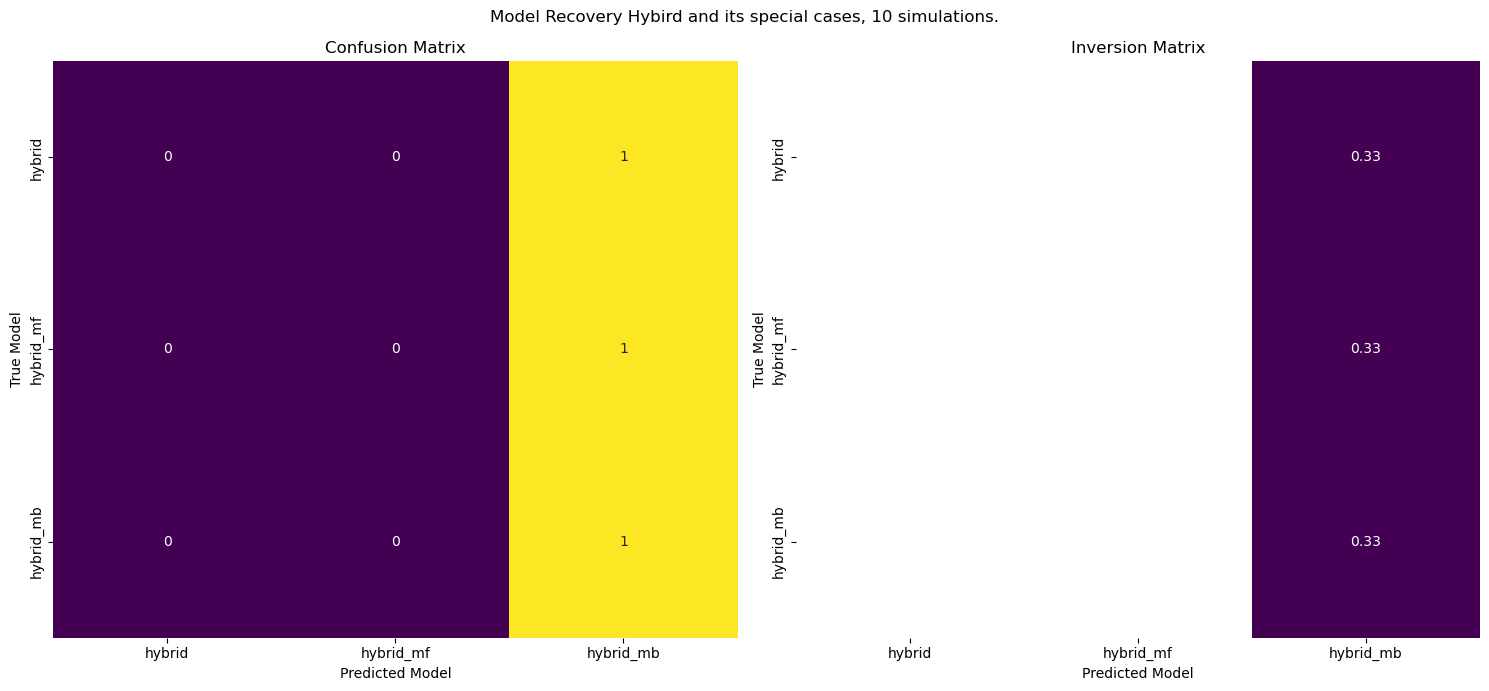

In [8]:
plot_confusion_matrix(conf_matrix_df_hybirds, inversion_matrix_df_hybirds,
                      title=f'Model Recovery Hybird and its special cases, {NUM_RUNS} simulations.',
                      cmap=plot_cmap)

In [9]:
models_priors_simple_vs_hybrid = {
                 'model_free': param_distributions_simple,
                 'model_based': param_distributions_simple,
                 'hybrid': param_distributions_hybrid
                }

In [10]:
conf_matrix_df_simple_vs_hybirds, inversion_matrix_df_simple_vs_hybirds = model_recovery(models_priors_simple_vs_hybrid, num_simulations=NUM_RUNS, seed=SEED, 
                                                     fit_func_kwargs={'num_initializations': NUM_INITILIZATIONS})

models::   0%|          | 0/3 [00:00<?, ?it/s]

simulating model recovery for: model_free:   0%|          | 0/10 [00:00<?, ?it/s]

simulating model recovery for: model_based:   0%|          | 0/10 [00:00<?, ?it/s]

simulating model recovery for: hybrid:   0%|          | 0/10 [00:00<?, ?it/s]

/home/martin/Uni/semester_curr/Modeling_in_CogSci/rl-twoStepTask/model_recovery.py:77: RuntimeWarning: invalid value encountered in divide
  inversion_matrix = conf_matrix_normalized / conf_matrix_normalized.sum(axis=0)


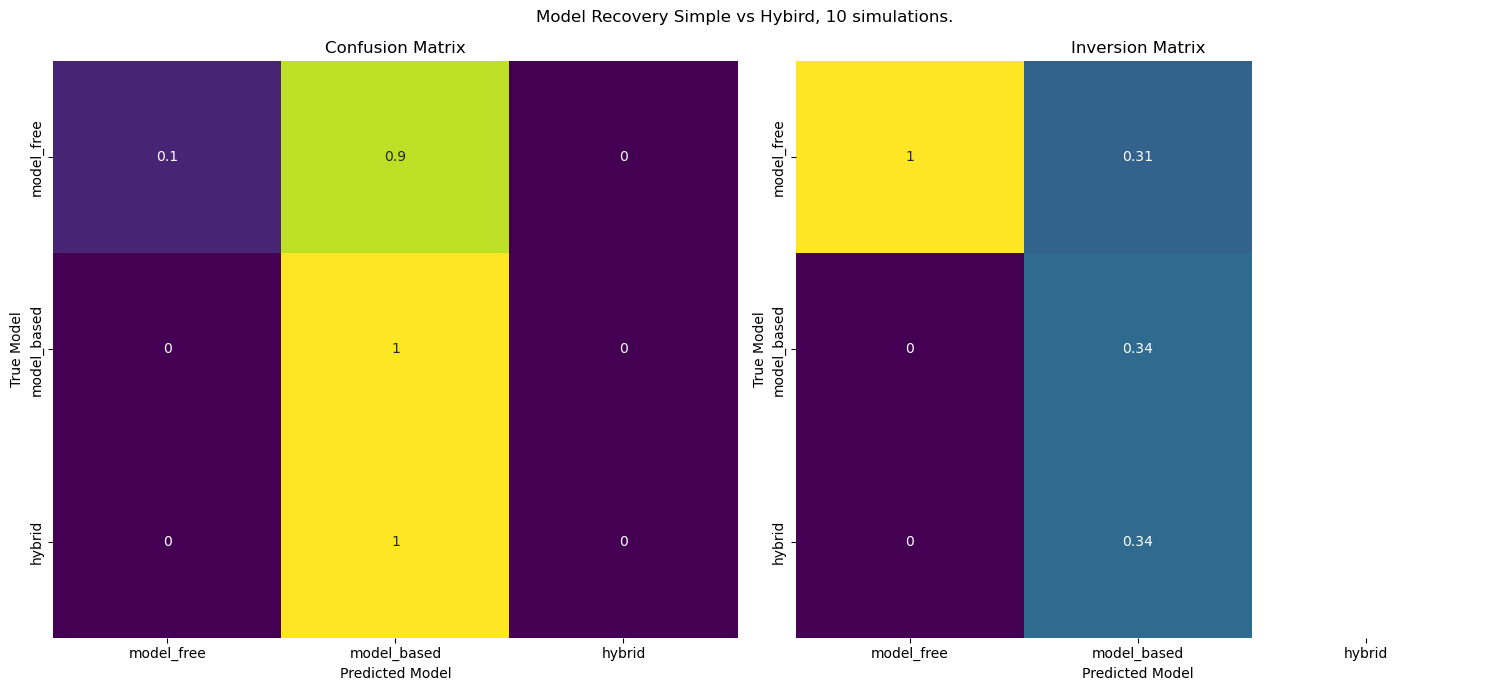

In [11]:
plot_confusion_matrix(conf_matrix_df_simple_vs_hybirds, inversion_matrix_df_simple_vs_hybirds,
                      title=f'Model Recovery Simple vs Hybird, {NUM_RUNS} simulations.',
                      cmap=plot_cmap)

## Model Comparison *(5 points)*

For this exercise you should:

*   Load and (potentially) preprocess the experimental data. (1 point)

*   Fit the two models to the data.  *(1 point)*

*   Evaluate which model performs better, taking into account fit and model complexity. *(2 points)*

*   Plot the behavior of the winning model against the data. *(1 point)**

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





In [4]:
from utils import calculate_bic
from simulate import simulate
from behavioral_analysis import calc_plot_stay_probabilities, calc_plot_stay_probabilities_moving_average,\
    calc_plot_stay_probabilities_blocks, calc_plot_running_stay_probabilities, calc_plot_stay_probability_paired_diffs,\
        calc_plot_running_average_cumulative_reward, print_simple_task_summary
from utils import load_files_from_folder, preprocess_human_data, save_simulated_data
import numpy as np
import pandas as pd

In [104]:
# we are using the loaded data and fitted models from the previous cells
num_datapoints = len(data)

ms_bic_mf = calculate_bic(num_params=2, num_data_points=num_datapoints, ll=ms_fitted_LL_mf)
ms_bic_mb = calculate_bic(num_params=2, num_data_points=num_datapoints, ll=ms_fitted_LL_mb_minimize)
ms_bic_hybrid = calculate_bic(num_params=7, num_data_points=num_datapoints, ll=ms_fitted_LL_hybrid)
ms_bic_hybrid_mf = calculate_bic(num_params=6, num_data_points=num_datapoints, ll=ms_fitted_LL_hybrid_mf)
ms_bic_hybrid_mb = calculate_bic(num_params=4, num_data_points=num_datapoints, ll=ms_fitted_LL_hybrid_mb)

rs_bic_hybrid = calculate_bic(num_params=7, num_data_points=num_datapoints, ll=rs_fitted_LL_hybrid)
rs_bic_hybrid_mf = calculate_bic(num_params=6, num_data_points=num_datapoints, ll=rs_fitted_LL_hybrid_mf)
rs_bic_hybrid_mb = calculate_bic(num_params=4, num_data_points=num_datapoints, ll=rs_fitted_LL_hybrid_mb)

mcmc_bic_hybrid = calculate_bic(num_params=7, num_data_points=num_datapoints, ll=mcmc_fitted_LL_hybrid)
mcmc_bic_hybrid_mf = calculate_bic(num_params=6, num_data_points=num_datapoints, ll=mcmc_fitted_LL_hybrid_mf)
mcmc_bic_hybrid_mb = calculate_bic(num_params=4, num_data_points=num_datapoints, ll=mcmc_fitted_LL_hybrid_mb)


# aic_mf = calculate_aic(num_params=2, ll=best_LL_mf_minimize)
# aic_mb = calculate_aic(num_params=2, ll=best_LL_mb_minimize)
# aic_hybrid = calculate_aic(num_params=7, ll=best_LL_hybrid_minimize)
# aic_hybrid_mf = calculate_aic(num_params=6, ll=best_LL_hybrid_mf_minimize)
# aic_hybrid_mb = calculate_aic(num_params=4, ll=best_LL_hybrid_mb_minimize)

results_bic = pd.DataFrame({'model': ['ms_model_free', 'ms_model_based', 'ms_hybrid', 'ms_hybrid_mf', 'ms_hybrid_mb',
                                      'rs_hybrid', 'rs_hybrid_mf', 'rs_hybrid_mb',
                                      'mcmc_hybrid', 'mcmc_hybrid_mf', 'mcmc_hybrid_mb'],
                            'bic': [ms_bic_mf, ms_bic_mb, ms_bic_hybrid, ms_bic_hybrid_mf, ms_bic_hybrid_mb,
                                    rs_bic_hybrid, rs_bic_hybrid_mf, rs_bic_hybrid_mb,
                                    mcmc_bic_hybrid, mcmc_bic_hybrid_mf, mcmc_bic_hybrid_mb]})

# results_aic = pd.DataFrame({'model': ['model_free', 'model_based', 'hybrid', 'hybrid_mf', 'hybrid_mb'],
#                             'aic': [aic_mf, aic_mb, aic_hybrid, aic_hybrid_mf, aic_hybrid_mb]})

display(results_bic)
# display(results_aic)
model_with_lowest_bic = results_bic.loc[results_bic['bic'].idxmin(), 'model']
# model_with_lowest_aic = results_aic.loc[results_aic['aic'].idxmin(), 'model']
print(f'The model with the lowest BIC is: {model_with_lowest_bic}')
# print(f'The model with the lowest AIC is: {model_with_lowest_aic}')

model         bic
0    ms_model_free  550.156461
1   ms_model_based  549.061219
2        ms_hybrid  572.024037
3     ms_hybrid_mf  565.137141
4     ms_hybrid_mb  550.770294
5        rs_hybrid  558.868436
6     rs_hybrid_mf  557.301581
7     rs_hybrid_mb  555.049154
8      mcmc_hybrid  553.551929
9   mcmc_hybrid_mf  552.342192
10  mcmc_hybrid_mb  551.293835

The model with the lowest BIC is: ms_model_based


In [105]:
model_with_lowest_bic

'ms_model_based'

In [106]:
display(best_simple_models_params)
display(best_hybrid_models_params)

Model Type Fitting Procedure     Best LL     alpha      beta
0  model_based          minimize -273.144315  0.243724  1.125303
1   model_free       grid_search -272.640464  0.365500  1.400000

Model Type Fitting Procedure     Best LL   _lambda  alpha_1   alpha_2  \
0     hybrid              MCMC -271.923934  0.165542  0.80000  0.176791   
1  hybrid_mb          minimize -272.612558  1.000000  1.00000  0.191269   
2  hybrid_mf              MCMC -272.012213  0.193190  0.14282  0.308750   

     beta_1    beta_2         p         w  
0  2.648610  1.103429 -0.041687  0.784094  
1  2.307072  1.073254 -0.043348  1.000000  
2  1.313094  1.057360 -0.000702  0.000000

In [107]:
# simulate the best model
SEED = 0
best_model_param = best_simple_models_params.loc[0, ['alpha', 'beta']].to_dict()
data_best_fit_model, _ = simulate(agent_type='model_based', params=best_simple_models_params.loc[0, ['alpha', 'beta']].to_dict(), seed=SEED, from_data=particepant_data, use_reward_distribution=True)

common_transition  state_transition_to  stepOneChoice  reward  \
0                 True                    2              1    True   
1                False                    1              1   False   
2                 True                    2              1    True   
3                False                    2              0    True   
4                 True                    1              0    True   
..                 ...                  ...            ...     ...   
195               True                    2              1   False   
196               True                    1              0    True   
197              False                    2              0    True   
198               True                    2              1    True   
199               True                    2              1    True   

     stepTwoChoice       rewardProbabilities    rewardDistribution  \
0                1  [0.75, 0.25, 0.75, 0.25]  [0.0, 1.0, 1.0, 1.0]   
1                1  [0.25, 0.25, 0.25, 0.25]  [0.0, 0.0, 0.0, 1.0]   
2                0  [0.75, 0.25, 0.75, 0.75]  [1.0, 0.0, 1.0, 1.0]   
3                0  [0.75, 0.75, 0.75, 0.25]  [1.0, 1.0, 1.0, 1.0]   
4                1  [0.75, 0.75, 0.25, 0.25]  [1.0, 1.0, 0.0, 0.0]   
..             ...                       ...                   ...   
195              1  [0.75, 0.25, 0.75, 0.25]  [1.0, 1.0, 0.0, 0.0]   
196              1  [0.25, 0.75, 0.25, 0.75]  [0.0, 1.0, 0.0, 1.0]   
197              1  [0.25, 0.75, 0.25, 0.75]  [1.0, 1.0, 0.0, 1.0]   
198              0  [0.25, 0.25, 0.75, 0.75]  [0.0, 0.0, 1.0, 1.0]   
199              0  [0.75, 0.25, 0.75, 0.75]  [1.0, 0.0, 1.0, 1.0]   

     trial_index  
0              0  
1              1  
2              2  
3              3  
4              4  
..           ...  
195          195  
196          196  
197          197  
198          198  
199          199  

[200 rows x 8 columns]

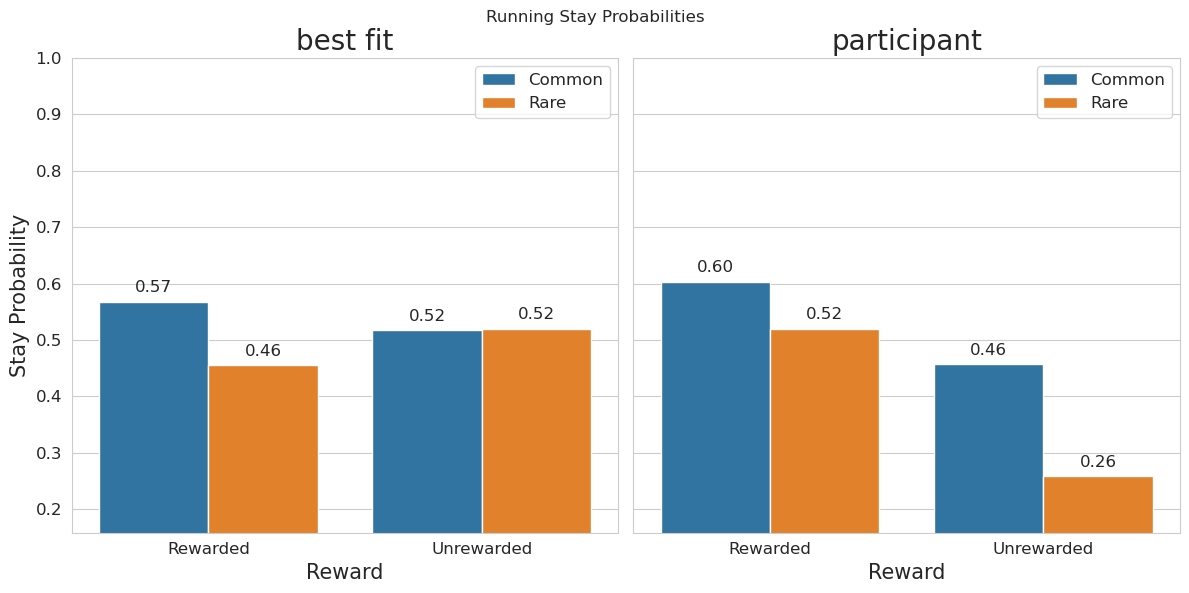

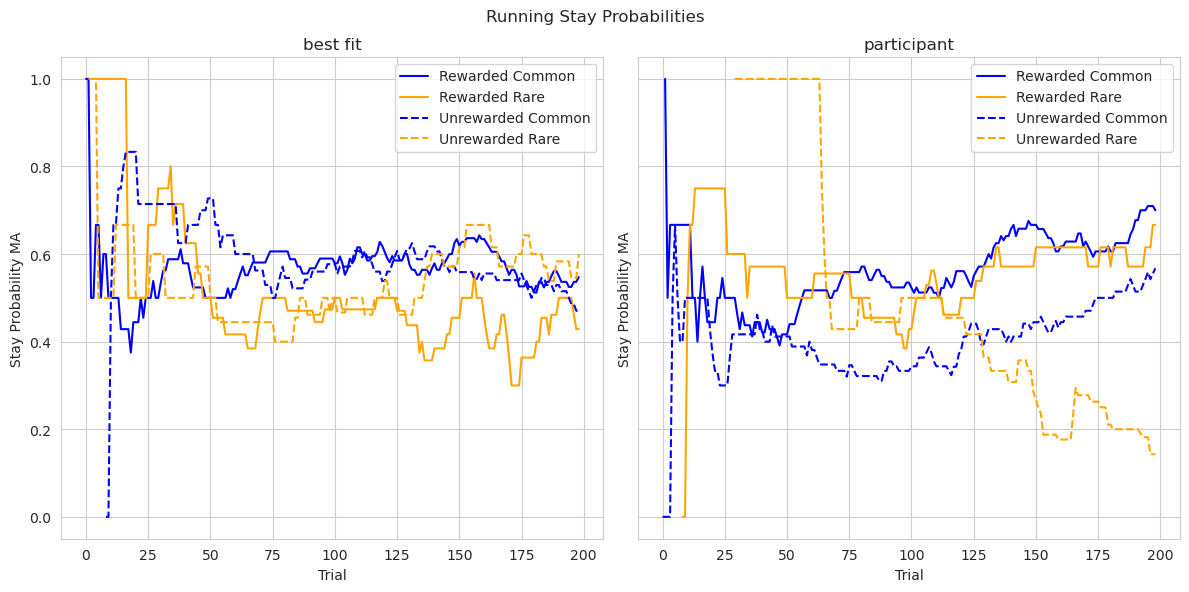

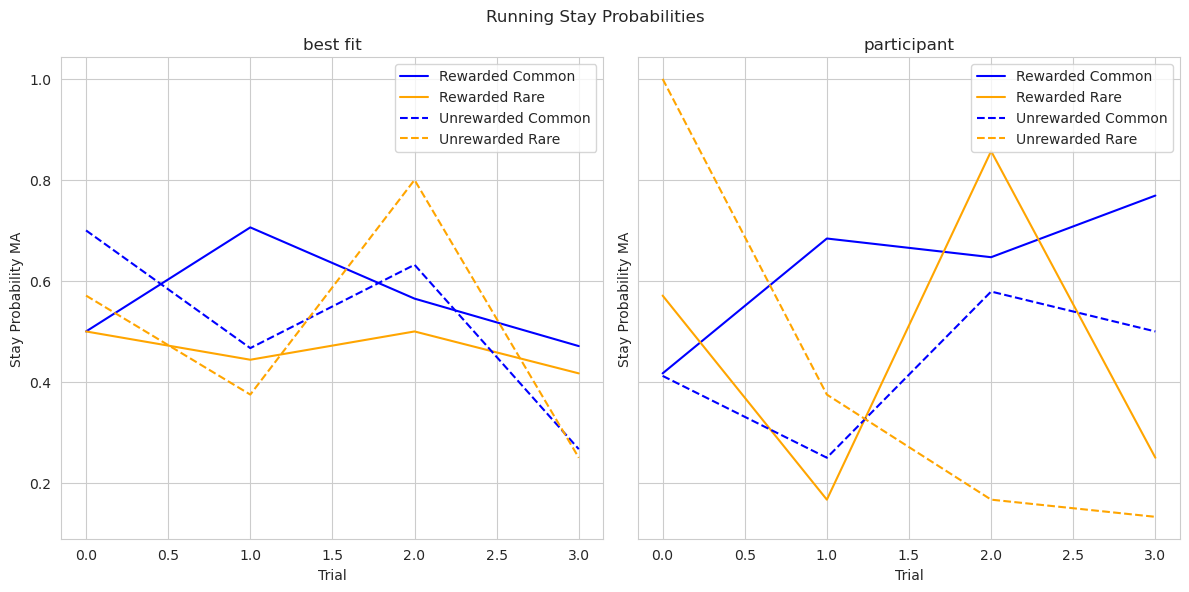

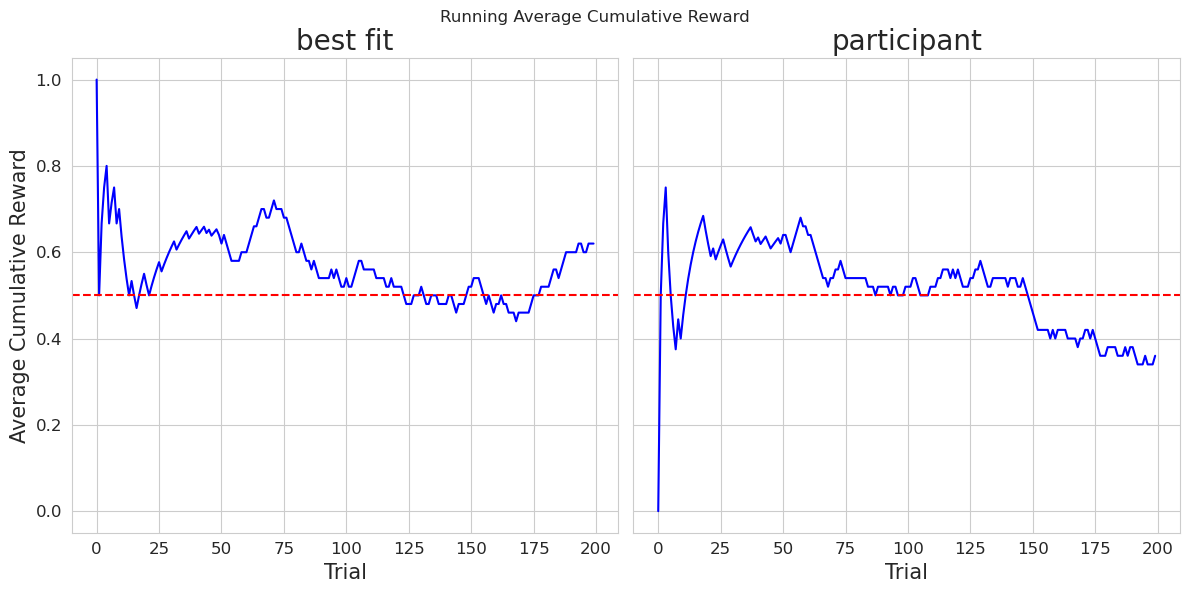

In [117]:
# plot the behavior of the best fitting model
task_dfs = {'model_free': data_best_mf, 'model_based': data_best_mb,
            'hybrid': data_best_hybrid,'hybrid_mf': data_best_hybrid_mf,
            'hybrid_mb': data_best_hybrid_mb}

display(data_best_fit_model)
# plot the stay probabilities of the best fitting model and the fitted data
calc_plot_stay_probabilities(dfs=[data_best_fit_model, data],labels=['best fit', 'participant'], title='Running Stay Probabilities',
                                    max_plots_per_row=2, return_df=False)

# plot the running stay probabilities of the best fitting model and the fitted data
AVERAGE_WINDOW = 100
calc_plot_stay_probabilities_moving_average(dfs=[data_best_fit_model, data], labels=['best fit', 'participant'], window_size=AVERAGE_WINDOW, title='Running Stay Probabilities',
                                    max_plots_per_row=2, return_df=False)

num_blocks = 4
calc_plot_stay_probabilities_blocks(dfs=[data_best_fit_model, data], labels=['best fit', 'participant'], num_blocks=num_blocks, title='Running Stay Probabilities',
                                    max_plots_per_row=2, return_df=False)

# plot the running average cumulative reward of the best fitting model and the fitted data
calc_plot_running_average_cumulative_reward(dfs=[data_best_fit_model, data], labels=['best fit', 'participant'], title='Running Average Cumulative Reward',
                                    max_plots_per_row=2, return_df=False)

### <spin style="color: green"> FIT TO ALL PARTICIPANTS </spin>


In [6]:
group_1 = "data/participants/group_01"
group_2 = "data/participants/group_02"
group_3 = "data/participants/group_03"
data_g_1_raw = load_files_from_folder(group_1, file_end=".csv")
data_g_2_raw = load_files_from_folder(group_2, file_end=".csv")
data_g_3_raw = load_files_from_folder(group_3, file_end=".csv")

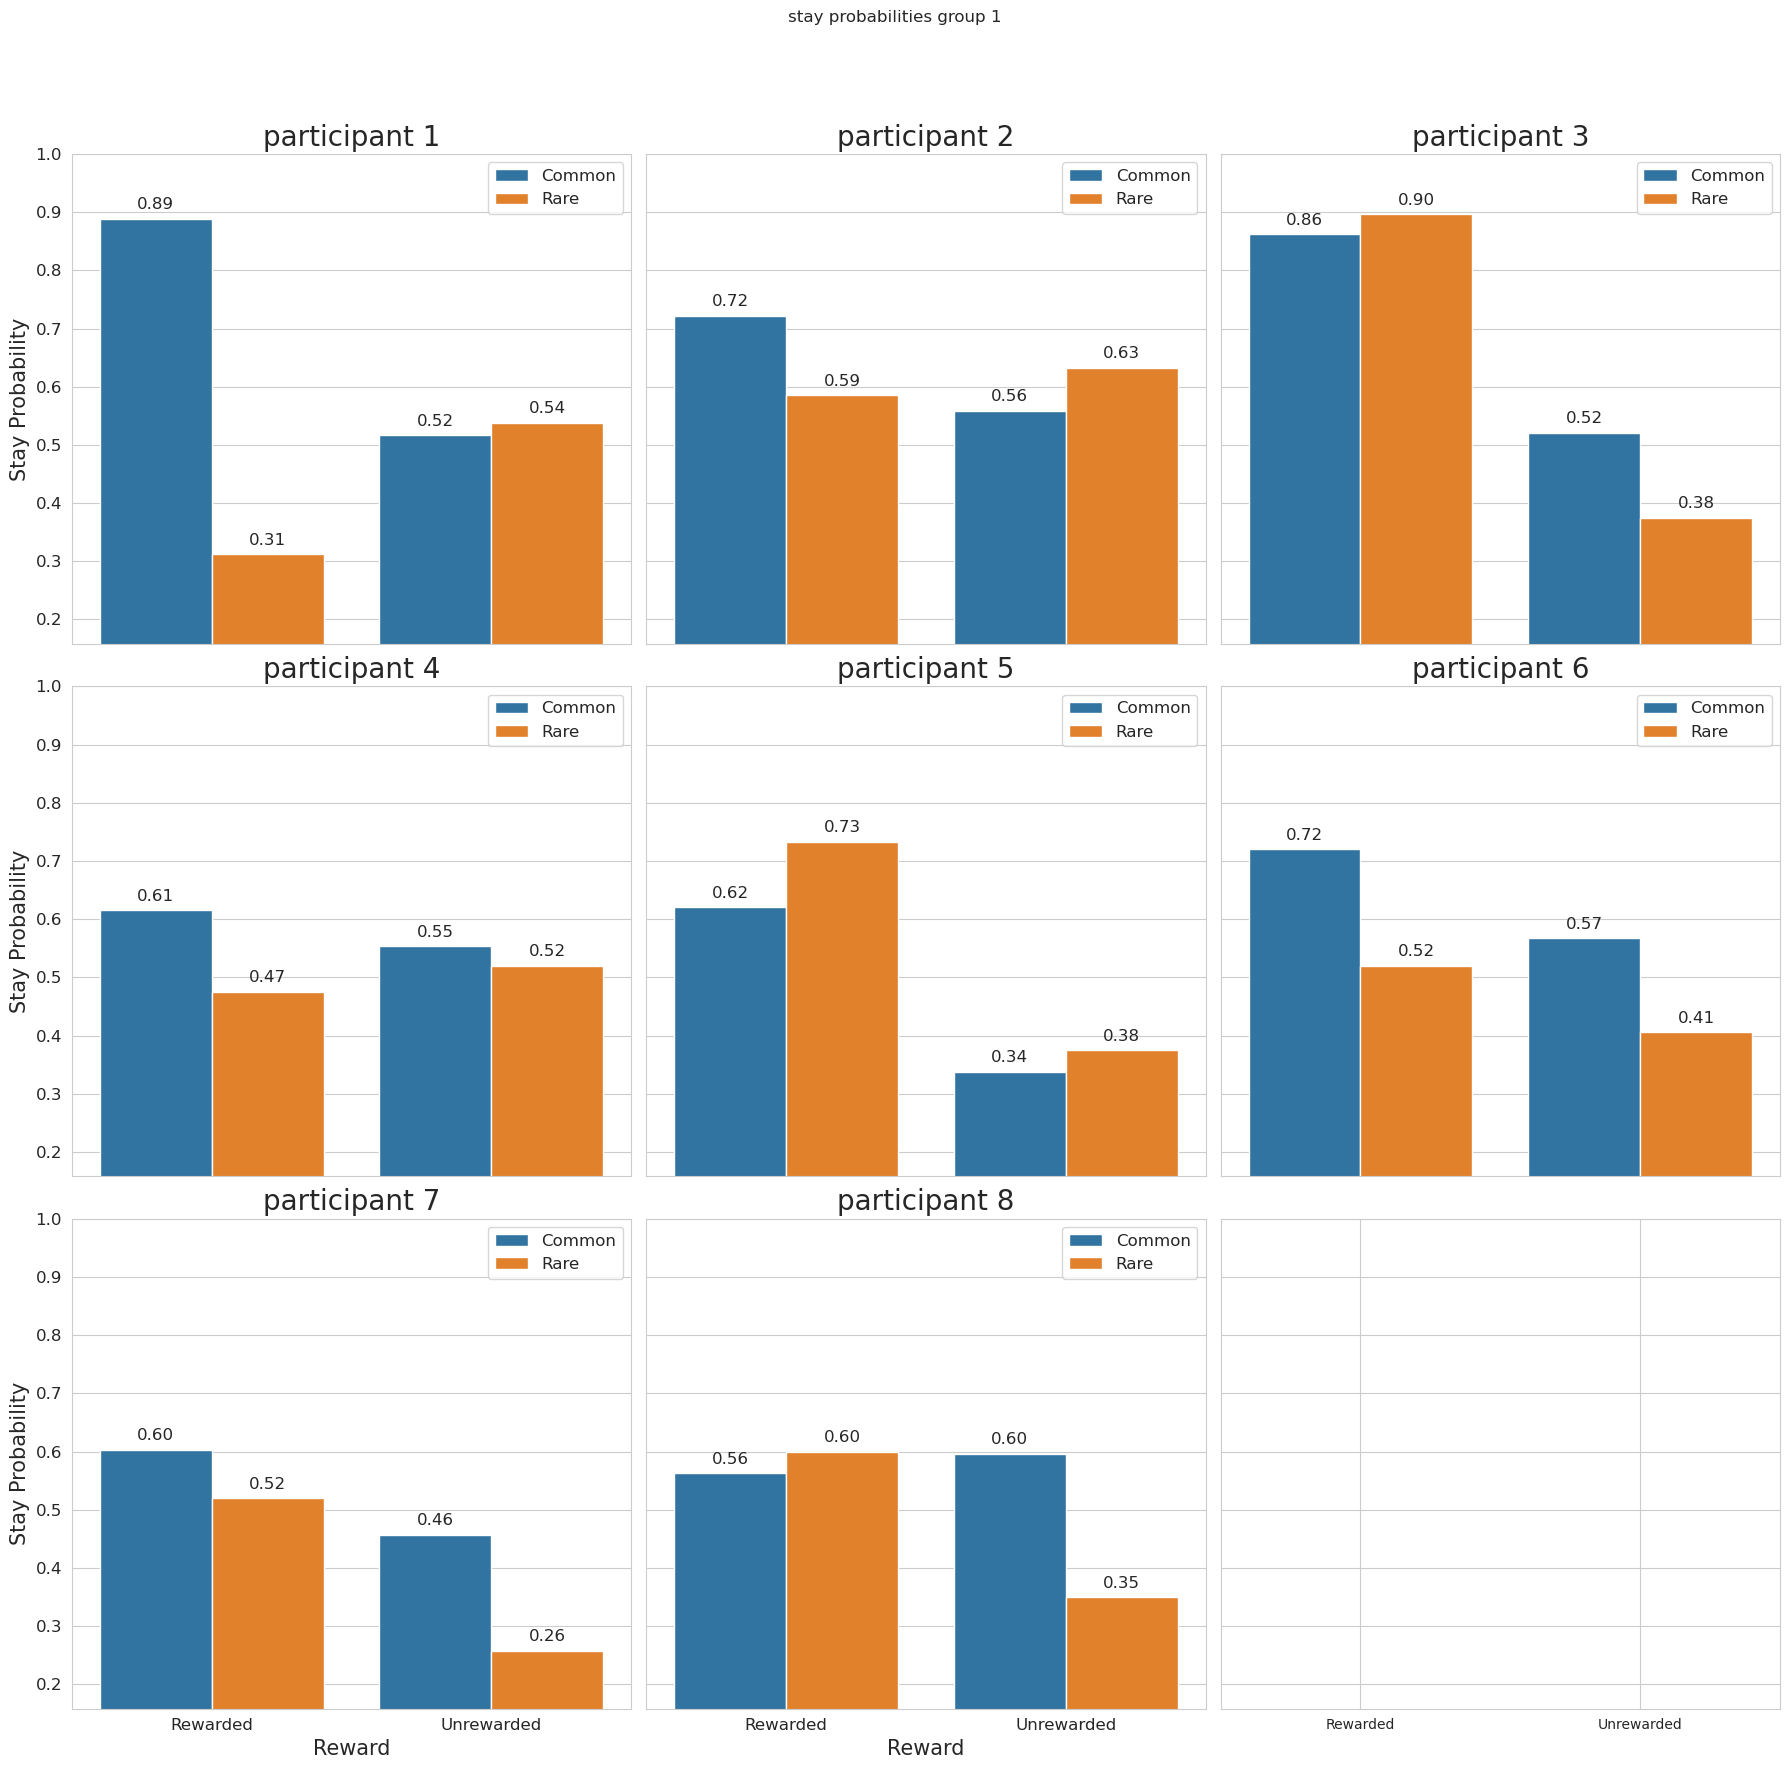

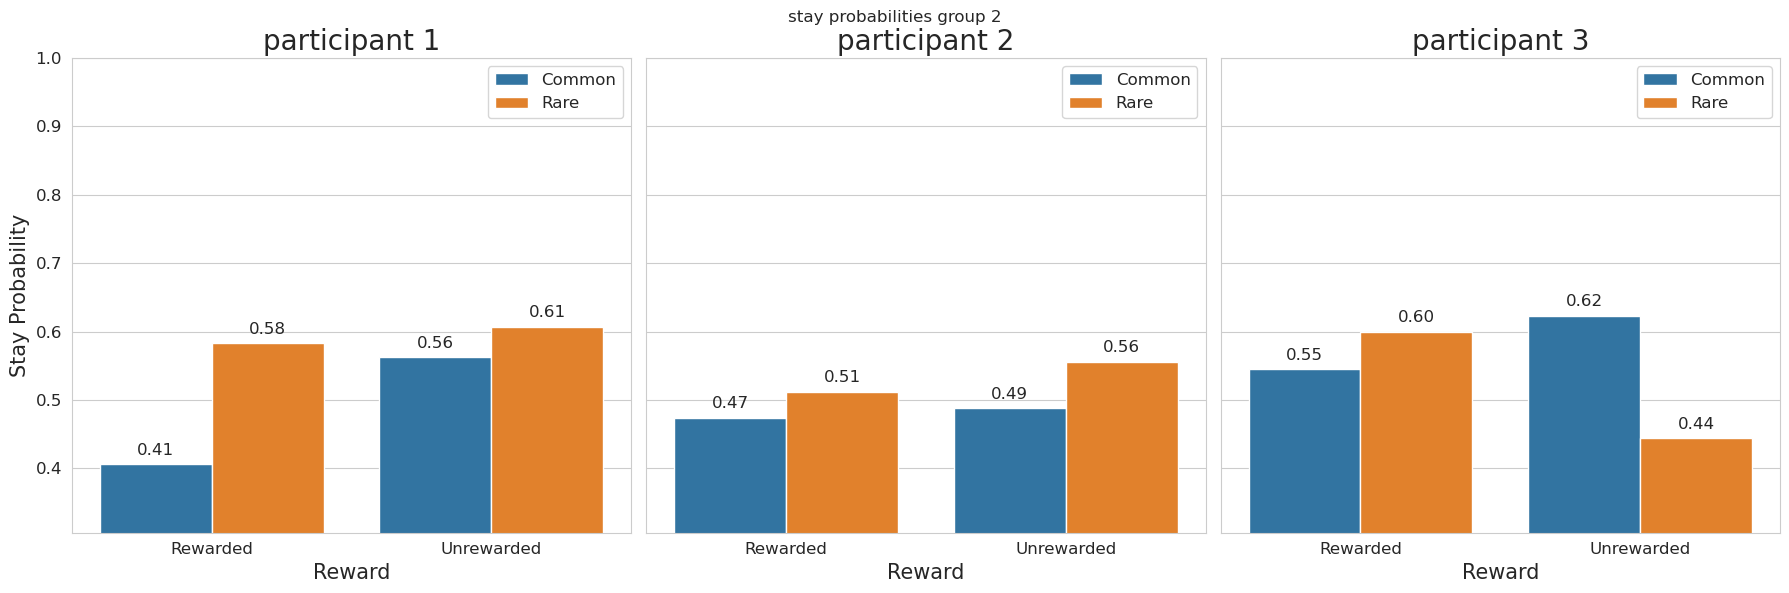

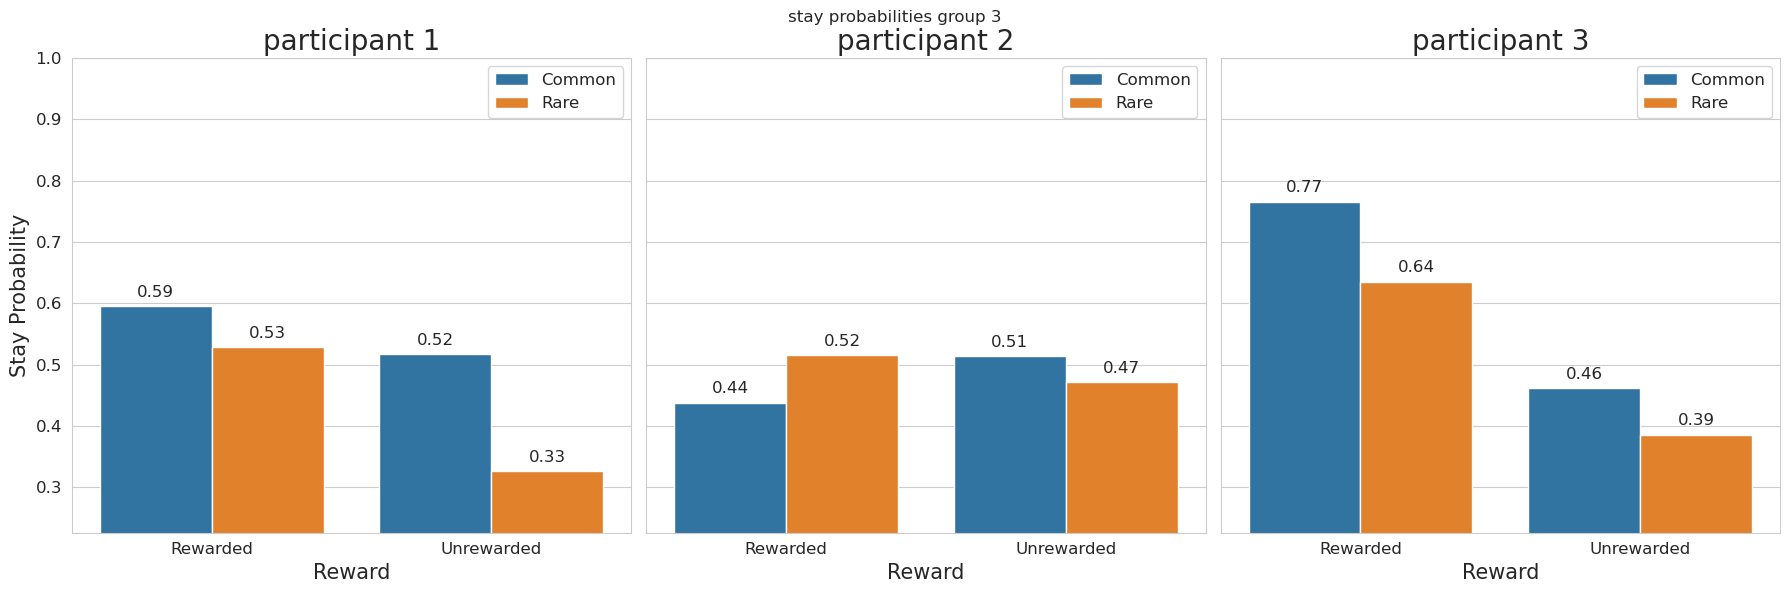

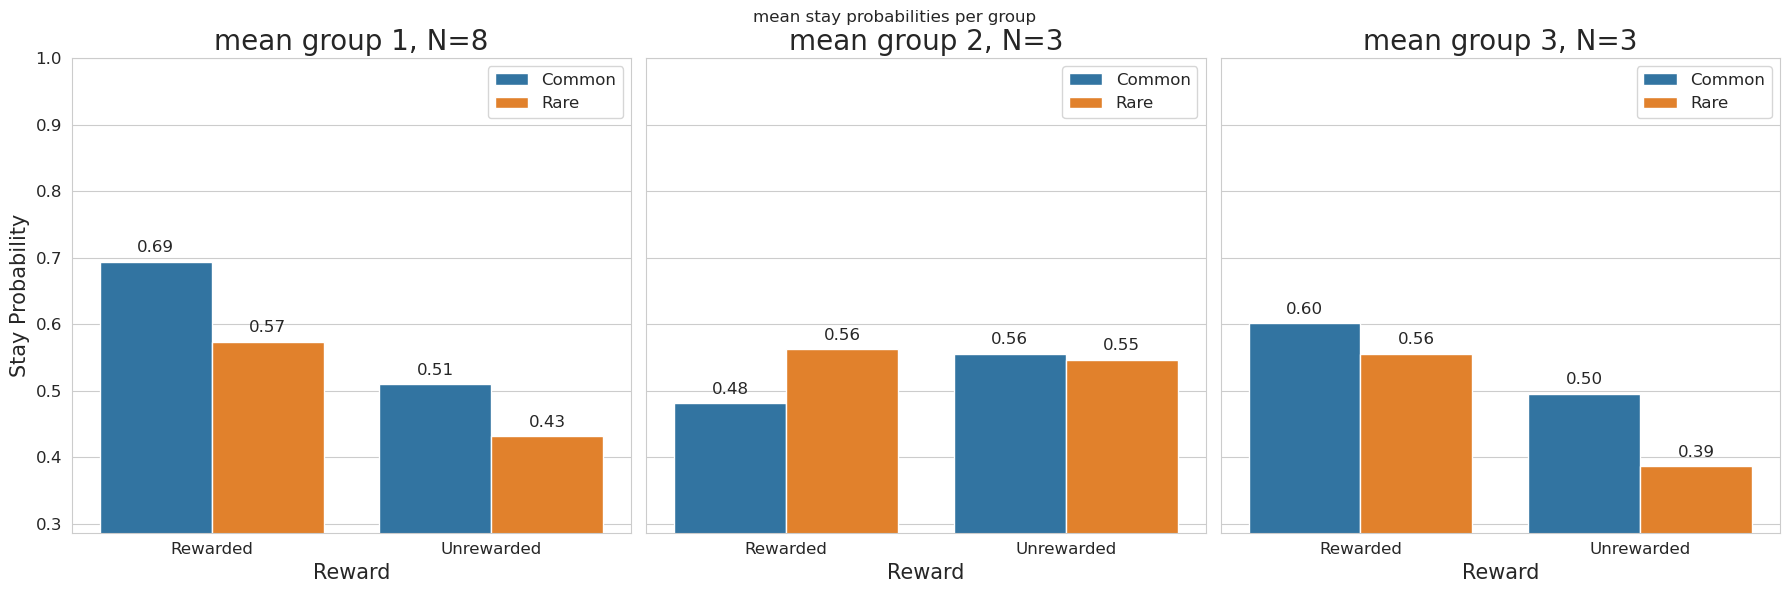

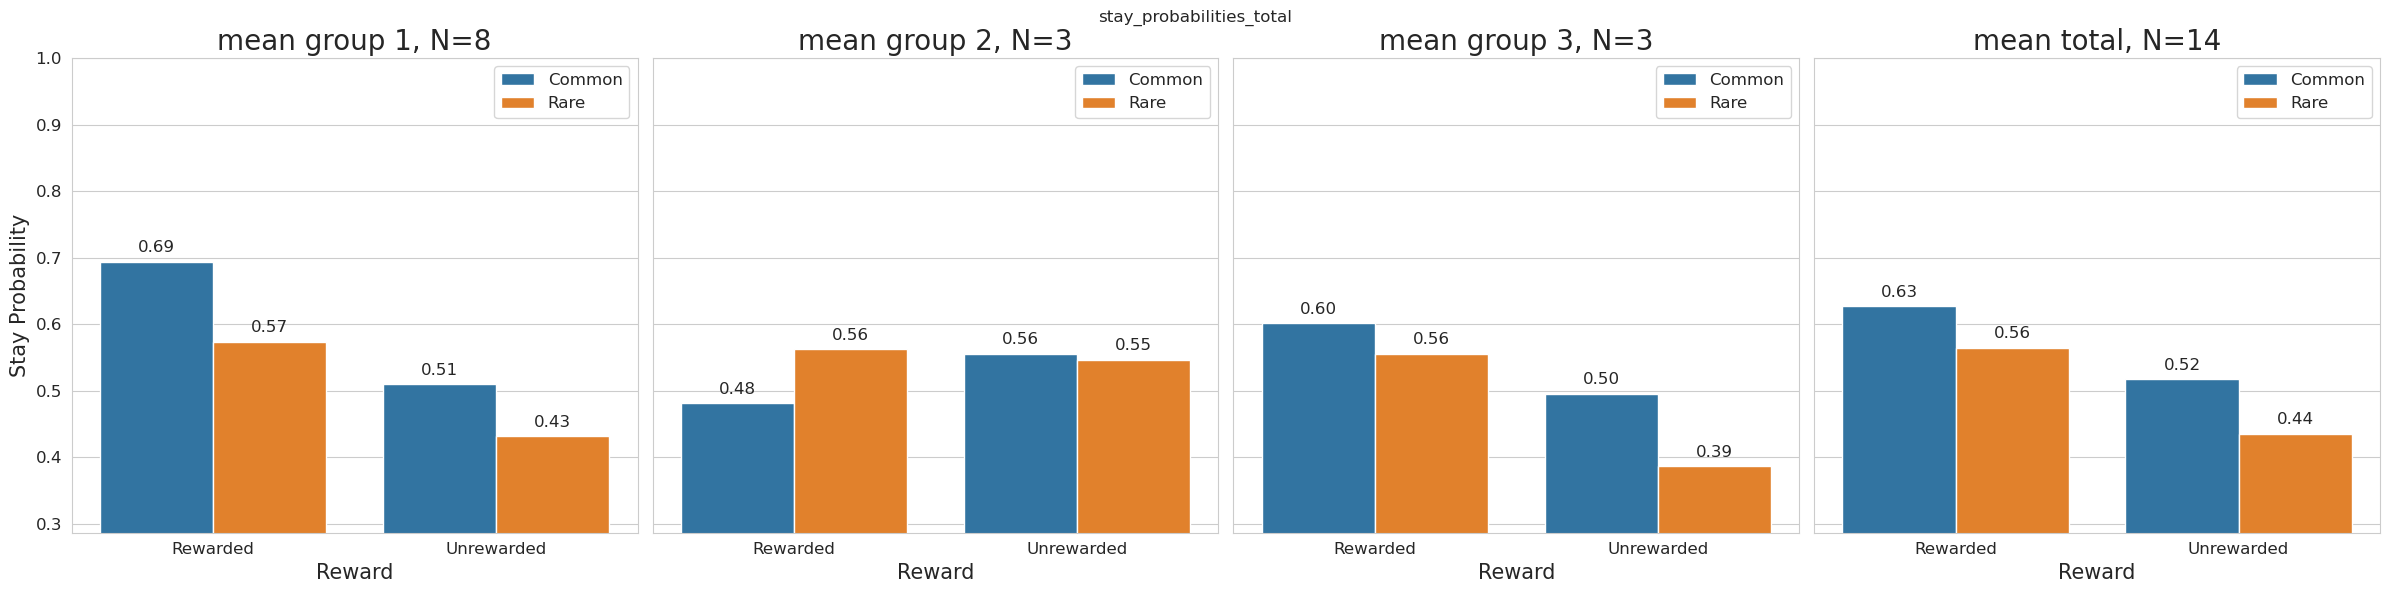

Labels not provided or not matching the number of dataframes, using default labels
generated labels: ['data 1', 'data 2', 'data 3', 'data 4', 'data 5', 'data 6', 'data 7', 'data 8', 'data 9', 'data 10', 'data 11', 'data 12', 'data 13', 'data 14']


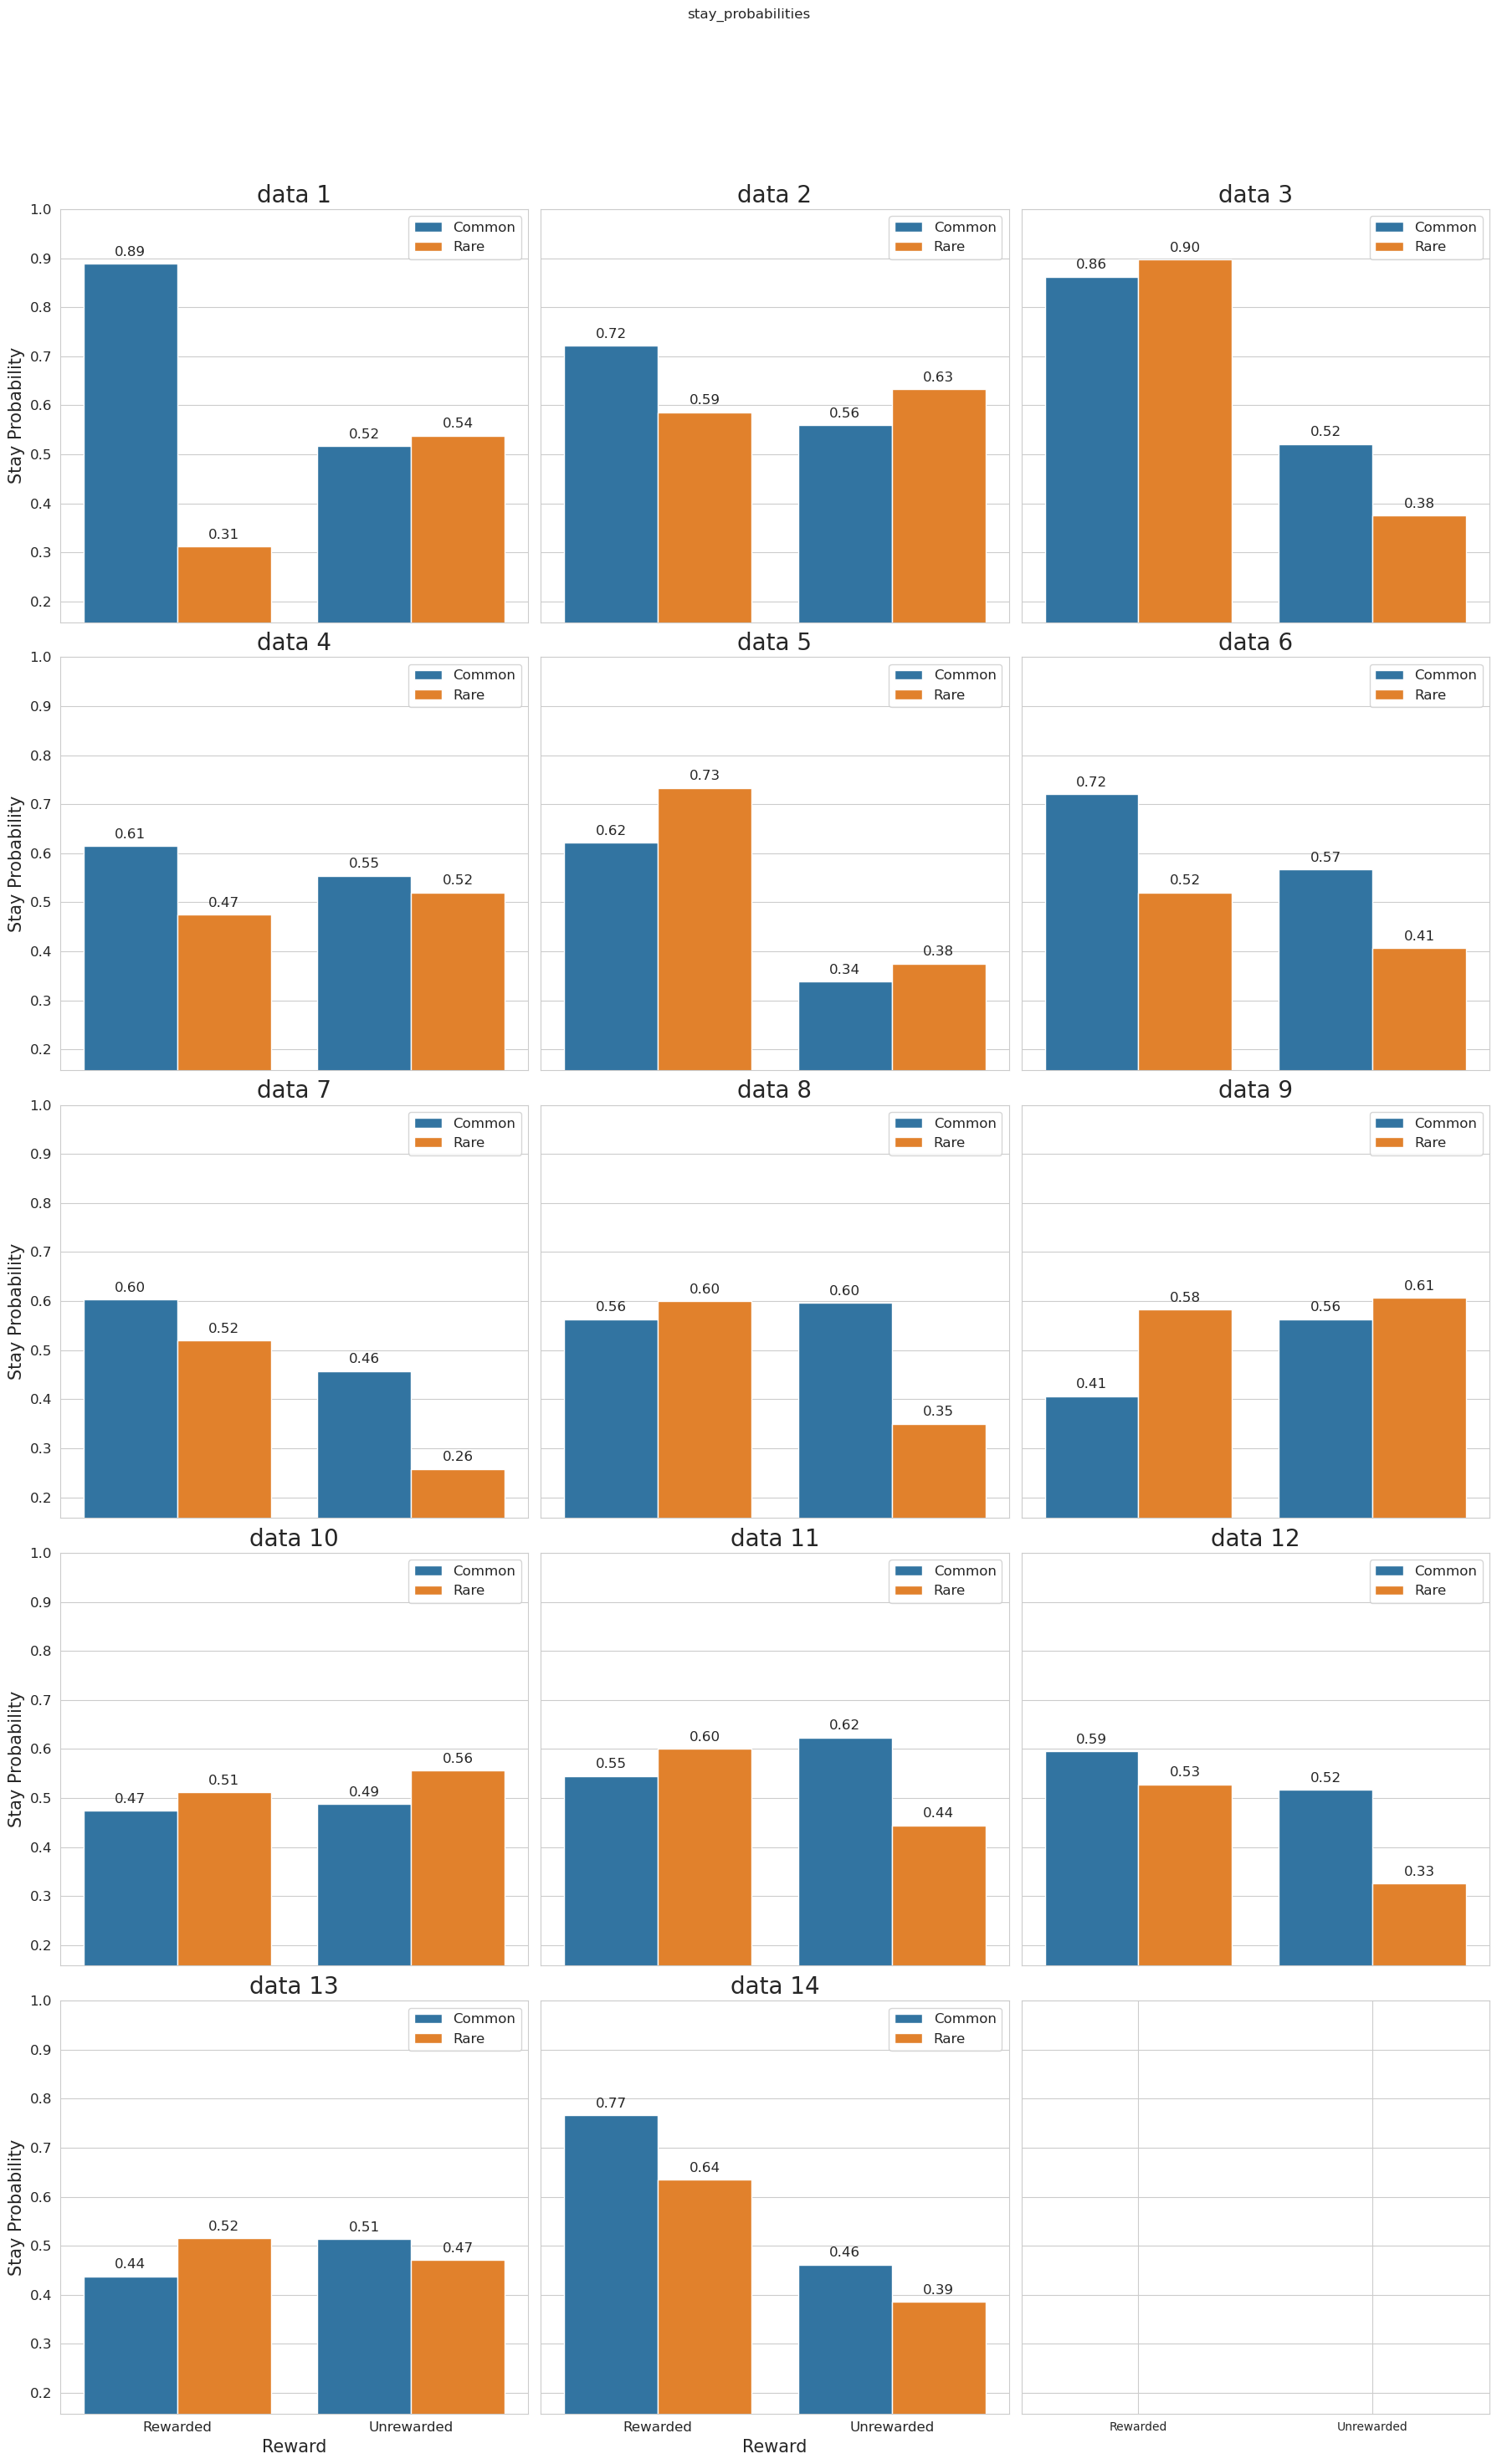

In [7]:
data_g_1 = [preprocess_human_data(df) for df in data_g_1_raw]
data_g_2 = [preprocess_human_data(df) for df in data_g_2_raw]
data_g_3 = [preprocess_human_data(df) for df in data_g_3_raw]
data_g_all = data_g_1 + data_g_2 + data_g_3
stay_probabilities_g_1 = calc_plot_stay_probabilities(dfs=data_g_1, labels=[f'participant {i}' for i in range(1, len(data_g_1) + 1)],
                                                      title='stay probabilities group 1', max_plots_per_row=3)
stay_probabilities_g_2 = calc_plot_stay_probabilities(dfs=data_g_2, labels=[f'participant {i}' for i in range(1, len(data_g_2) + 1)],
                                                        title='stay probabilities group 2', max_plots_per_row=3)
stay_probabilities_g_3 = calc_plot_stay_probabilities(dfs=data_g_3, labels=[f'participant {i}' for i in range(1, len(data_g_3) + 1)],
                                                        title='stay probabilities group 3', max_plots_per_row=3)
# plot the mean stay probabilities over each group
data_g_1_total = pd.concat(data_g_1)
data_g_2_total = pd.concat(data_g_2)
data_g_3_total = pd.concat(data_g_3)
stay_probabilities_g_1_mean = calc_plot_stay_probabilities(dfs=[data_g_1_total,data_g_2_total,data_g_3_total],
                                                           labels=[f'mean group 1, N={len(data_g_1)}', f'mean group 2, N={len(data_g_2)}', f'mean group 3, N={len(data_g_3)}'],
                                                           title='mean stay probabilities per group', max_plots_per_row=3)

data_total = pd.concat([data_g_1_total, data_g_2_total, data_g_3_total])
stay_probabilities_total = calc_plot_stay_probabilities(dfs=[data_g_1_total, data_g_2_total, data_g_3_total, data_total],
                                        labels=[f'mean group 1, N={len(data_g_1)}', f'mean group 2, N={len(data_g_2)}', f'mean group 3, N={len(data_g_3)}', f'mean total, N={len(data_g_all)}'],
                                        title='stay_probabilities_total', max_plots_per_row=4)
all_particepant_data = data_g_all

stay_probabilities = calc_plot_stay_probabilities(dfs=all_particepant_data, title='stay_probabilities', max_plots_per_row=3) 